# 10 Years of Crowdfunding on Kickstarter  - Data Exploration
**by Marie-Luise Klaus**

# Table of contents
1. [Introduction](#introduction)
2. [Preliminary Wrangling](#preliminarywrangling)
3. [Utilities](#utilities)
4. [Descriptive Statistics](#descriptivestatistics)  
4.1 [Summary Descriptive Statistics](#descriptivestatisticssummary)
5. [Univariate Exploration](#univariateexploration)
6. [Bivariate and Multivariate Explorations](#bivariateexploration)  
6.1 [Is it still worthwile financing your project on Kickstarter, now that crowdfunding has become mainstream?](#mainstream)   
6.2 [Summary](#summaryresearch1)  
6.3 [What determines the success of a crowdfunding campaign on Kickstarter?](#success)  
6.4 [Summary](#summaryresearch2) 

# 1 Introduction <a name="introduction"></a>

**Crowdfunding on Kickstarter**  
  
This exploratory data analysis is dedicated to the 10th anniversary of the crowdfunding platform Kickstarter. Crowdfunding is a rather new form of finance to fund any projects and ventures. Typically small amounts of money are being raised by a large number of people. The world wide web streamlined the fundraising processes and allowed easy access to this form of finance to any project creators and private investors. 

Kickstarter is one of the most popular crowdfunding websites in the Western world. It was launched in April 2009 in the USA. While there are many crowdfunding platforms online today, they may fundamentally differ in terms of investor audience, project characteristics and funding services. Kickstarter’s focus is mainly creative. According to their website _**“Kickstarter helps artists, musicians, filmmakers, designers, and other creators find the resources and support they need to make their ideas a reality.”**_

Project _**creators**_ choose a _**deadline**_ and a funding _**goal**_ and present their project on the platform to gather money from a public audience. People who back the project (_**backers**_) by _**pledging**_ money are assured tangible rewards, depending on the amount they pledged. 
Unlike other opportunities of investment, Kickstarter does not allow to distribute shares of a venture to supporters; nor do they claim any ownership over the projects. If the goal was not met by the end of the deadline, the funding is not distributed. While Kickstarter is mainly open for project creators in the USA, Canada, UK, Australia, New Zealand, Mexico and parts of the EU, project support is allowed by people from all around the world. 

https://www.kickstarter.com/

**Kickstarter Data**  
The Kickstarter data set was gathered in July 2019 from an automated web scraping service called Web Robots. Since 2016, they have been publishing monthly updates on all ongoing and completed Kickstarter projects. Due to a lack of documentation provided by the source, I interpreted the data to the best of my belief. Insofar, I cannot guarantee for validity and completeness of the data and take no liability for misinterpretation of the results due to a lack of documentation. To better comprehend the data and rule out erroneous information, I collated the data set with Kickstarter's project archive, which is unrestrictedly accessible online. On the positive side, I did not encounter major inconsistencies during the wrangling and analysis processes. 

During the wrangling processes only a few project observations were removed due to tidiness issues. Consequently, the following analysis of Kickstarter does not represent the full data set, but a major part. 
Please refer to the data crowdfund-wrangling notebook to gain more information on the wrangling process. 

https://webrobots.io/kickstarter-datasets/

Throughout the course of this notebook I will have these two questions in mind. Based on the aforementioned data:

**- Is it still worthwhile financing your project on Kickstarter, now that crowdfunding has become mainstream?**  
**- What determines the success of a crowdfunding campaign on Kickstarter?**  

To get started, let's import our libraries and set plots to be embedded inline.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# uncomment the below settings to avoid collapsing of dataframes
# from IPython.display import Markdown
pd.set_option('display.max_rows', 2500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:,}'.format # display execution times
sns.set_style("whitegrid")

# 2 Preliminary Wrangling <a name="preliminarywrangling"></a>
To begin, I import my data from multiple files and combine them into a single data frame. Subsequently, I assess the dataset to clean it from remaining issues. At the end of this section, I will identify our main variables and explain the terminology around aspects of our main variables.

In [2]:
# read in 4 files and concatinate the data into a single data frame
file_name =  './data/kickstarter_master{}.csv'
master_df = pd.concat([pd.read_csv(file_name.format(i)) for i in range(1,5)])
master_df.reset_index(drop=True, inplace=True)

## Assessing and Cleaning the Data

In [3]:
# show amount of rows and features
master_df.shape

(184909, 32)

In [4]:
# inspect features, null values and data types
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184909 entries, 0 to 184908
Data columns (total 32 columns):
project_id                 184909 non-null int64
project_name               184909 non-null object
url                        184909 non-null object
blurb                      184909 non-null object
category                   184909 non-null object
subcategory                184909 non-null object
image                      184909 non-null object
slug                       184909 non-null object
created_at                 184909 non-null object
launched_at                184909 non-null object
deadline                   184909 non-null object
state_changed_at           184909 non-null object
last_update_at             184909 non-null object
status                     184909 non-null object
creator_id                 184909 non-null int64
creator_name               184908 non-null object
country                    184900 non-null object
city                       184909 non-nul

In [5]:
# inspect 10 examples of the data in the dataset
master_df.sample(10)

project_id                                       project_name  \
151239  1086072     -\\ genesis. The Launch Project                     
93347   2293879     From Dust                                           
97705   2296654     From Ashes Transformed                              
119929  1870247     Janis Esch: Debut Full-Length Album                 
74967   2716940     Wolf Bite Collectible Party Game                    
4949    3703487     The Receptionist                                    
102681  2134446     Record Prophets- From The Ground Up                 
147739  1236622     Thirty Years War Podcast                            
173161  339805      Mike Midwestern "Oh My Soul" Album                  
112755  960480      Alphabet Compendium; An Illustrated A-Z of Things   

                                                                                                       url  \
151239  https://www.kickstarter.com/projects/harmarkev/genesis-the-launch-project                            
93347   https://www.kickstarter.com/projects/paragonfound/from-dust                                          
97705   https://www.kickstarter.com/projects/100883186/from-ashes-transformed                                
119929  https://www.kickstarter.com/projects/1901769314/janis-esch-debut-full-length-album                   
74967   https://www.kickstarter.com/projects/1503133311/wolf-bite-collectable-party-game                     
4949    https://www.kickstarter.com/projects/receptionistfilm/the-receptionist-0                             
102681  https://www.kickstarter.com/projects/479184905/record-prophets-from-the-ground-up                    
147739  https://www.kickstarter.com/projects/1463590930/thirty-years-war-podcast                             
173161  https://www.kickstarter.com/projects/970357215/mike-midwestern-oh-my-soul-album                      
112755  https://www.kickstarter.com/projects/nigelsussman/alphabet-compendium-an-illustrated-a-z-of-things   

                                                                                                                                         blurb  \
151239  Collaborate to Create. Reworking artists' past work comprising techniques and base materials to give it a spotlight it deserved.         
93347   Explore the darker side of human existence in this exciting sci-fi thriller!                                                             
97705   Help save lives by getting the word out about the current drug epidemic. We need funding for a mobile billboard truck to advertise.      
119929  I'm ready to finish and release my first full-length solo album, and I need your help.                                                   
74967   The curious game of strategic deception. A killer, collectible party game not for the faint of heart.                                    
4949    A fly-on-the-wall look at how a company responds to a sex scandal, as told from the receptionist's perspective.                          
102681  Help Slim Dixon and his friends plant the seeds for a new band, Record Prophets, by donating to their debut album "From the Ground Up"   
147739  Important and poorly covered, the Thirty Years War and the Wars of Religion affect us even now. All I need is your money.                
173161  Wrote some new songs and it turned into an album. I even have a title already, "Oh My Soul". Would love your support!                    
112755  A fun art book of complex seek-and-find illustrations for each letter of the alphabet, in a hand-drawn isometric style.                  

            category     subcategory  \
151239  Art           Mixed Media      
93347   Film & Video  Horror           
97705   Art           Public Art       
119929  Music         Country & Folk   
74967   Games         Live Games       
4949    Film & Video  Shorts           
102681  Music         Indie Rock       
147739  Journalism    Audio            
173161  Music         Indi

**Null values & Duplicates**  
Notice one observation with an empty creator name. It shouldn't cause any problems in the analysis. Also missing states won't bother, since there are locations like New Zealand or Antarctica, where states as organisational territories don't exist.

However, there are empty values in _country_ of some observations. The assessment shows, the country Namibia, short "NA" was interpreted as a null value after we read in our csv files. Let's correct that. 

In [6]:
# there is one project without the name of creator
master_df[master_df.creator_name.isna()]

project_id             project_name  \
97701  2298709     Cannabis Colouring Book   

                                                                          url  \
97701  https://www.kickstarter.com/projects/498969171/cannabis-colouring-book   

                                                                       blurb  \
97701  A Cannabis Colouring Book, 20 black and white prints by a Fine Artist   

      category     subcategory  \
97701  Art      Conceptual Art   

                                                                                                                                                                                                                    image  \
97701  https://ksr-ugc.imgix.net/assets/012/342/732/d13264538144cbd88347a1b50579e6e4_original.jpg?ixlib=rb-2.1.0&crop=faces&w=352&h=198&fit=crop&v=1463756060&auto=format&frame=1&q=92&s=77bab713a2f8bdac1f833ae97de52cdb   

                          slug           created_at          launched_at  \
97701  cannabis-colouring-book  2015-12-31 05:21:47  2015-12-31 18:31:24   

                  deadline     state_changed_at       last_update_at  status  \
97701  2016-01-30 18:31:24  2016-01-30 18:31:24  2015-12-31 05:21:47  failed   

       creator_id creator_name country     city state    displ_loc loc_type  \
97701  498969171   NaN          US      Chicago  IL    Chicago, IL  Town      

       backers_count    featured currency  goal_real  goal_current_usd  \
97701  1              no support  USD     2,500.0    2,500.0             

       goal_hist_usd  pledged_real  pledged_current_usd  pledged_hist_usd  \
97701 2,500.0        4.2           4.2                  4.2                 

       current_fx_rate(usd)  hist_exchange_rate(usd)  
97701 1.0                   1.0

In [7]:
# assess null values in state
master_df[master_df.state.isna()][['state','country', 'displ_loc', 'city']].sample(5)

state country                   displ_loc          city
109328  NaN   AQ      Antarctica                  Antarctica  
121942  NaN   XK      Pristina, Kosovo            Pristina    
52433   NaN   MK      Skopje, Macedonia           Skopje      
98224   NaN   AQ      Antarctica                  Antarctica  
51222   NaN   VA      Vatican City, Vatican City  Vatican City

In [8]:
# several projects with missing country, which should be Namibia instead of NaN
master_df[master_df.country.isna()][['country', 'displ_loc']]

country            displ_loc
19347   NaN     Windhoek, Namibia  
40976   NaN     Walvis Bay, Namibia
59198   NaN     Windhoek, Namibia  
74927   NaN     Windhoek, Namibia  
86451   NaN     Tsumkwe, Namibia   
101130  NaN     Rundu, Namibia     
101191  NaN     Okahandja, Namibia 
105663  NaN     Windhoek, Namibia  
183865  NaN     Walvis Bay, Namibia

In [9]:
# replace NaN by "NA"
master_df.country.fillna("NA", inplace=True)

# test
master_df[master_df.country.isna()][['country', 'displ_loc']]

Empty DataFrame
Columns: [country, displ_loc]
Index: []

In [10]:
# duplicates
master_df.duplicated().sum()

0

**Outliers**  

In [11]:
# show descriptive statistics of each numeric variable
master_df.describe()

project_id            creator_id      backers_count  \
count 184,909.0            184,909.0             184,909.0            
mean  2,195,092.092656388  1,074,463,036.5046158 133.61772547577456   
std   1,085,587.0335574246 620,158,412.854741    873.6055966262201    
min   19.0                 3.0                   0.0                  
25%   1,365,660.0          537,822,751.0         3.0                  
50%   2,329,722.0          1,073,670,955.0       23.0                 
75%   3,161,115.0          1,612,081,008.0       81.0                 
max   3,775,211.0          2,147,483,434.0       105,857.0            

                 goal_real     goal_current_usd        goal_hist_usd  \
count 184,909.0            184,909.0            184,909.0              
mean  53,178.173466840446  43,125.31016430783   44,164.54284856914     
std   1,251,484.5834085431 1,129,656.0699383984 1,165,270.6918196438   
min   0.01                 0.01                 0.01                   
25%   1,500.0              1,500.0              1,500.0                
50%   5,000.0              5,000.0              5,000.0                
75%   15,000.0             13,104.902477181711  14,000.0               
max   100,000,000.0        121,822,933.67875078 150,099,318.94817606   

             pledged_real  pledged_current_usd    pledged_hist_usd  \
count 184,909.0           184,909.0            184,909.0             
mean  16,481.028197978463 11,572.573042683343  11,739.976538271778   
std   361,532.80395922204 89,427.97724549935   89,972.85909344895    
min   0.0                 0.0                  0.0                   
25%   75.0                70.0                 72.2348210697422      
50%   1,275.0             1,228.0              1,259.9222798694514   
75%   6,125.0             5,787.0              5,910.0               
max   98,863,825.0        11,385,449.05        11,385,449.05         

       current_fx_rate(usd)  hist_exchange_rate(usd)  
count 184,909.0             184,909.0                 
mean  1.5133052788138077    1.486521775516778         
std   4.758657265159066     4.868749652889349         
min   0.8208635023          0.5826048629999999        
25%   1.0                   1.0                       
50%   1.0                   1.0                       
75%   1.0                   1.0                       
max   106.46285867520001    113.9401218152

The descriptive statistics above reveal an extreme range of values for the number backers, project goals and the pledged funding. For example, the collected funding of a campaign may vary between zero to more than USD 11mi (pledged_hist_usd). In the following analysis, I will need to pay extra attention to outliers and extreme values.

**Time Variables and Project Duration**  

There are several time-related features to be converted to pandas date time format for analysis. 

The funding period of is one of the features a creator has to decide on before launching a project. I suppose it may affect the success of the campaign. I will add the duration as a new feature to this data set.

In [12]:
# convert time data to date time format
master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at']] = master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at']].apply(pd.to_datetime)

In [13]:
# engineer variable to asses funding duration
master_df['duration'] = master_df['deadline'] - master_df['launched_at']
master_df[['launched_at', 'deadline', 'duration']].sample(5)

launched_at            deadline         duration
16889  2019-01-10 06:11:29 2019-02-04 19:33:11 25 days 13:21:42
172694 2012-10-31 21:45:59 2012-12-01 04:11:00 30 days 06:25:01
50577  2017-09-15 08:55:36 2017-11-14 09:55:36 60 days 01:00:00
25901  2018-09-10 16:55:57 2018-10-15 16:55:57 35 days 00:00:00
10954  2019-03-21 17:59:05 2019-04-18 02:00:00 27 days 08:00:55

In [14]:
# convert duration time delta to float of days
master_df['duration_days'] = (master_df['duration'].astype('timedelta64[h]') / 24)

In [15]:
# the first project ever launched
first_project_launched = master_df.sort_values(by='launched_at', ascending=True).iloc[0, :]
first_project_launched[['project_name', 'blurb', 'url', 'launched_at', 'deadline', 'duration','goal_hist_usd', 'pledged_hist_usd','city']]

project_name        New York Makes a Book!!                                                                                                                             
blurb               Let's make the world's first crowd-funded book! \r\n\r\nNew York Makes a Book will be entirely composed of submissions from 100 participants. 100...
url                 https://www.kickstarter.com/projects/nymab/new-york-makes-a-book                                                                                    
launched_at         2009-04-28 11:55:41                                                                                                                                 
deadline            2009-05-16 09:59:00                                                                                                                                 
duration            17 days 22:03:19                                                                                                                       

In [16]:
# the first project ever funded
first_project_funded = master_df.sort_values(by='deadline', ascending=True).iloc[0, :]
first_project_funded[['project_name', 'blurb', 'url', 'launched_at', 'deadline', 'duration','goal_hist_usd', 'pledged_hist_usd','city', 'status']]

project_name        New York Makes a Book!!                                                                                                                             
blurb               Let's make the world's first crowd-funded book! \r\n\r\nNew York Makes a Book will be entirely composed of submissions from 100 participants. 100...
url                 https://www.kickstarter.com/projects/nymab/new-york-makes-a-book                                                                                    
launched_at         2009-04-28 11:55:41                                                                                                                                 
deadline            2009-05-16 09:59:00                                                                                                                                 
duration            17 days 22:03:19                                                                                                                       

In [17]:
# the latest launched project
latest_project = master_df.sort_values(by='launched_at', ascending=False).iloc[0, :]
latest_project[['project_name', 'blurb', 'url', 'launched_at', 'deadline', 'duration','goal_hist_usd', 'pledged_hist_usd','city']]

project_name        Shirt and hat                                                                                                                         
blurb               I'm just going to say it, I'm not special. I'm pretty mediocre so I want others who feel the same to be able to show it by wearing it.
url                 https://www.kickstarter.com/projects/dima01/shirt-and-hat                                                                             
launched_at         2019-07-18 05:04:48                                                                                                                   
deadline            2019-08-17 05:04:48                                                                                                                   
duration            30 days 00:00:00                                                                                                                      
goal_hist_usd      5,000.0                                            

Kickstarter's 10 year anniversary was 28th April 2019. The first project on Kickstarter was launched 28/04/2009, which was also the first project ever successfully funded. The latest project launched in this data set was by 18/07/2019. 

As we would like to analyze 10 years of Kickstarter data, we are going to only include projects, that were funded between May 2009 and April 2019. 

In [18]:
# filter by campaigns that ended before before May 2019
master_df = master_df[master_df.deadline < '05-01-2019']

In [19]:
# the latest funded project
latest_project_funded = master_df.sort_values(by='deadline', ascending=False).iloc[0, :]
latest_project_funded[['project_name', 'blurb', 'url', 'launched_at', 'deadline', 'duration','goal_hist_usd', 'pledged_hist_usd','city']]

project_name        Divine Passerine II - The BIRDENING                                           
blurb               A beautiful new collection of hard enamel bird pins                           
url                 https://www.kickstarter.com/projects/yseulta/divine-passerine-ii-the-birdening
launched_at         2019-04-10 23:01:14                                                           
deadline            2019-04-30 23:01:14                                                           
duration            20 days 00:00:00                                                              
goal_hist_usd      392.6300000198906                                                              
pledged_hist_usd   1,371.9614000695035                                                            
city                Dublin                                                                        
Name: 9222, dtype: object

In [20]:
# the latest project that was launched
latest_project_launched = master_df.sort_values(by='launched_at', ascending=False).iloc[0, :]
latest_project_launched[['project_name', 'blurb', 'url', 'launched_at', 'deadline', 'duration','goal_hist_usd', 'pledged_hist_usd','city']]

project_name        Who Shot J.R.?                                             
blurb               A component-free storytelling & memory game                
url                 https://www.kickstarter.com/projects/1610277086/who-shot-jr
launched_at         2019-04-23 14:56:32                                        
deadline            2019-04-30 14:56:32                                        
duration            7 days 00:00:00                                            
goal_hist_usd      10.0                                                        
pledged_hist_usd   321.0                                                       
city                Trenton                                                    
Name: 8319, dtype: object

**Categories**  

In [21]:
# show example of subcategory with multiple parent categories
master_df[master_df.subcategory == 'Web'][['category', 'subcategory']].sample(5)

category subcategory
65957   Technology  Web       
66446   Journalism  Web       
113676  Technology  Web       
137022  Technology  Web       
164903  Technology  Web

There are project categories and subcategories in our dataset. The same subcategory may have different parent categories. For example, the subcategory "Web" may be refer to the parent category "Technology" or "Journalism". In order to be explicit about categories, I create a combined category for both category types for each project.

In [22]:
# create combined category
master_df['comb_cat'] = master_df['category'] + "/" + master_df['subcategory']
master_df[['category', 'subcategory','comb_cat']].sample(5)

category        subcategory                      comb_cat
115964  Technology  Fabrication Tools  Technology/Fabrication Tools
128307  Art         Public Art         Art/Public Art              
151295  Publishing  Zines              Publishing/Zines            
87284   Crafts      Printing           Crafts/Printing             
157240  Publishing  Nonfiction         Publishing/Nonfiction

**Project status**  

In [23]:
# show possible state of projects 
master_df.status.value_counts()

successful    93006
failed        72446
canceled      8372 
suspended     622  
Name: status, dtype: int64

Most projects were successfully completed or failed by the end of the funding period. The project statuses show a relatively small amount of unfinished projects, which were either canceled or suspended. As I am mostly interested in identifying what makes campaigns successful, I will focus on completed projects only during this analysis. 

In [24]:
# create a separate data frame for completed projects only
ks_compl = master_df.query('(status == "successful") | (status == "failed")')
ks_compl.reset_index(drop=True, inplace=True)
ks_compl.status.value_counts()

successful    93006
failed        72446
Name: status, dtype: int64

**Irrelevant features**  

In [25]:
# remove columns that are irrelevant to our analysis to keep our dataframe neat
ks_compl = ks_compl.drop(labels=['slug', 'created_at', 'last_update_at', 'state_changed_at', 'displ_loc',
                                 'goal_real', 'goal_current_usd','pledged_real', 'pledged_current_usd', 
                                 'current_fx_rate(usd)', 'hist_exchange_rate(usd)'], axis=1)
ks_compl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165452 entries, 0 to 165451
Data columns (total 24 columns):
project_id          165452 non-null int64
project_name        165452 non-null object
url                 165452 non-null object
blurb               165452 non-null object
category            165452 non-null object
subcategory         165452 non-null object
image               165452 non-null object
launched_at         165452 non-null datetime64[ns]
deadline            165452 non-null datetime64[ns]
status              165452 non-null object
creator_id          165452 non-null int64
creator_name        165451 non-null object
country             165452 non-null object
city                165452 non-null object
state               165407 non-null object
loc_type            165452 non-null object
backers_count       165452 non-null int64
featured            165452 non-null object
currency            165452 non-null object
goal_hist_usd       165452 non-null float64
pledged_hist_us

**The structure of the dataset**

This cleaned dataset contains information on 10 years of Kickstarter projects; from Kickstarter's launch in late April 2009 to 30/04/2019. The main focus of my analysis are completed projects: projects that were either successfully funded or failed the funding. The dataset of completed projects is composed of 165,452 rows. Each row represents a project. 

As for the features of this dataset, there are 24 variables that have been selected. We got quantitative variables like goal or pledged, several time-related variables and qualitative data, like project categories, names and project states.  

_**Featured**_   
are categorical values. It describes to what extent Kickstarter supported a campaign.

Kickstarter applies two different strategies to promote projects. One possibility is to award the badge "Projects We Love", meaning a project was recommended by staff. The badge will be shown on the project's description page.   
The other possibility of promotional support is by _spotlighting_ a project in some way in one of the sections on Kickstarter's landing page. According to Kickstarter's guide, they may also advertise projects in their newsletters or social media channels. However, the data set does not provide any information on how a project was spotlighted exactly. 
Obviously, projects can also be supported in both ways: being awarded the badge and being spotlighted on the landing page. The following variables describe Kickstarter's promotional efforts:

 - _no support:_ Kickstarter does not spotlight a project on their website, nor award the _Projects We Love_ badge, 
 - _Projects We Love:_ Kickstarter awards _Projects We Love_ badge without any further spotlighting
 - _spotlight:_ Kickstarter spotlights a project on their landing page without awarding a badge
 - _full support:_ Kickstarter spotlights a project on their landing page and awards the _Projects We Love_ badge

_**Currencies**_  
To allow comparison of the project's financial features, I converted all project currencies to USD. Since the funding of a campaign is estimated best by their capital value at the time of the funding, I used historic exchange rates based on the date of the campaign deadline. Please refer to the wrangle notebook for further information. 

**Main feature of interest**  
The main feature that I will explore is the _status_ of a project. It depicts whether the crowdfunding was **successful or failed**.

**Supporting features**  
Undoubtedly, there are many different factors that may affect the success or failure of a crowdfunding campaign. In the course of this data set, I suspect the following factors to be most influential on a project:

- the amount of the initial funding goal: _goal hist usd_
- the amount pledged: _pledged hist usd_
- the number of backers: _backers count_
- the promotional support provided by Kickstarter: _featured_
- the project categories: _category, subcategory, comb cat_
- the dates of the project's launch and deadline: _launched at_, _deadline_
- the duration period of a funding: _duration_
- the location of a project: _country_, _loc type_.


# 3 Utilities <a name="utilities"></a>

In this section, I set up commonly used variables and functions that come in handy for the analysis and help reduce repetition of code. 

In [26]:
# create separate data frames for successful and failed projects
ks_compl_success = ks_compl[ks_compl.status == "successful"]
ks_compl_failed = ks_compl[ks_compl.status == "failed"]

In [27]:
# create dataframe containing yearly project counts
ks_year_count = ks_compl.copy()
ks_year_count = ks_year_count.groupby([ks_year_count.deadline.dt.year]).project_id.count()
ks_year_count = ks_year_count.reset_index(name='count_year')

# create dataframe containing monthly project counts
ks_month_count = ks_compl.copy()
ks_month_count = ks_month_count.groupby([ks_month_count.deadline.dt.month]).project_id.count()
ks_month_count = ks_month_count.reset_index(name='count_month')
ks_month_count.head()

# create dataframe containing monthly project counts for each year
monthly_count = ks_compl.copy()
monthly_count = monthly_count.groupby([monthly_count.deadline.dt.year, 
                                      monthly_count.deadline.dt.month])\
                                      .project_id.count().values
ks_monthly_counts = pd.DataFrame({'date':np.arange('2009-05', '2019-05', dtype='datetime64[M]'), 
                                  'count_monthly': monthly_count})

ks_monthly_counts.sample(5)

date  count_monthly
88  2016-09-01  1944         
96  2017-05-01  2238         
68  2015-01-01  1841         
49  2013-06-01  960          
102 2017-11-01  2205

In [28]:
# define commonly used colors
cust_green = '#66cdaa'
cust_red = '#f08080'
cust_blue = '#43a2ca'
status_colors = [cust_blue, cust_green, cust_red]
cust_purple = sns.color_palette("Pastel1")[3]
cust_blues = sns.color_palette("Blues_r")[3]
feat_color = sns.color_palette("Set1")
fill_red = '#fee0d2'
fill_green = '#e0f3db'
goal_color =  sns.color_palette("Blues_r")[0]
pledged_color = "#c994c7"
backers_color = '#a6611a'
duration_color = '#5e3c99'
category_colors = ['#a6cee3','#e5c494', '#1f78b4', '#33a02c', '#fb9a99', '#b3b3b3', '#e31a1c','#fdbf6f', 
                   '#ff7f00', '#cab2d6', '#6a3d9a', '#b2df8a', '#984ea3', '#ffd92f', '#b15928']
success_colors = ['#66a61e', '#1b9e77','#d95f02','#e41a1c']

In [29]:
# utility to improve readability of large numbers 
def format_num(num):
    num = round(float(num))
    formatted_num = str(num)
    str_length = len(formatted_num)
    cursor = str_length % 3
    if str_length > 3 and cursor > 0:
        formatted_num = formatted_num[0:cursor] + "," + formatted_num[cursor:] 
        cursor += 1
        str_length = str_length - cursor
    while str_length > 3:
        formatted_num = formatted_num[0:cursor+3] + "," + formatted_num[cursor+3:]
        cursor += 4
        str_length -= 3
    return formatted_num

# utility to format yticks
def format_yticks(maximum, step, minimum=0):
    ylocs = np.arange(minimum, maximum+step, step)
    ylabels = [format_num(yloc) for yloc in ylocs]
    plt.yticks(ylocs, ylabels)
    
# utility to format xticks
def format_xticks(maximum, step, minimum=0):
    xlocs = np.arange(minimum, maximum+step, step)
    xlabels = [format_num(xloc) for xloc in xlocs]
    plt.xticks(xlocs, xlabels)

In [30]:
# utility to log transform data
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

In [31]:
# utility to create xticks for a timeline 
def timeline_ticks(df):    
    x_labels = np.arange('2009-05', '2019-05', 7, dtype='datetime64[M]')
    x_ticks = np.arange(0,len(df), 7)
    plt.xticks(x_ticks,x_labels, rotation=45, ha='right')
    plt.xlabel("")

In [32]:
# frequently used variables 
dates = np.arange('2009-05', '2019-05', dtype='datetime64[M]')
month_names = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September","October", "November", "December"]
months = ["July", "August", "September",
         "October", "November", "December", "January", 
         "February", "March", "April", "May", "June"]


# 4 Descriptive Statistics <a name="descriptivestatistics"></a>
To understand the characteristics of our main features, I'm going to start by computing descriptive statistics. 

**How many projects were completed by Kickstarter's 10th anniversary?**

In [33]:
n_compl_projects = ks_compl.project_id.nunique()
format_num(n_compl_projects)

'165,452'

**How many creators contributed by Kickstarter's 10th anniversary?**

In [34]:
creators_unique = ks_compl.creator_id.nunique()
format_num(creators_unique)

'144,141'

**What are the descriptive statistics of the numeric supporting features?**

In [35]:
# descriptive statistics of numeric values
ks_compl[['backers_count', 'goal_hist_usd', 'pledged_hist_usd', 'duration']].describe()

backers_count        goal_hist_usd    pledged_hist_usd  \
count 165,452.0          165,452.0            165,452.0             
mean  135.87277881198173 41,609.39954329339   11,829.218299924965   
std   879.6782897111349  1,120,318.782513759  85,552.3359362955     
min   0.0                0.01                 0.0                   
25%   3.0                1,500.0              100.0                 
50%   25.0               5,000.0              1,454.0               
75%   84.0               13,119.62814922761   6,221.100134982495    
max   105,857.0          150,099,318.94817606 11,385,449.05         

                      duration  
count  165452                   
mean   32 days 15:57:02.739894  
std    11 days 18:03:37.653279  
min    1 days 00:00:00          
25%    29 days 23:00:00         
50%    30 days 00:00:00         
75%    34 days 04:24:19         
max    93 days 02:32:04

Since Kickstarter's launch, USD {{format_num(ks_compl_success['pledged_hist_usd'].sum())}} successful funding dollars were collected.

Independent from a project's success, USD {{format_num(master_df['pledged_hist_usd'].sum())}} of funding was collected within 10 years. Apparently, only a relatively small percentage was not distributed due to Kickstarter all-or-nothing approach to funding.

**How many backers have supported completed projects by Kickstarter's 10th anniversary?**

In [36]:
backers_sum = ks_compl.backers_count.sum()
format_num(backers_sum)

'22,480,423'

**What were the chances to complete projects successfully?**   
First, assess the success probabilities of all campaigns. Second, calculate the success probabilities for completed projects only. 

In [37]:
# calculate total counts of each status from the master data set
n_success = len(master_df[master_df.status == "successful"])
n_failed = len(master_df[master_df.status == "failed"])
n_canceled = len(master_df[master_df.status == "canceled"])
n_suspended = len(master_df[master_df.status == "suspended"])
n_total = len(master_df)
print(format_num(n_success), "projects were successfully funded.")

93,006 projects were successfully funded.


In [38]:
# status probability of all projects 
p_success = n_success / n_total
p_failed = n_failed / n_total
p_canceled = n_canceled / n_total
p_suspended = n_suspended / n_total
print("Successful projects: {}%.".format(round(p_success*100,2)))
print("Failed projects: {}%.".format(round(p_failed*100, 2)))
print("Canceled projects: {}%.".format(round(p_canceled*100, 2))) 
print("Suspended projects: {}%.".format(round(p_suspended*100, 2))) 

Successful projects: 53.32%.
Failed projects: 41.53%.
Canceled projects: 4.8%.
Suspended projects: 0.36%.


In [39]:
# status probability of ordinarily completed projects
n_compl_success = len(ks_compl[ks_compl.status == "successful"])
n_compl_fail = len(ks_compl[ks_compl.status == "failed"])
p_compl_success = n_compl_success / n_compl_projects
p_compl_fail = n_compl_fail / n_compl_projects
print("Success: {}%.".format(round(p_compl_success*100,2)))
print("Failed: {}%.".format(round(p_compl_fail*100, 2)))

Success: 56.21%.
Failed: 43.79%.


**How many projects do creators usually run?**

In [40]:
# number of unique project creators
n_compl_creators_unique = ks_compl.creator_id.nunique()
format_num(n_compl_creators_unique)

'144,141'

In [41]:
# project counts per user
power_users = (ks_compl['creator_id'].value_counts()
        .reset_index()
        .rename(index=str, columns={"creator_id": "project_count"})['project_count']
        .value_counts()
        .reset_index()
        .rename(index=str, columns={"index": "project_count", "project_count": "creator_count"})
        .sort_values(by='project_count', ascending=False))

print(f"Proportion of users with 1 project: {round(power_users['creator_count'].values[-1] / n_compl_creators_unique,2)*100}%")
print(f"Proportion of users with 2 project: {round(power_users['creator_count'].values[-2] / n_compl_creators_unique,2)*100}%")
power_users

Proportion of users with 1 project: 91.0%
Proportion of users with 2 project: 6.0%


project_count  creator_count
31  68             1            
24  54             1            
30  35             1            
29  34             1            
28  33             1            
27  32             1            
26  31             1            
23  30             2            
25  27             1            
19  24             5            
21  23             3            
20  21             3            
18  20             7            
22  19             2            
16  18             7            
13  17             9            
15  16             8            
14  15             9            
17  14             7            
12  13             17           
11  12             21           
9   11             33           
10  10             30           
8   9              44           
7   8              62           
6   7              101          
5   6              188          
4   5              345          
3   4              689          
2   3              1983         
1   2              9157         
0   1              131401

In [42]:
# What kind of projects did the most active user launch?
creators_ordered = ks_compl.creator_id.value_counts().index
print(f"username: {ks_compl[ks_compl.creator_id == creators_ordered[0]]['creator_name'].iloc[0]}\n")
ks_compl[ks_compl.creator_id == creators_ordered[0]]

username: Collectable Playing Cards



project_id  \
8581    3504998      
12444   3372265      
13725   3460006      
15690   3455599      
16952   3427450      
21142   3393416      
22518   3377666      
24613   3354163      
26866   3312725      
28474   3300497      
29819   3272726      
30921   3238805      
31631   3178449      
32611   3220166      
33779   3143358      
34868   3156729      
36045   3156701      
37286   3141084      
38096   3139736      
40508   3101579      
42769   3069811      
43776   3040674      
45192   3027536      
46370   2930595      
47207   2962784      
48759   2941226      
49922   2919809      
51310   2876799      
52476   2872774      
53994   2864425      
55055   2842165      
57173   2795714      
58251   2777007      
59845   2750267      
61724   2711161      
62523   2657711      
63583   2677562      
64578   2532350      
65694   2634233      
66600   2622739      
69662   2557085      
74664   2455648      
75423   2435733      
79126   2357424      
81866   2316696      
83309   2280017      
87582   2196328      
89849   2149135      
90875   2127895      
95473   2035414      
97270   1992818      
102688  1900583      
107223  1762421      
112057  1637481      
114555  1642708      
115716  1642040      
117551  1546121      
118918  1547364      
119822  1508905      
122537  1459054      
124416  1167048      
128195  1294634      
132727  1090862      
135538  1026828      
136439  1027487      
138360  952804       
139187  932083       
141138  838197       

                                                        project_name  \
8581    Bicycle Stained Glass Leviathan Playing Cards                  
12444   BICYCLE MARBLE Playing Cards by Max                            
13725   Bicycle Limited Edition Bald Eagle Playing Cards               
15690   Bicycle Explostar Playing Cards                                
16952   Bicycle Limited Edition Gyrfalcon Playing Cards                
21142   Bicycle Antiques Playing Cards                                 
22518   Bicycle Carnival Playing Cards & Stripper Deck Magic Trick     
24613   Bicycle Okeanos Playing Cards                                  
26866   Bicycle Stained Glass Phoenix Playing Cards                    
28474   Bicycle Open Season Playing Cards                              
29819   Bicycle Prism Gilded Limited Edition (Red) Playing Cards       
30921   Bicycle Koi Playing Cards                                      
31631   Bicycle Limited Edition CPC 100th Deck Design                  
32611   Bicycle Fireflies Playing Cards                                
33779   Bicycle MARBLE RIDER BACK Playing Cards by Max                 
34868   Bicycle Four Seasons Limited Edition (Summer) Playing Cards    
36045   Bicycle Four Seasons Limited Edition (Spring) Playing Cards    
37286   Bicycle Four Seasons Limited Edition (Winter) Playing Cards    
38096   Bicycle Four Seasons Limited Edition (Autumn) Playing Cards    
40508   Bicycle Human Evolution Playing Cards                          
42769   Bicycle Starlight Solar Playing Cards                          
43776   Bicycle Four Seasons Playing Cards                             
45192   Bicycle Vintage Classic Playing Cards                          
46370   Bicycle METAL RIDER BACK (BLUE EDITION) Playing Cards by Max   
47207   Bicycle Natural Disasters "Blizzard" Playing Cards             
48759   Bicycle Natural Disasters "Tsunami" Playing Cards              
49922   Bicycle Natural Disasters "Hurricane" Playing Cards            
51310   Bicycle Natural Disasters "Tornado" Playing Cards              
52476   Bicycle Natural Disasters "Earthquake" Playing Cards           
53994   Bicycle Natural Disasters "Wildfire" Playing Cards             
55055   Bicycle Natural Disasters "Volcano" Playing Cards              
57173   Bicycle NYX Playing Cards                                      
58251   Bicycle Heir Playing Cards                                     
59845   Bicycle Cinema Playing Cards     

While the vast majority of users launched one project, the creator with the name "Collectable Playing Cards" stands out. They launched 70 campaigns to finance different bicycle-themed playing cards.

**What are the projects with the highest goals?**  

In [43]:
# highest goal
highest_goal =  ks_compl.sort_values('goal_hist_usd')['goal_hist_usd'].values[-1]
ks_compl[ks_compl.goal_hist_usd == highest_goal]

project_id        project_name  \
85834  2200338     A Celtic Lovestory   

                                                                     url  \
85834  https://www.kickstarter.com/projects/245190432/a-celtic-lovestory   

                                                                                                                                      blurb  \
85834  A 2000 year old "Romeo & Juliet" love story, set amidst the dramatic changes that ripped through Celtic Britain when Rome invaded...   

           category subcategory  \
85834  Film & Video  Drama        

                                                                                                                                                                                                                    image  \
85834  https://ksr-ugc.imgix.net/assets/012/292/886/67f8879c113e174e1f41465297cdd035_original.jpg?ixlib=rb-2.1.0&crop=faces&w=352&h=198&fit=crop&v=1463752126&auto=format&frame=1&q=92&s=006e772b6c08258134e5043aa4dd75ca   

              launched_at            deadline  status  creator_id  \
85834 2015-11-16 23:47:15 2015-11-30 22:01:00  failed  245190432    

      creator_name country    city    state loc_type  backers_count  \
85834  Joe          GB      Dorset  England  County   0               

         featured currency        goal_hist_usd  pledged_hist_usd  \
85834  no support  GBP     150,099,318.94817606 0.0                 

              duration      duration_days            comb_cat  
85834 13 days 22:13:45 13.916666666666666  Film & Video/Drama

About USD 150mi was the highest funding ever asked for. However, the funding of the drama film "A Celtic Lovestory" failed miserably in November 2015 with not one single backer. 

In [44]:
# highest successful goals
highest_goal_s =  ks_compl_success.sort_values('goal_hist_usd')['goal_hist_usd'].values[-1]
ks_compl_success[ks_compl_success.goal_hist_usd == highest_goal_s]

project_id                             project_name  \
86447   2193016     Bring Back MYSTERY SCIENCE THEATER 3000   
99511   1935067     Shenmue 3                                 
149217  541556      WISH I WAS HERE                           
150464  57628       The Veronica Mars Movie Project           

                                                                                   url  \
86447   https://www.kickstarter.com/projects/mst3k/bringbackmst3k                        
99511   https://www.kickstarter.com/projects/ysnet/shenmue-3                             
149217  https://www.kickstarter.com/projects/1869987317/wish-i-was-here-1                
150464  https://www.kickstarter.com/projects/559914737/the-veronica-mars-movie-project   

                                                                                                                                   blurb  \
86447   Almost there! MYSTERY SCIENCE THEATER 3000 will return... and if we can get to $5.9MM, we'll get THIRTEEN new episodes of MST3K!   
99511   Yu Suzuki presents the long awaited third installment in the Shenmue series.                                                       
149217  "Hell, there are no rules here - we're trying to accomplish something." - Thomas A. Edison                                         
150464  UPDATED: This is it. We're making a Veronica Mars movie! Now the only question is: how big can we make it? We need your help!      

            category     subcategory  \
86447   Film & Video  Television       
99511   Games         Video Games      
149217  Film & Video  Narrative Film   
150464  Film & Video  Narrative Film   

                                                                                                                                                                                                                     image  \
86447   https://ksr-ugc.imgix.net/assets/012/289/124/ae6179e0455878652460b3f70d7550d0_original.jpg?ixlib=rb-2.1.0&crop=faces&w=352&h=198&fit=crop&v=1463751640&auto=format&frame=1&q=92&s=b23a88cc199dad9fe6a3dd0b8a68de4d   
99511   https://ksr-ugc.imgix.net/assets/012/155/905/cc709c4441634e62db1d28d44ad6d8a8_original.png?ixlib=rb-2.1.0&crop=faces&w=352&h=198&fit=crop&v=1463738901&auto=format&frame=1&q=92&s=11a4771c4dcee6d60ec315458740d21e   
149217  https://ksr-ugc.imgix.net/assets/011/511/086/80b9bd751c8ab25337c418512a70bfc6_original.jpg?ixlib=rb-2.1.0&crop=faces&w=352&h=198&fit=crop&v=1463683792&auto=format&frame=1&q=92&s=b68aaa4780572ebb0054d7a19ae6de0a   
150464  https://ksr-ugc.imgix.net/assets/011/303/414/9e0a1fd046b781883cc111d25165670e_original.jpg?ixlib=rb-2.1.0&crop=faces&w=352&h=198&fit=crop&v=1463680699&auto=format&frame=1&q=92&s=c7aad0b6449fd7eaecb6b646c8f5b2d5   

               launched_at            deadline      status  creator_id  \
86447  2015-11-10 15:49:32 2015-12-12 06:00:00  successful  1587892087   
99511  2015-06-16 01:51:04 2015-07-18 01:51:04  successful  1569150382   
149217 2013-04-24 09:57:04 2013-05-24 19:00:00  successful  1869987317   
150464 2013-03-13 14:42:22 2013-04-13 03:00:00  successful  559914737    

        creator_name country         city             state loc_type  \
86447   Joel Hodgson  US      Minneapolis  MN                Town      
99511   Ys Net        JP      Tokyo        Tokyo Prefecture  Town      
149217  Zach Braff    US      Los Angeles  CA                Town      
150464  Rob Thomas    US      San Diego    CA                Town      

        backers_count      featured currency  goal_hist_usd  pledged_hist_usd  \
86447   48270          full support  USD     2,000,000.0    5,764,229.38        
99511   69320          full support  USD     2,000,000.0    6,333,295.77        
149217  46520          full support  USD     2,000,000.0    3,105,473.1         
150464  91585          full support  USD     2,000,000.0    5,702,153.38        

               duration      duration_days                     comb_cat  
86447  31 days 1

3 Film & Video projects and one video games realized the highest successful funding goal of USD 2mi.

The first time USD 2mi were successfully raised was in May 2013. The popular actor and director Zach Braff successfully funded the narrative film "WISH I WAS HERE". By the end of the funding period, he had realized 3,1mi from 46,5k supporters. 

The Japanese video game "Shenmue 3" even realized USD 6.3mi	in July 2015.

**Which project collected the highest funding?**

In [45]:
highest_pledge =  ks_compl.sort_values('pledged_hist_usd')['pledged_hist_usd'].index[-1]
ks_compl.iloc[[highest_pledge]]

project_id                                               project_name  \
2084  3665306     Critical Role: The Legend of Vox Machina Animated Special   

                                                                                                       url  \
2084  https://www.kickstarter.com/projects/criticalrole/critical-role-the-legend-of-vox-machina-animated-s   

                                                                                                                     blurb  \
2084  Critical Role's The Legend of Vox Machina reunites your favorite heroes for a professional-quality animated special!   

          category subcategory  \
2084  Film & Video  Animation    

                                                                                                                                                                                                                   image  \
2084  https://ksr-ugc.imgix.net/assets/024/180/681/20b0b3846c5175714b0cf75822d46e00_original.jpg?ixlib=rb-2.1.0&crop=faces&w=352&h=198&fit=crop&v=1550868442&auto=format&frame=1&q=92&s=e98b7dcd5966e920d7017c59c815c83a   

             launched_at            deadline      status  creator_id  \
2084 2019-03-04 17:54:29 2019-04-19 06:59:00  successful  1007835190   

       creator_name country         city state loc_type  backers_count  \
2084  Critical Role  US      Los Angeles  CA    Town     88887           

          featured currency  goal_hist_usd  pledged_hist_usd         duration  \
2084  full support  USD     750,000.0      11,385,449.05     45 days 13:04:31   

          duration_days                comb_cat  
2084 45.541666666666664  Film & Video/Animation

Shortly before Kickstarter's 10th anniversary, the creators of the animated film project "Critical Role: The Legend of Vox Machina Animated Special" celebrated the highest fundraising ever on Kickstarter. On 19/04/2019 A September 2012, they successfully collected funding of almost USD 11.4mi at an initial goal of 750k.

**Which project convinced the highest number of backers?**

In [46]:
most_backers =  ks_compl.sort_values('backers_count')['backers_count'].index[-1]
ks_compl.iloc[[most_backers]]

project_id                                             project_name  \
136233  988854      Bring Reading Rainbow Back for Every Child, Everywhere!   

                                                                                                           url  \
136233  https://www.kickstarter.com/projects/readingrainbow/bring-reading-rainbow-back-for-every-child-everywh   

                                                                                                                                          blurb  \
136233  Bring Reading Rainbow’s library of interactive books & video field trips to more platforms & provide free access to classrooms in need!   

          category subcategory  \
136233  Technology  Web          

                                                                                                                                                                                                                     image  \
136233  https://ksr-ugc.imgix.net/assets/011/690/614/fcbacbc0924942075477a04a01adb20a_original.jpg?ixlib=rb-2.1.0&crop=faces&w=352&h=198&fit=crop&v=1463686848&auto=format&frame=1&q=92&s=ab2b11d2ad155d936ddad855c4f21bbb   

               launched_at            deadline      status  creator_id  \
136233 2014-05-28 13:05:45 2014-07-02 19:00:00  successful  1038554387   

                          creator_name country         city state loc_type  \
136233  LeVar Burton & Reading Rainbow  US      Los Angeles  CA    Town      

        backers_count      featured currency  goal_hist_usd  pledged_hist_usd  \
136233  105857         full support  USD     1,000,000.0    5,408,916.95        

               duration      duration_days        comb_cat  
136233 35 days 05:54:15 35.208333333333336  Technology/Web

In July 2014 the web project "Bring Reading Rainbow Back for Every Child, Everywhere!" collected funding from {{format_num(most_backers)}} supporters. While they initially asked for USD 1mi, they had realized USD 5.4mi by the end of their campaign.

**Where are Kickstarter campaigns being launched?** 

In [47]:
# globally
ks_compl.country.value_counts()

US    115795
GB    17015 
CA    7300  
AU    3576  
DE    2544  
FR    2083  
IT    1877  
MX    1860  
ES    1512  
NL    1317  
SE    1056  
NZ    761   
DK    693   
HK    666   
JP    544   
CH    505   
IE    495   
SG    441   
BE    398   
NO    380   
AT    374   
CN    273   
IN    166   
KR    129   
PL    128   
PR    120   
TH    116   
UA    113   
IL    107   
CO    105   
BR    99    
ZA    96    
RU    89    
CZ    88    
GR    86    
TW    83    
ID    83    
PE    77    
KE    73    
AR    72    
TR    60    
HU    60    
PH    60    
IS    58    
GH    54    
CR    50    
NP    49    
EC    48    
VN    48    
RO    48    
PT    46    
SI    45    
FI    44    
LT    44    
CL    42    
LU    42    
RS    42    
BG    42    
GT    41    
UG    39    
CU    38    
KH    32    
BA    29    
EG    29    
HT    29    
MY    28    
NI    28    
TZ    27    
AE    26    
LV    26    
MA    26    
EE    25    
AF    24    
NG    23    
HR    23    
BO    22    
SN    21    

In [48]:
# proportion of project countries - top 3 
for i in range(3):
    print(ks_compl.country.value_counts().index[i],  ks_compl.country.value_counts().values[i] / n_compl_projects)

US 0.6998706573507725
GB 0.10283949423397723
CA 0.0441215579140778


In [49]:
# states of the USA
ks_usa_compl = ks_compl[ks_compl.country == "US"]
ks_usa_compl.state.value_counts()

CA    21685
NY    13710
TX    6857 
FL    5639 
IL    4480 
WA    3896 
PA    3737 
MA    3358 
GA    3086 
OH    3058 
OR    2955 
CO    2770 
MI    2684 
NC    2673 
TN    2382 
VA    2300 
MN    2171 
AZ    2156 
UT    1875 
NJ    1864 
MO    1765 
MD    1652 
NV    1579 
WI    1522 
IN    1369 
DC    1221 
CT    1040 
LA    1035 
SC    927  
KY    859  
OK    804  
AL    741  
NM    705  
IA    618  
ME    613  
ID    565  
KS    561  
HI    529  
VT    513  
NH    492  
AR    486  
RI    440  
MT    429  
NE    380  
AK    330  
MS    319  
WV    285  
DE    251  
SD    148  
ND    141  
WY    140  
Name: state, dtype: int64

In [50]:
# proportion of project US federal states - top 3 
for i in range(3):
    print(ks_usa_compl.state.value_counts().index[i],  ks_compl.state.value_counts().values[i] / n_compl_projects)

CA 0.13106520320092838
NY 0.09116843555834925
TX 0.0828639121920557


In [51]:
# projects from how many countries were lauched? 
ks_compl.country.nunique()

195

In [52]:
# evalutate location type
ks_compl.loc_type.value_counts()

Town             153405
County           6254  
Suburb           4201  
LocalAdmin       951   
Zip              400   
Island           207   
Country          16    
Miscellaneous    14    
Estate           4     
Name: loc_type, dtype: int64

In [53]:
# proportion most common location type
ks_compl.loc_type.value_counts().values[0] / n_compl_projects

0.927187341343713

There are projects from 195 countries from all around the world. With 70%, by far the most projects launched in the USA. To be more specific, 13% of all completed US projects were from California and 9% from the state of New York. 

Globally, Great Britain follows the US with 10% of projects. Canada ranked third with 4.4% of all projects. The data is not only heavily biased towards US projects but also towards location type. 93% of all campaigns were launched in towns. As the overall majority of projects is happening in US towns and there are insufficient projects in other locations, I decided to not further consider the location as a predictor for this analysis.

**What are common project categories?**  

In [54]:
# values categories
ks_compl.category.value_counts()

Music           24200
Film & Video    23622
Art             17647
Technology      17355
Publishing      16755
Food            13283
Games           9935 
Fashion         8466 
Comics          6167 
Photography     5689 
Design          5526 
Crafts          5464 
Theater         4689 
Journalism      3677 
Dance           2977 
Name: category, dtype: int64

In [55]:
# category count
ks_compl.category.nunique()

15

In [56]:
# values subcategories
ks_compl.subcategory.value_counts()

Web                   3548
Comedy                2573
Public Art            2360
Mobile Games          2346
Classical Music       2341
Narrative Film        2339
Indie Rock            2337
Rock                  2334
Painting              2333
Pop                   2326
Webseries             2326
Hip-Hop               2322
Hardware              2320
Country & Folk        2319
Animation             2316
Software              2315
Mixed Media           2314
Art Books             2305
Drinks                2303
Restaurants           2300
Drama                 2284
Nonfiction            2281
Shorts                2281
Fiction               2276
Graphic Novels        2238
Gadgets               2231
Documentary           2219
Children's Books      2209
Playing Cards         2197
Video Games           2186
Illustration          2162
Comic Books           2131
Apps                  2114
World Music           2106
Electronic Music      2102
Performance Art       2094
Apparel               2084
G

In [57]:
# subcategory count
ks_compl.subcategory.nunique()

159

In [58]:
# values combined categories
ks_compl.comb_cat.value_counts()

Art/Public Art                  2360
Games/Mobile Games              2346
Music/Classical Music           2341
Film & Video/Narrative Film     2339
Music/Indie Rock                2337
Music/Rock                      2334
Art/Painting                    2333
Film & Video/Webseries          2326
Music/Pop                       2326
Music/Hip-Hop                   2322
Technology/Hardware             2320
Music/Country & Folk            2319
Technology/Web                  2318
Film & Video/Animation          2316
Technology/Software             2315
Art/Mixed Media                 2314
Publishing/Art Books            2305
Food/Drinks                     2303
Food/Restaurants                2300
Film & Video/Drama              2284
Publishing/Nonfiction           2281
Film & Video/Shorts             2281
Publishing/Fiction              2276
Comics/Graphic Novels           2238
Technology/Gadgets              2231
Film & Video/Comedy             2228
Film & Video/Documentary        2219
P

In [59]:
# comb category count
ks_compl.comb_cat.nunique()

169

Music, Film & Video and Art were most common among the 15 main project categories. Looking at subcategories, we found Web, Comedy and Public Art among the top 3. We increased the number of subcategories by 10 when we combined parent and subcategory. The most common combined categories were Public Art, Classical Music and Mobile Games.

There isn't any category dominating over other categories. In fact, there are many categories at the top of the ranking with similar project counts of plus 2k. 

Rather unusual projects were of types Music/Comedy, Music/Chiptune and Crafts/Taxidermy.

**What is the usual project duration of completed projects?**   

In [60]:
# show descriptive statistics
ks_compl.duration.describe()

count    165452                 
mean     32 days 15:57:02.739894
std      11 days 18:03:37.653279
min      1 days 00:00:00        
25%      29 days 23:00:00       
50%      30 days 00:00:00       
75%      34 days 04:24:19       
max      93 days 02:32:04       
Name: duration, dtype: object

The project duration typically ranges around 30 days. The interquartile range was between 29 to 34 days. The minimum funding period only lasted one day and the longest period was 93 days.  

### Numeric Variables and Outliers

As aforementioned, we find extreme values in goals, pledged and backers counts. To evaluate how to deal with outliers, I will take a more detailed look on quantiles of each data point. 

**Goals**  

In [61]:
# get quantiles of goals, converted to USD 
goal_min = 0
goal_25 = ks_compl.goal_hist_usd.quantile(q=0.25)
goal_50 = ks_compl.goal_hist_usd.quantile(q=0.5)
goal_75 = ks_compl.goal_hist_usd.quantile(q=0.75)
goal_95 = ks_compl.goal_hist_usd.quantile(q=0.95)
goal_975 = ks_compl.goal_hist_usd.quantile(q=0.975)
goal_outliers = ks_compl.goal_hist_usd.quantile(q=0.9999)
goal_max = ks_compl.goal_hist_usd.max()

print(f"\
    GOALS: \n\
    - Min. goal: {goal_min} USD,\n\
    - 25% quantile - low goals: < {format_num(goal_25)} USD,\n\
    - 50% quantile - medium goals: < {format_num(goal_50)} USD,\n\
    - 75% quantile - moderately high goals: < {format_num(goal_75)} USD,\n\
    - 95% quantile - high goals < {format_num(goal_95)} USD,\n\
    - 97.5% quantile - very high goals: < {format_num(goal_975)} USD,\n\
    - 99.99% quantile - extreme goals: < {format_num(goal_outliers)} USD,\n\
    - Max.goal <= {format_num(goal_max)} USD")

    GOALS: 
    - Min. goal: 0 USD,
    - 25% quantile - low goals: < 1,500 USD,
    - 50% quantile - medium goals: < 5,000 USD,
    - 75% quantile - moderately high goals: < 13,120 USD,
    - 95% quantile - high goals < 65,282 USD,
    - 97.5% quantile - very high goals: < 114,346 USD,
    - 99.99% quantile - extreme goals: < 57,274,500 USD,
    - Max.goal <= 150,099,319 USD


Goals range between USD 0, up to USD {{format_num(goal_max)}}. The large dimension of goals will likely obstruct our visualization and average estimations.

By using quantiles of 25%, 50%, 75%, 95%, 97.5%, 99.99%, I sectioned my data into categories of low, medium, moderately high goals, high goals, very high goals, extreme goals and outliers. 

95% of projects stay below goals of USD {{format_num(goal_95)}}. Funding goals jump up into the range of millions beyond the 97.5% quantile. But, only a very few projects rocket very high in the range of several millions.

The median goal is recorded at USD 5k, whereas the mean computes to USD {{format_num(ks_compl.goal_hist_usd.mean())}}. In the light of the vast majority of projects never seeking this goal, the median appears to be the better estimator for averages.   

**Pledged**  

In [62]:
# get quantiles of pledged amounts 
pledged_min = ks_compl.pledged_hist_usd.min()
pledged_25 = ks_compl.pledged_hist_usd.quantile(q=0.25)
pledged_50 = ks_compl.pledged_hist_usd.quantile(q=0.5)
pledged_75 = ks_compl.pledged_hist_usd.quantile(q=0.75)
pledged_95 = ks_compl.pledged_hist_usd.quantile(q=0.95)
pledged_975 = ks_compl.pledged_hist_usd.quantile(q=0.975)
pledged_outliers = ks_compl.pledged_hist_usd.quantile(q=0.9999)
pledged_max = ks_compl.pledged_hist_usd.max()

print(f"\
    PLEDGED AMOUNT: \n\
    - Min. pledged: {pledged_min} USD,\n\
    - 25% quantile - low amount pledged: < {format_num(pledged_25)} USD,\n\
    - 50% quantile - medium amount pledged: < {format_num(pledged_50)} USD,\n\
    - 75% quantile - moderately high amount pledged: < {format_num(pledged_75)} USD,\n\
    - 95% quantile - high amount pledgeds < {format_num(pledged_95)} USD,\n\
    - 97.5% quantile - very high amount pledged: < {format_num(pledged_975)} USD,\n\
    - 99.99% quantile - extreme amount pledged: < {format_num(pledged_outliers)} USD,\n\
    - Max. pledged {format_num(pledged_max)} USD") 

    PLEDGED AMOUNT: 
    - Min. pledged: 0.0 USD,
    - 25% quantile - low amount pledged: < 100 USD,
    - 50% quantile - medium amount pledged: < 1,454 USD,
    - 75% quantile - moderately high amount pledged: < 6,221 USD,
    - 95% quantile - high amount pledgeds < 37,571 USD,
    - 97.5% quantile - very high amount pledged: < 72,913 USD,
    - 99.99% quantile - extreme amount pledged: < 3,231,067 USD,
    - Max. pledged 11,385,449 USD


The amount pledged by supporters range between USD 0 and USD {{format_num(pledged_max)[:-5]}}mi. Similarly to goals, there are extreme outliers, albeit not as severe. For the pledged investments, I inspected 25%, 50%, 75%, 95%, 97.5%, 99.99% quantiles. I sectioned my data into categories of low, medium, moderately high, high, very high, extreme and outlier pledges. 

The median funding per project was USD {{format_num(pledged_50)}}. This is less than a third of the median goal of USD {{format_num(goal_50)}} asked by creators. It may indicate either a high number of failed projects or a tendency for successful projects seeking very low funding goals.   

Extremely high investments were very unlikely. Only a small number of projects of under 0.1% successfully realized more than USD 1mi.

**Backers**  

In [63]:
# get quantiles of backers
backers_min = ks_compl.backers_count.min()
backers_25 = ks_compl.backers_count.quantile(q=0.25)
backers_50 = ks_compl.backers_count.quantile(q=0.5)
backers_75 = ks_compl.backers_count.quantile(q=0.75)
backers_95 = ks_compl.backers_count.quantile(q=0.95)
backers_975 = ks_compl.backers_count.quantile(q=0.975)
backers_outliers = ks_compl.backers_count.quantile(q=0.9999)
backers_max = ks_compl.backers_count.max()

print(f"\
    BACKERS: \n\
    - Min. backers: {backers_min},\n\
    - 25% quantile - low amount backers: < {format_num(backers_25)},\n\
    - 50% quantile - medium amount backers: < {format_num(backers_50)},\n\
    - 75% quantile - moderately high amount backers: < {format_num(backers_75)},\n\
    - 95% quantile - high amount backers < {format_num(backers_95)},\n\
    - 97.5% quantile - very high amount backers: < {format_num(backers_975)},\n\
    - 99.99% quantile - extreme amount backers: < {format_num(backers_outliers)},\n\
    - Max. backers {format_num(backers_max)}") 

    BACKERS: 
    - Min. backers: 0,
    - 25% quantile - low amount backers: < 3,
    - 50% quantile - medium amount backers: < 25,
    - 75% quantile - moderately high amount backers: < 84,
    - 95% quantile - high amount backers < 448,
    - 97.5% quantile - very high amount backers: < 864,
    - 99.99% quantile - extreme amount backers: < 35,460,
    - Max. backers 105,857


Just as  _goals_ and the _pledged_ funding, I calculated the quantiles of the number of backers per project. Similarly, the distribution of backers is heavily skewed. A quarter of all projects were completed with 3 or less backers. The median number of backers per project was {{backers_50}}. 

Only 5% of projects ended with more than {{backers_95}} backers. Likewise _goals_ and _pledged_, the number of project supporters sharply increased above the 97.5% quantile and ultimately peaked in a maximum of {{format_num(backers_max)}} backers.

As a consequence of the wide range of goals, pledges and backers counts, I will need to apply additional techniques to make visualization of those data points possible. The above analysis shows that observation with numeric values below the 95% quantile may provide a more realistic impression on Kickstarter crowdfunding campaigns. 

Thus, I will treat values beyond the 95% interval like outliers. Eliminating very high values in backers, goals and pledged will improve the readability of the plots. In preparation for the visual analysis, I'm going to filter our data by choosing only the 95% interval of goals, pledgeds and backers counts.

In [64]:
# remove outliers
ks_compl_95 = ks_compl.copy()
print("Projects completed : ", format_num(len(ks_compl_95)))

# collect all projects that stay below the 95% quantiles in goal, pledged and backers 
ks_compl_95 = ks_compl_95.query('(goal_hist_usd < @goal_95) & \
                                  (pledged_hist_usd < @pledged_95) & \
                                  (backers_count < @backers_95)')

ks_compl_95.reset_index(drop=True, inplace=True)
print("After removal of outliers: ", format_num(len(ks_compl_95)))

# create separate data frames with outliers removed for each, successful and failed projects
ks_success_95 = ks_compl_95[ks_compl_95.status == 'successful']
ks_fail_95= ks_compl_95[ks_compl_95.status == 'failed']
print("No. success projects 95%.: ", format_num(len(ks_success_95)) , \
      "\nNo. failed projects 95%.:", format_num(len(ks_fail_95)))

Projects completed :  165,452
After removal of outliers:  147,964
No. success projects 95%.:  82,388 
No. failed projects 95%.: 65,576


## 4.1 Summary Descriptive Statistics <a name="descriptivestatisticssummary"></a>

On Kickstarter's 10th anniversary, there were {{format_num(n_compl_projects)}} completed projects initiated by {{format_num(n_compl_creators_unique)}} unique creators. If we disregard canceled or suspended project, {{round(p_compl_success*100, 1)}}% of campaigns were finished successfully. {{format_num(ks_compl_success['backers_count'].sum())}} times supporters actively pledged for successful projects. 

91% of users have not returned to funding after launching a project. Another 6% of users created 2 projects. 

Although we found projects from 195 countries from all around the world, 70% were of the projects were launched in the USA. To be more specific, 13% of all completed projects are from California and 9% from the state of New York. Globally, Great Britain follows the US with 10% of projects. Canada ranks third with 4.4 % of all projects. Projects are typically launched in towns (93%). I suppose the uneven proportion of locations may not result in meaningful conclusions. Therefore, I'm going to prioritize the remaining data points to evaluate Kickstarter's success. 

_Music_, _Film & Video_ and _Art_ are most common among the 15 main project categories. Out of 169 subcategories, we found _Public Art_, _Classical Music_ and _Games/Mobile Games_ were most popular. However, among subcategories the popularity was distributed relatively closely together, so that we cannot assume specific project types to be dominant. 

**Duration**  
The funding duration is typically around 30 days. The interquartile ranges between 29 to 34 days. The minimum funding period only lasted one day and the longest period was 93 days.   

**Goals**  
Funding goals range between USD 0 to USD {{format_num(goal_max)}}. However, the median goal was only USD 5k. 95% of projects sought funding below USD {{format_num(goal_95)}}. Only a very few projects realize very high in the range of several million. 

**Pledged**  
The contributed financing ranged between zero to USD 8.6 mi per project. Compared to the wide dimension of funding opportunity, the median pledged per project may seem disappointing. Only USD {{format_num(pledged_50)}} were collected on average. Only a very small number of projects of under 0.1% of projects successfully realized more than USD 1 mi. 
Compared to the median goal of USD {{format_num(goal_50)}}, this indicates either a high number of failed projects or the tendency of success of projects with very low funding goals. 

**Backers**  
A quarter of all projects were completed with 3 or less backers. The median number of backers was {{backers_50}}. Only 5% of all completed projects had more than {{goal_95}} supporters. Similar to goals and pledges, the number of backers increased sharply only after passing the 97.5% quantile. The maximum count of supporters in Kickstarter's history was {{format_num(backers_max)}} backers.

**Highlights**  

- **The highest number of campaigns launched by the same creator: 68**

The creator with the name _Collectable Playing Cards_ stands out. All 68 projects were started to fundraise bicycle-themed playing cards.

e.g. https://www.kickstarter.com/projects/2104052526/bicycle-stained-glass-leviathan-playing-cards  

- **The project with highest funding goal ever sought for: USD 150 mi.**

The venture was created to finance a drama movie production: _A Celtic Lovestory_. The goal of USD 150 mi. was the highest ever sought for. However, it failed miserably in November 2015 with not one single backer. 

https://www.kickstarter.com/projects/245190432/a-celtic-lovestory  

- **The highest successful funding goal: USD 2 mi.**   

3 Film & Video projects and one video games realized the highest successful funding goal of USD 2mi.

May 2013 was the first time USD 2mi was successfully raised. The popular actor and director Zach Braff successfully funded the narrative film "WISH I WAS HERE". By the end of the funding period, he had realized 3,1mi from 46,5k supporters.

https://www.kickstarter.com/projects/1869987317/wish-i-was-here-1  

The Japanese video game "Shenmue 3" even realized USD 6.3mi in July 2015.  

https://www.kickstarter.com/projects/ysnet/shenmue-3  

- **The highest number of supporters: 105,857**

In July 2014 the project _Bring Reading Rainbow Back for Every Child, Everywhere!_, a web tech project, won 105,857 supporters. While they initially asked for USD 1 mi., they eventually sourced 5.4 mi. by the end of their campaign.

https://www.kickstarter.com/projects/readingrainbow/bring-reading-rainbow-back-for-every-child-everywh  

- **The highest amount pledged: USD 11.4 mi.**  

Shortly before Kickstarter's 10th anniversary, the creators of the animated film project "Critical Role: The Legend of Vox Machina Animated Special" celebrated the highest fundraising ever on Kickstarter. On 19/04/2019 A September 2012, they successfully collected funding of almost USD 11.4mi at an initial goal of 750k.

https://www.kickstarter.com/projects/criticalrole/critical-role-the-legend-of-vox-machina-animated-s  

**Outliers**  
The above campaign highlights mostly fall under the category extreme. They do not represent the average crowdfunding campaign on Kickstarter. The descriptive statistics reveal extreme outlier projects in regard to their goal, amount pledged and backers count. Thus, to keep plots readable and to not further distort our data, I'm going to focus on projects fitting the lower 95% quantile of aforementioned values. According to the statistics, I expect even within the 95% quantiles an extremely long right tail. In order to best reflect the measures of mean, I'm going to apply the median instead of the average whenever necessary.

# 5 Univariate Exploration <a name='univariateexploration'></a>

In this section, we explore the relevant features one by one visually. Univariate plots will allow a general understanding about the potential predictors of what it takes to launch a campaign successfully on Kickstarter. 

Let's start our exploration by looking at the main domain of interest: status. 

### Project Status

**What was the status of all campaigns on Kickstarter's anniversary?**

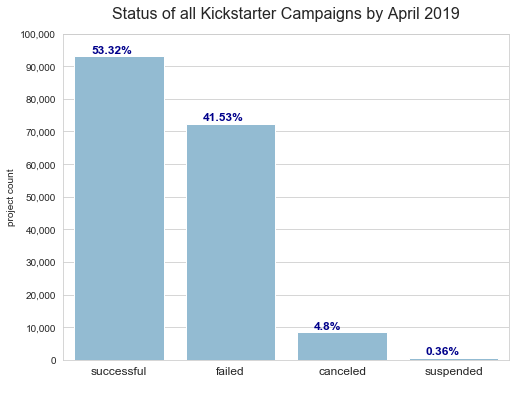

In [65]:
# style
plt.figure(figsize=[8,6])

# create ordering
order = master_df.status.value_counts().index

# plot bar chart for catergorical data
ax = sns.countplot(data=master_df, x='status', color=cust_blues, order=order);

# annotate proportions 
for p in ax.patches:
    ax.text(p.get_x()+0.15, 
            p.get_height()+1000, 
            str(round((p.get_height() / len(master_df))*100,2)) + '%', 
            fontsize=12, color='darkblue', weight='bold')

# labels and ticks
plt.title("Status of all Kickstarter Campaigns by April 2019", fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.xlabel(" ")
format_yticks(master_df.status.value_counts().values.max(), 10000)
plt.ylabel("project count")
plt.show()

Here we see that since the launch of Kickstarter in 2009, most campaigns ended successfully (53.3%). 41.5% of all projects failed. A relatively small amount of projects never finished because they were either canceled or suspended. 

**What was the outcome of all completed projects?**

Below we are going to plot the success and failure counts of projects that were completed ordinarily.

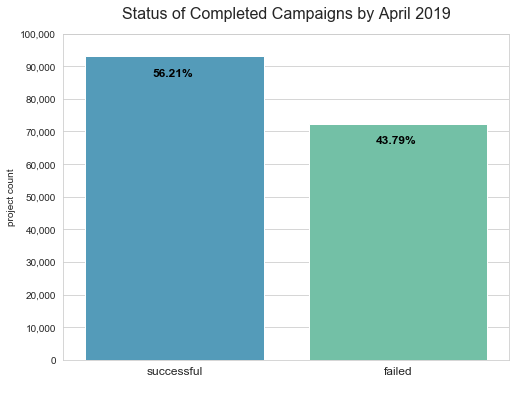

In [66]:
# settings
plt.figure(figsize=[8,6])

# plot bar plor of completed projects only
ax = sns.countplot(data=ks_compl, x='status', 
                   color=sns.set_palette(status_colors), 
                   order=ks_compl.status.value_counts().index);

# annotate proportion
for p in ax.patches:
    ax.text(p.get_x()+0.3, p.get_height()-6000, 
            str(round((p.get_height()/ len(ks_compl))*100,2)) + '%', 
            fontsize=12, color='black', weight='bold')

# labels and ticks
plt.title("Status of Completed Campaigns by April 2019", fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.xlabel(" ")
format_yticks(ks_compl.status.value_counts().values.max(), 10000)
plt.ylabel("project count")
plt.show()

Out of all completed projects, there were {{format_num(n_compl_success)}} successfully funded projects in our data frame. More than half of all completed campaigns were successful. {{format_num(n_compl_fail)}} of all completed projects ended in failure. If we disregard projects that were either canceled or suspended, the proportion of successful campaigns was 56%.

### Project Types

**What kind of categories, subcategories and combined categories were popular?**

To analyze project categories, I will start by visualizing the distribution of the parent categories.

**Parent Categories**  

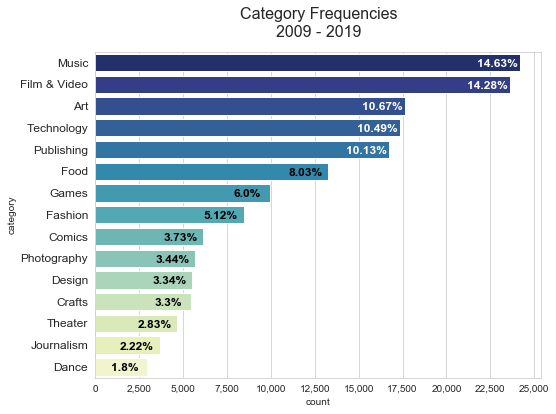

In [67]:
# settings
plt.figure(figsize=[8,6])

# plot horizontal bars of main categories
ax = sns.countplot(data=ks_compl, y='category', palette="YlGnBu_r", 
                   order=ks_compl.category.value_counts().index);

# annotate proportions
cat_counts = ks_compl.category.value_counts()
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    count = int(cat_counts[label.get_text()])
    cat_rate = str(round(count*100 / n_compl_projects, 2)) + "%"
    # white annotation for top categories
    if count > 15000:
        plt.text(count-1300, loc+0.2, cat_rate, ha='center', color="white", fontsize=12, fontweight='bold')
     # black annotations for lower categories
    else:
        plt.text(count-1300, loc+0.2, cat_rate, ha='center', color="black", fontsize=12, fontweight='bold')
    
# labels and ticks
plt.title("Category Frequencies\n2009 - 2019", fontsize=16, pad=15);

plt.yticks(fontsize=12)
plt.ylabel("category")
format_xticks(ks_compl.category.value_counts().values.max(), 2500)
plt.show()

**Subcategories**  
As subcategories can appear under several parent categories, I'm going to depict the project frequencies of combined categories, which considers the parent category and subcategory. 

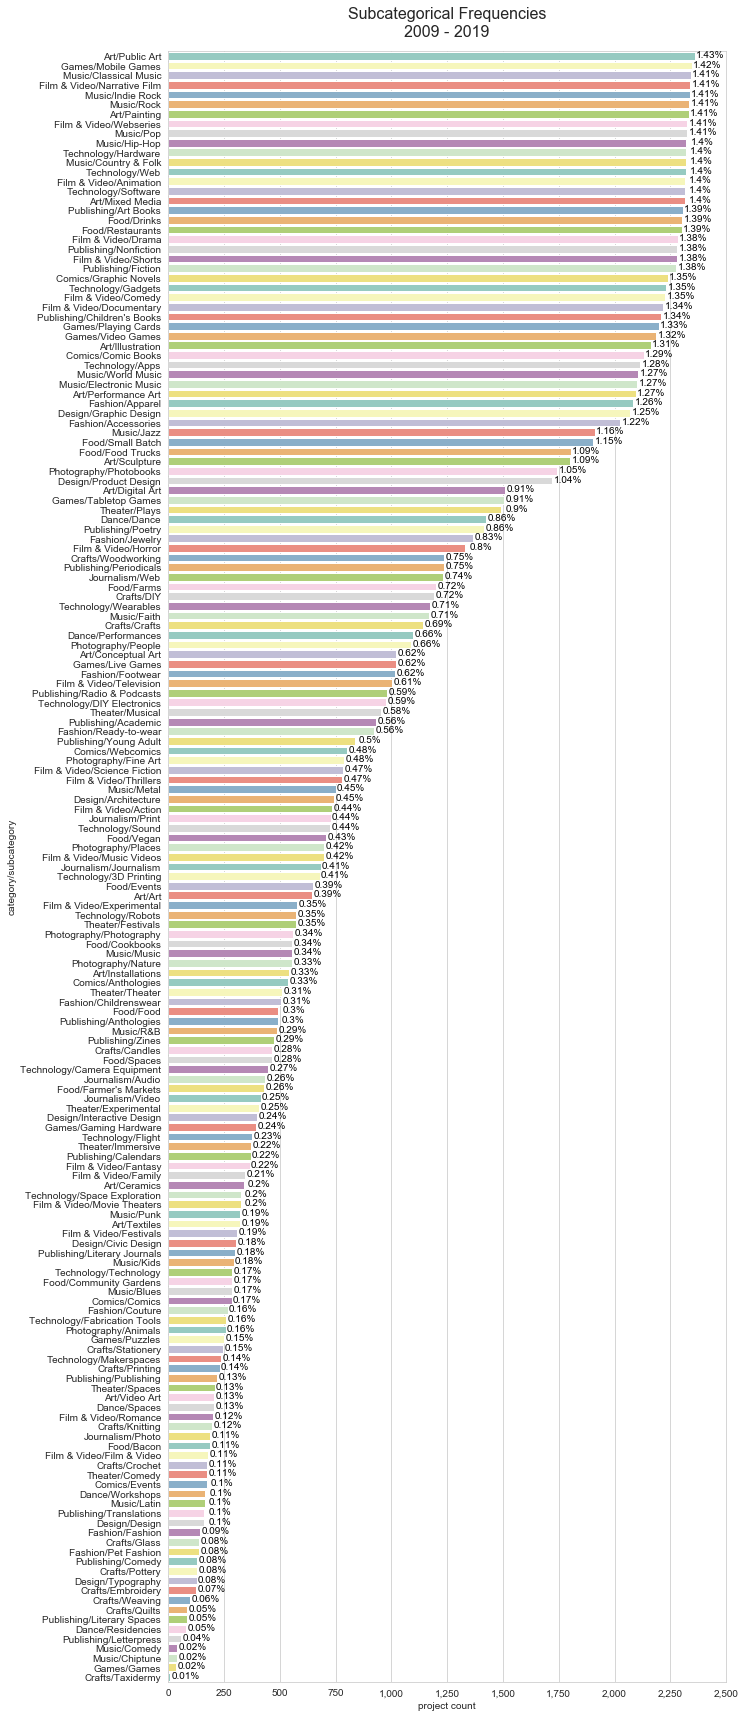

In [68]:
# settings
plt.figure(figsize=[10,30])

# plot horizontal bars of main categories
ax = sns.countplot(data=ks_compl, y='comb_cat', palette="Set3",
                   order=ks_compl.comb_cat.value_counts().index);

# annotate proportions
cat_counts = ks_compl.comb_cat.value_counts()
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    count = int(cat_counts[label.get_text()])
    cat_rate = str(round(count*100 / n_compl_projects, 2)) + "%"
    plt.text(count+70, loc+0.15, cat_rate, ha='center', color="black")
    
# labels and ticks
plt.title("Subcategorical Frequencies\n2009 - 2019", fontsize=16, pad=15);
plt.ylabel("category/subcategory")
format_xticks(ks_compl.comb_cat.value_counts().values.max(), 250)
plt.xlabel("project count")
plt.show()    

**Best Of Categories/Subcategories**  
Since there are so many subcategories, I'm going to plot the top and bottom proportion of combined categories.

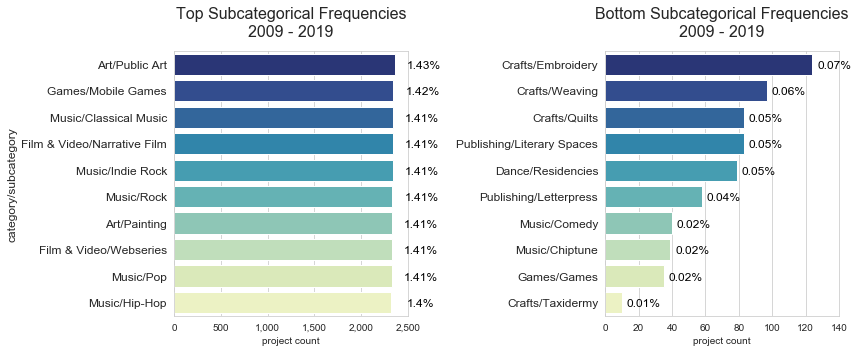

In [69]:
# save 10 most popular combined categories
pop_subcats = ks_compl.comb_cat.value_counts().index[:10]

# save 10 most uncommon combined categories
unpop_subcats = ks_compl.comb_cat.value_counts().index[-10:]

# settings
plt.figure(figsize=[12,5])

# left plot: top subcategorical count as horizontal bars
plt.subplot(1,2,1)
ax = sns.countplot(data=ks_compl, y='comb_cat', palette="YlGnBu_r",
                   order=pop_subcats);

# annotate proportions
cat_counts = ks_compl.comb_cat.value_counts()
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    count = int(cat_counts[label.get_text()])
    cat_rate = str(round(count*100 / n_compl_projects, 2)) + "%"
    plt.text(count+310, loc+0.15, cat_rate, ha='center', color="black", fontsize=12)

# labels and ticks
plt.yticks(fontsize=12)
plt.ylabel("category/subcategory", fontsize=12)
plt.title("Top Subcategorical Frequencies\n2009 - 2019", fontsize=16, pad=15); 
format_xticks(ks_compl.comb_cat.value_counts().values.max(), 500)
plt.xlabel("project count")


# right plot: top subcategorical count as horizontal bars
plt.subplot(1,2,2)
ax = sns.countplot(data=ks_compl, y='comb_cat', palette="YlGnBu_r",
                   order=unpop_subcats);
plt.title("Bottom Subcategorical Frequencies\n2009 - 2019", fontsize=16, pad=15);

# annotate proportions
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    count = int(cat_counts[label.get_text()])
    cat_rate = str(round(count*100 / n_compl_projects, 2)) + "%"
    plt.text(count+13, loc+0.15, cat_rate, ha='center', color="black", fontsize=12)
      
# labels and ticks
plt.yticks(fontsize=12)
plt.ylabel("category/subcategory")
format_xticks(130,20)
plt.xlabel("project count")
plt.ylabel("")
plt.tight_layout()
plt.show()    

**Popular Categories and their respective subcategories**  

Let's take a look at the 6 most common categories in depth. By separating the top 6 categories into subplots to evaluate respective top 10 subcategories, I hope to shed light what kind of projects are typically being funded on Kickstarter. 

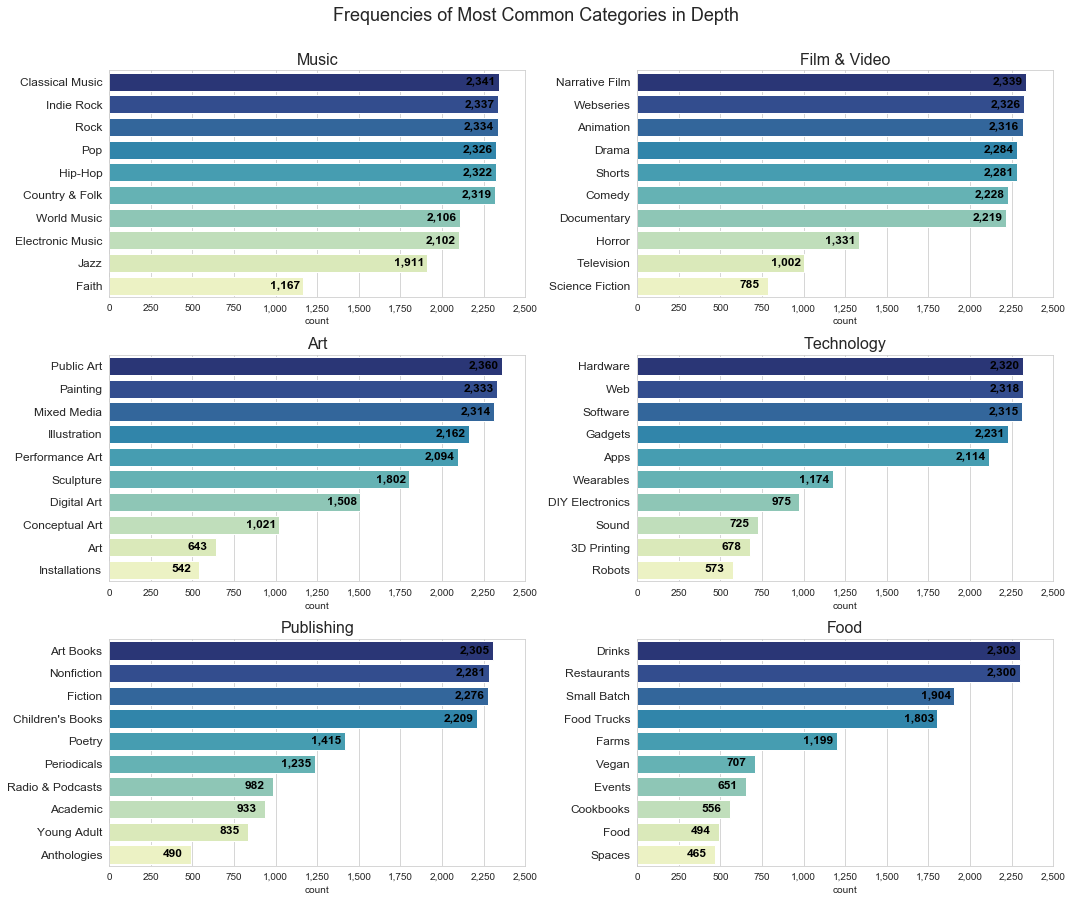

In [70]:
# settings
plt.figure(figsize=[15,12])


# subplots
for i, cat in enumerate(ks_compl.category.value_counts().index[:6]):
        # filter dataframe by category
        ks_compl_cat = ks_compl.query('category == @cat')
        
        plt.subplot(3, 2, i+1)
        # plot horizontal bars
        ax = sns.countplot(data=ks_compl_cat, y='subcategory', palette='YlGnBu_r',  
                           order=ks_compl_cat.subcategory.value_counts()[:10].index);
        # labels and ticks
        plt.yticks(fontsize=12)
        plt.ylabel("")
        plt.subplots_adjust(bottom=-0.1)
        format_xticks(ks_compl_cat.subcategory.value_counts().max(),250)
        
        # annotate
        cat_counts = ks_compl_cat.subcategory.value_counts()
        plt.title(f"{cat}", fontsize=16)
        locs, labels = plt.yticks()
        for loc, label in zip(locs, labels):
            count = cat_counts[label.get_text()]
            plt.text(count-110, loc+0.1, format_num(count), ha='center', 
                     color="black", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.suptitle("Frequencies of Most Common Categories in Depth", fontsize=18, y=1.04)
plt.show()

The above plots demonstrate the strong creative focus and B2B character of crowdfunding campaigns on Kickstarter. We can confirm that _Music_, _Film & Video_ and _Art_ were among the most frequent project categories. 

By taking a more detailed look on subcategorical values, we found _Public Art_, _Classical Music_ and _Mobile Games_ as the most popular project types. The proportion of those subcategories was 1.4% each. Notice that the relative distribution of subcategories is relatively even. About one third of all subcategories range between relative shares of 1.4% to 1% of all projects. Thus, we do not find subcategories that stand out.

Generally, we clearly recognize a focus on creative disciplines. The top project types were ventures like Public Art, Classical Music, Art Books and Web Series. From a business perspective without knowing the details, such kind of projects are usually not known to speak to the public mainstream; nor do they typically generate high commercial incomes. 

From a professional investor's perspective tech projects and food projects may have the greatest potential to break the low commercial potential. Although many of their subcategories (e.g. vegan, small batch, gadgets and wearables etc.) indicate a rater creative niche character. 

Due to mostly creative industries being represented here, we do not expect Kickstarter to be relevant for entrepreneurial ventures with a strong for-profit focus, nor high capital intensity, nor B2B projects. This doesn't surprise since crowdfunding as a financial tool usually attracts a private audience instead of professional investors. 

### Featured
**How did Kickstarter promote campaigns?**  

As a next step, I'm going to investigate how Kickstarter supported projects. Let's start by plotting the value counts of the data point _"featured"_.

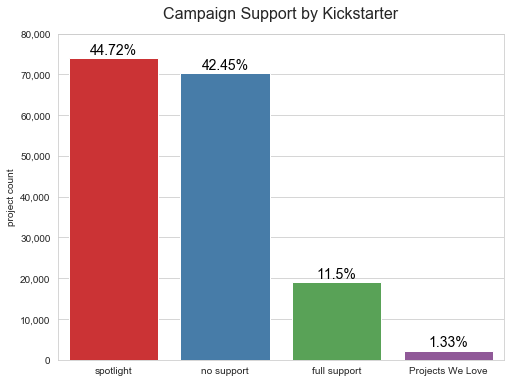

In [71]:
# settings
plt.figure(figsize=[8,6])

# order
feat_order = ks_compl.featured.value_counts().index

# plot vertical bars
ax = sns.countplot(data=ks_compl, x='featured', color=sns.set_palette(feat_color),
                   order=feat_order)

# annotate percentages
for i, feat in enumerate(feat_order):
    rate = (ks_compl.featured.value_counts().values[i] / n_compl_projects) * 100
    plt.text(i, ks_compl.featured.value_counts().values[i]+1000, str(round(rate, 2)) + "%", 
             ha='center', fontsize=14, color="black")

# ticks and labels
plt.xlabel("")
format_yticks(80000, 10000)
plt.ylabel("project count")
plt.title("Campaign Support by Kickstarter", fontsize=16, pad=15);
plt.show();

44.8% of all projects were spotlighted by Kickstarter on their landing page. Nearly the same amount of projects was not at all promoted by Kickstarter. Every 11th project was fully featured by Kickstarter. To be precise, 11.5% of all completed projects were featured on the landing page and additionally picked by staff for the "Projects We Love" badge. Only a very small amount of project were awarded the badge, but were not promoted any further. 

Overall, more than every second project was supported by Kickstarter. 

### Duration
I suspect the funding duration to influence the probability of success and failure of a campaign. Thus, I will visually assess duration next.

**How is the funding duration distributed across projects?**

In [72]:
ks_compl.duration.value_counts().head()

30 days 00:00:00    58356
60 days 00:00:00    8143 
29 days 23:00:00    6624 
30 days 01:00:00    5617 
45 days 00:00:00    4410 
Name: duration, dtype: int64

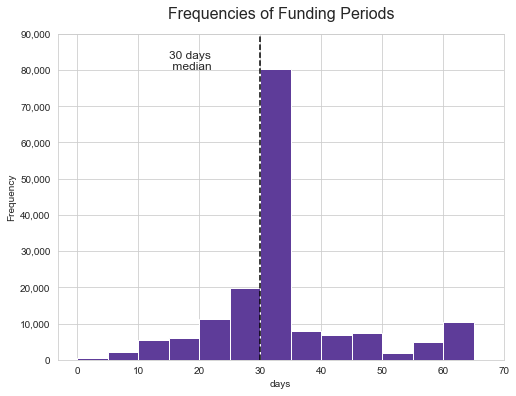

In [73]:
# settings
plt.figure(figsize=[8,6])

# plot histogram of project duration
ks_compl['duration_days'].plot.hist(color=duration_color, bins=np.arange(0, 70,5))

# annotate median duration
plt.axvline(ks_compl['duration_days'].median(), color='black', linestyle='--')

# labels and titles
plt.title("Frequencies of Funding Periods", fontsize=16, pad=15 );
plt.text(15, 80000, str(ks_compl['duration_days'].median())[:-2] + " days\n median", fontsize=12)
format_yticks(90000,10000)
format_xticks(70,10)
plt.xlabel("days")
plt.show()

The above normally distributed plot shows that funding durations around 30 days dominated. There is second modal peak in durations at 60-65 days.

## Goals

I assume that goals are one of the main predictors of whether a project succeeded or failed. From the above statistical assessment, I expect my visuals to be extremely skewed to the right. In order to make the plots readable, I will use different techniques. Aside from using the 95% quantile data frame, I will use log scales and I will group the data in multiple goal levels. 

**How are goals distributed across completed campaigns?**

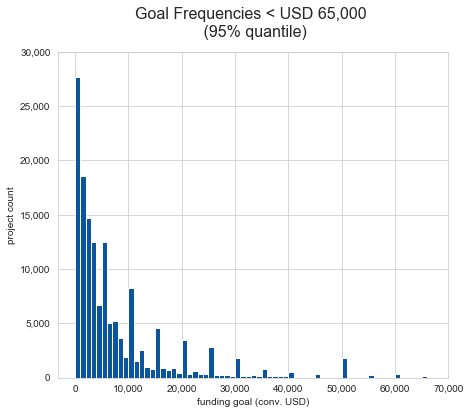

In [74]:
# style
plt.figure(figsize=[7,6])

# Create bins
bin_edges = np.arange(0, ks_compl_95.goal_hist_usd.max()+1000, 1000)

# plot bars of 95% quantile data
plt.hist(data = ks_compl_95, x = 'goal_hist_usd', bins = bin_edges, color=goal_color);

# labels and titles
plt.title("Goal Frequencies < USD 65,000 \n (95% quantile)", fontsize=16, pad=15)
format_xticks(goal_95, 10000)
plt.xlabel("funding goal (conv. USD)")
format_yticks(30000, 5000)
plt.ylabel("project count")

plt.show()

The visualization above depicts the distribution of funding goals of completed projects(95% quantile). Be aware that funding goals are cut off above USD 65k. Plotting the actually goals up to USD {{format_num(goal_max)}} would skew the curve further and result in an unreadable plot. Notice the accumulation of low funding goals and the long right tail of the plot. Characteristic for the above distribution are the multimodal peaks of funding goals that seem to occur on a regular frequency. 

To better understand the distribution of funding goals, I will again plot the goal distribution of all completed project; this time using a logarithmic scale. 

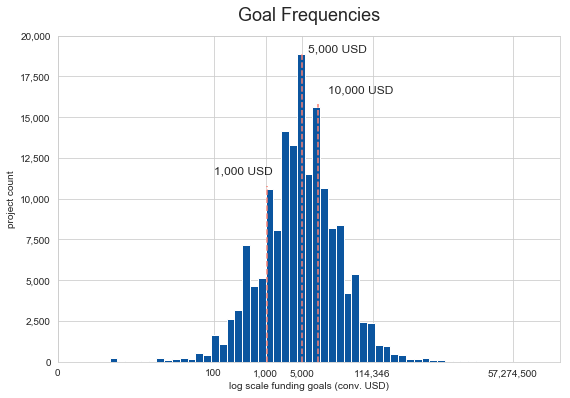

In [75]:
# settings
plt.figure(figsize=[9,6])
base_color = sns.color_palette("Blues_r")[0]

# create log scale and bin data 
log_data = np.log10(ks_compl.goal_hist_usd)
log_bin_edges = np.arange(0, log_data.max()+0.15, 0.15)

# plot histogram using binned log data 
plt.hist(log_data, bins = log_bin_edges, color=base_color);

# annotations

# calculate peaks
peaks = ks_compl.goal_hist_usd.value_counts().index[:3]
log_peaks = [np.log10(peak) for peak in peaks]
texts = [format_num(peak) + " USD" for peak in peaks]
ax = plt.gca()

# 5000 peak
ax.axvline(x=log_peaks[0], color='salmon', ymax=0.95, linestyle="dashed")
ax.annotate(texts[0], xy=(log_peaks[0]+0.11, 19000),fontsize=12)

# 10 000 peak
ax.axvline(x=log_peaks[1], color='salmon', ymax=0.79, linestyle="dashed")
ax.annotate(texts[1], xy=(log_peaks[0]+0.5, 16500),fontsize=12)

# 1000 peak
ax.axvline(x=log_peaks[2]+0.01999, color='salmon', ymax=0.539, linestyle="dashed")
ax.annotate(texts[2], xy=(log_peaks[2]-1, 11500),fontsize=12)

# labels and ticks
plt.title("Goal Frequencies", fontsize=18, pad=15)

format_yticks(20000, 2500)
plt.ylabel("project count")

x_ticks = [0.1, 100, 1000, goal_50,  round(goal_975,2), round(goal_outliers,2) ]
x_tick_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(np.log10(x_ticks), x_tick_labels)
plt.xlabel('log scale funding goals (conv. USD)')

plt.show()

In contrast to the previous plot, this plot shows the full range of funding goals, including extremes and outliers. Using a log scale on the x-axis results in a rather symmetrical normal distribution of goals: the highest peak is at the median of USD 5k, the second highest peak occurs at USD 10k. 

However, by using a log scale, the above visualization hides the extremely skewed nature of funding goals and may lead to misinterpretation. Moreover, the local maxima of funding goals are not as obvious. To bring the analysis of goals to the next level, I'm going to split goals into ordered categorical groups based on the aforementioned quantiles.   

In [76]:
# bin observations into ordinal goal categories
bin_edges = [goal_min, goal_25, goal_50, goal_75, goal_95, goal_975, goal_outliers, goal_max]
bin_names = ['low', 'medium', 'moderately high', 'high', 'very high', 'extreme', 'outliers']

# Creates goal_level column 
pd.set_option('mode.chained_assignment', None)
ks_compl['goal_level'] = pd.cut(ks_compl['goal_hist_usd'], bin_edges, labels=bin_names)
ks_success_95['goal_level'] = pd.cut(ks_success_95['goal_hist_usd'], bin_edges, labels=bin_names)
ks_fail_95['goal_level'] = pd.cut(ks_success_95['goal_hist_usd'], bin_edges, labels=bin_names)

# create data frames filtered by each goal levels
ks_compl_goal_low = ks_compl[ks_compl.goal_level == "low"]
ks_compl_goal_medium = ks_compl[ks_compl.goal_level == "medium"]
ks_compl_goal_moderate = ks_compl[ks_compl.goal_level == "moderately high"]
ks_compl_goal_high = ks_compl[ks_compl.goal_level == "high"]
ks_compl_goal_very_high = ks_compl[ks_compl.goal_level == "very high"]
ks_compl_goal_extreme = ks_compl[ks_compl.goal_level == "extreme"]

# cluster leveled data frames into a list
ks_goal_leveled = [ks_compl_goal_low, ks_compl_goal_medium, 
                   ks_compl_goal_moderate, ks_compl_goal_high, ks_compl_goal_very_high, 
                   ks_compl_goal_extreme]

# show counts per goal level
ks_compl.goal_level.value_counts()

medium             47697
low                42477
moderately high    33915
high               33090
very high          4136 
extreme            4120 
outliers           17   
Name: goal_level, dtype: int64

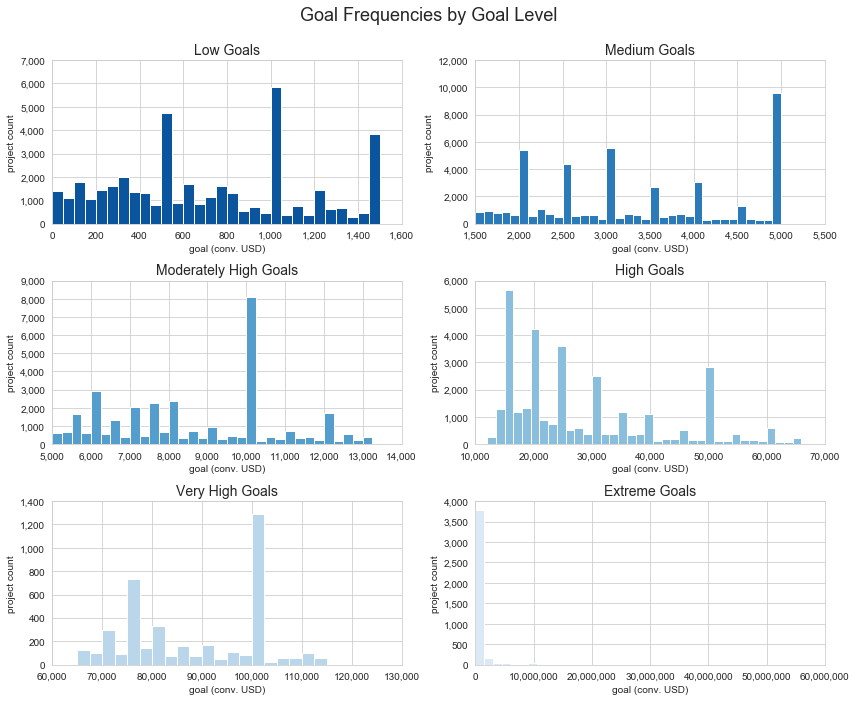

In [77]:
# style
fig = plt.figure(figsize=[12,12])
base_color = sns.color_palette("Blues_r")

bin_sizes = [50, 100, 250, 1500, 2500, 1500000]
for i, level in enumerate(bin_names[:-1]):
    plt.subplot(4, 2, i+1)
    # create bins 
    bin_edges_leveled = np.arange(0, ks_goal_leveled[i].goal_hist_usd.max()+bin_sizes[i], bin_sizes[i])
    # plot frequencies
    plt.hist(data = ks_goal_leveled[i], x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[i])
    
    # labels and ticks
    plt.title(level.title() +" Goals", fontsize=14)
    plt.xlabel("goal (conv. USD)")
    plt.ylabel("project count")
    plt.xlim(bin_edges[i],)
    xlocs, xlabels = plt.xticks()
    xlabels = [format_num(xloc) for xloc in xlocs]
    plt.xticks(xlocs, xlabels)
    ylocs, ylabels = plt.yticks()
    ylabels = [format_num(yloc) for yloc in ylocs]
    plt.yticks(ylocs, ylabels)
    plt.subplots_adjust(bottom=-0.3)

plt.suptitle("Goal Frequencies by Goal Level", fontsize=18, y=1.03)
plt.tight_layout()
plt.show()

To guide the attention towards the multi-modal peaks, I plotted the distribution of goals for each goal category. Due to the long right tail and to improve readability of the above graphs, I limited the graphs to goals under USD 57mi.   

There are extreme outliers at the upper end of funding goals that are not easily to depict in a plot. In each goal category, there is a higher frequency of lower goals on the left side of the plot. However, there are remarkable peaks in every goal category that seem to march to a different drummer. Here the multi modal character of goals becomes apparent. Some of the most dominant goals are: USD 500, 1k 1,5k, 5k, 10k and 100l. Below, I will programmatically calculate the most important modes by goal level.  

In [78]:
# print summary
for name, df in zip(bin_names, ks_goal_leveled):
    frequencies = df.goal_hist_usd.value_counts().index[:5]
    freq_counts = df.goal_hist_usd.value_counts().values[:5]
    print(f"\nFrequency peaks of {name} goal projects:")
    for i in range(5): print(f"USD {format_num(frequencies[i])}, count: {format_num(freq_counts[i])}")


Frequency peaks of low goal projects:
USD 1,000, count: 5,579
USD 500, count: 4,196
USD 1,500, count: 3,502
USD 300, count: 1,242
USD 1,200, count: 1,109

Frequency peaks of medium goal projects:
USD 5,000, count: 9,308
USD 3,000, count: 5,158
USD 2,000, count: 4,997
USD 2,500, count: 3,949
USD 4,000, count: 2,789

Frequency peaks of moderately high goal projects:
USD 10,000, count: 7,889
USD 6,000, count: 2,447
USD 8,000, count: 2,048
USD 7,000, count: 1,593
USD 7,500, count: 1,578

Frequency peaks of high goal projects:
USD 15,000, count: 4,320
USD 20,000, count: 3,715
USD 25,000, count: 3,085
USD 50,000, count: 2,703
USD 30,000, count: 2,216

Frequency peaks of very high goal projects:
USD 100,000, count: 1,227
USD 75,000, count: 571
USD 80,000, count: 247
USD 70,000, count: 197
USD 85,000, count: 107

Frequency peaks of extreme goal projects:
USD 150,000, count: 399
USD 250,000, count: 315
USD 200,000, count: 264
USD 500,000, count: 202
USD 300,000, count: 147


Creator's funding goals can go up to several millions. However, 3 quarters of goals were below USD 13k. Our plots show a right-skewed goal distribution across all goal categories. Additionally, the distribution of goals has a multimodal character. Goals are usually defined at full numbers. The most frequent goals were: 

1) USD 5k,   
2) USD 10k,   
3) USD 1k,    
4) USD 3k  
5) USD 4k.  

### Pledged

**How is the amount of funding distributed across completed projects?**

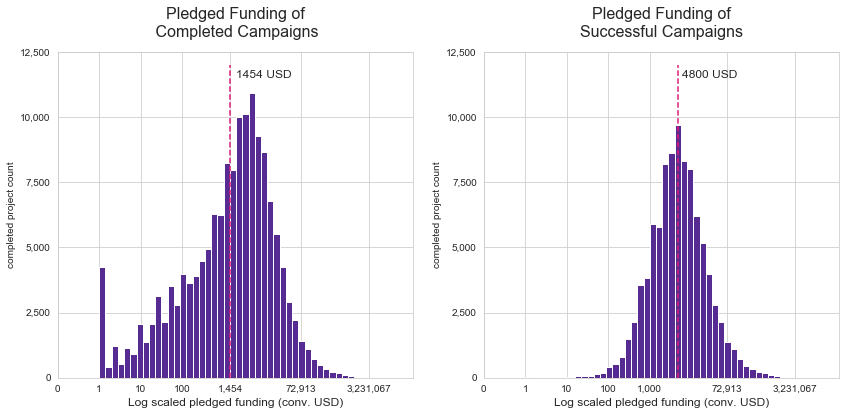

In [79]:
# settings
plt.figure(figsize=[14,6])
base_color = sns.color_palette("Purples_r")[0]

# left plot: pledged amount all completed projects
plt.subplot(1,2,1)
# create log scale and bin data 
df = ks_compl.pledged_hist_usd.replace(0, 0.01) # to avoid zero division error for log scale 
log_data = np.log10(df)
log_bin_edges = np.arange(0, log_data.max()+0.15, 0.15)

# plot histogram using binned log data 
plt.hist(log_data, bins = log_bin_edges, color=base_color);

# annotate median
ax = plt.gca()
ax.axvline(x=np.log10(pledged_50), color='#dd1c77', ymax=0.96, linestyle="dashed")
ax.annotate(str(int(pledged_50)) + " USD", xy=(np.log10(pledged_50+500), 11500),fontsize=12)

# labels and ticks
plt.title("Pledged Funding of\n Completed Campaigns", fontsize=16, pad=15)

format_yticks(12500,2500)
plt.ylabel("completed project count")

x_ticks = [0.1, 1, 10, 100, pledged_50,  round(pledged_975,2), round(pledged_outliers,2) ]
x_tick_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(np.log10(x_ticks), x_tick_labels)
plt.xlabel('Log scaled pledged funding (conv. USD)', fontsize=12)

# right plot: pledged amount all completed projects
plt.subplot(1,2,2)

# create log scale and bin data 
df = ks_compl_success.pledged_hist_usd.replace(0, 0.01) # to avoid zero division error for log scale 
log_data = np.log10(df)
log_bin_edges = np.arange(0, log_data.max()+0.15, 0.15)

# plot histogram using binned log data 
plt.hist(log_data, bins = log_bin_edges, color=base_color);

# annotate median
ax = plt.gca()
ax.axvline(x=np.log10(df.median()), color='#dd1c77', ymax=0.96, linestyle="dashed")
ax.annotate(str(int(df.median())) + " USD", xy=(np.log10(pledged_50+4400), 11500),fontsize=12)

# labels and ticks
plt.title("Pledged Funding of\nSuccessful Campaigns", fontsize=16, pad=15)

format_yticks(12500,2500)

plt.ylabel("completed project count")

x_ticks = [0.1, 1, 10, 100, 1000,  round(pledged_975,2), round(pledged_outliers,2) ]
x_tick_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(np.log10(x_ticks), x_tick_labels)
plt.xlabel('Log scaled pledged funding (conv. USD)', fontsize=12)

plt.show()

Above I depicted the log scaled distribution of pledges. On the left side, I depicted all completed projects and the right plot shows the distribution of successful projects only. 

In contrast to the distribution of goals, the bell curve of the pledged funding of all completed projects is non-symmetrical. The top of the curve is right off the median of USD 1,471. In spite of the right-skewed character of pledges, very low amounts of pledges are common when the funding period ended. A remarkable number of ventures actually ends a campaign with no funding at all. Please note that projects, that did not collect any investments are counted into the first bin of the histogram.

This result doesn't surprise if we take a look at the plot on the right. If we only consider successful projects, the distribution is a rather symmetrical, normally distributed curve. The axial shift towards very low pledges is hardly noticeable. On average successful projects generated a median funding of USD 4,800.

### Backers

Let's move our attention to the number of supporters. By plotting the distribution of backers of completed projects, I hope to find answers to the question: How many backers does a projects usually achieve? And what number does it usually take to end a campaign in success? 

**How is the number of supporters distributed across projects?**

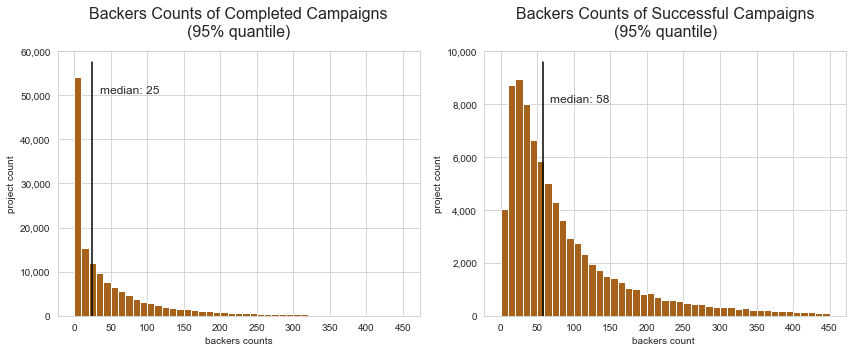

In [80]:
# to depict distribution of backers, use 95 quantile dataframe
plt.figure(figsize=[12,5])
bin_edges = np.arange(0, ks_compl_95['backers_count'].max()+10, 10)

# left plot: total distribution of backers of all completed projects
plt.subplot(1,2,1)
plt.hist(data = ks_compl_95, x = 'backers_count', bins= bin_edges, color=backers_color);

# labels and titles
plt.title("Backers Counts of Completed Campaigns\n(95% quantile)", fontsize=16, pad=15)
format_xticks(450, 50)
plt.xlabel("backers counts")
format_yticks(60000, 10000)
plt.ylabel("project count")

# annotate median
ax = plt.gca()
ax.axvline(x=backers_50, color='black', ymax=0.96)
ax.annotate("median: " + str(int(backers_50)), xy=(backers_50+10, 50500),fontsize=12)

# right plot: total distribution of backers of successful projects
plt.subplot(1,2,2)
plt.hist(data = ks_success_95, x = 'backers_count', bins=bin_edges, color=backers_color);

# annotate median
ax = plt.gca()
backers_50_s = ks_success_95.backers_count.median()
ax.axvline(x=backers_50_s, color='black', ymax=0.96)
ax.annotate("median: " + str(int(backers_50_s)), 
            xy=(backers_50_s+10, 8050),fontsize=12)

#labels and titles
plt.title("Backers Counts of Successful Campaigns\n(95% quantile)", fontsize=16, pad=15)
format_yticks(10000, 2000)
plt.ylabel("project count")
format_xticks(450, 50)
plt.xlabel("backers count ")

plt.tight_layout()
plt.show()

The above plots describe the distribution of the number of backers per project. On the left side, I took all completed projects into account, whereas the right plot considered successful projects only. In order to improve readability, I renounced very high and extreme backer counts by displaying 95% quantile data.    

The distribution of the number of supporters across all completed projects demonstrates the dominance of a rather low number of backers. More than a quarter of all completed ventures convinced less than {{int(backers_25)}} supporters. 
The plot decreases sharply beyond 10 backers per project. The number of occurrences decreases smoothly thereafter. The occurrences of projects with higher supporter counts becomes less and less common.  

The plot on the right visualizes successful campaigns. On average successful campaigns completed the funding with {{int(ks_compl_success.backers_count.median())}} supporters. However, most successful campaigns were supported by 20-50 backers. Higher number of backers become more and more unlikely. The 95% quantile data maxes at 450 backers per project.

To improve interpretation, I'm going to try a log scale approach below for successful projects.

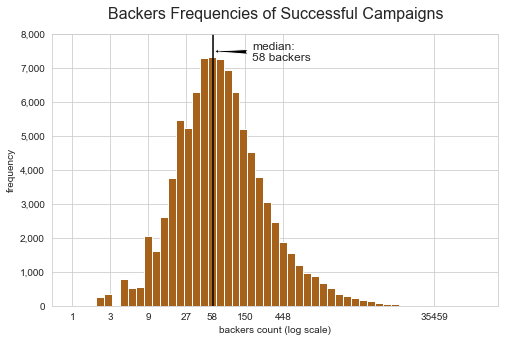

In [81]:
# plot using log scale
plt.figure(figsize=[8,5])

# log transform data 
log_data = np.log10(ks_compl_success['backers_count']) 
log_bin_edges = np.arange(0.001, log_data.max()+0.1, 0.1)

# plot
plt.hist(log_data, bins = log_bin_edges, color=backers_color)

# annotate median
ax = plt.gca()
ax.axvline(x=np.log10(backers_50_s), color='black')

# annotate binned peak
ax.annotate("median:\n" + str(round(int(backers_50_s))) + " backers", fontsize=12,
            xy=(log_trans(backers_50_s), 7490), 
            xytext=(log_trans(backers_50_s)+0.5,7200),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
tick_locs = [1, 3, 9, 27, int(round(backers_50_s)), 150, int(round(backers_95)), int(backers_outliers)]
plt.xticks(np.log10(tick_locs),tick_locs)
plt.xlabel("backers count (log scale)")

format_yticks(8000,1000)
plt.ylabel("frequency")
plt.title("Backers Frequencies of Successful Campaigns", fontsize=16, pad=15)

plt.show()

The above visualization shows the distribution of backers counts of successful projects with a log scale applied on the data to offset the long right tail. The log-scale approach reveals a non-symmetrical bell shape of backers. In contrast to the relatively smoothly decreasing curve on the right side, the low side of backers counts describe a more irregularly shaped curve with pronounced occurrences of low backers counts per project. 

50% of all successful campaigns acquired less than {{backers_50_s}} supporters. The highest successful backers count was {{format_num(ks_compl_success.backers_count.max())}} backers.

After analyzing each data point individually, I gained a general understanding about the relevant data points. In the following analyses, I'm going to focus on my 2 research questions. I will correlate  relate variables against each other. The relationship of the variables will allow me to answer my research questions:

## 6.1  Is it still worthwhile financing your project on Kickstarter, now that crowdfunding has become mainstream?<a name="mainstream"></a>

In recent years, crowdfunding incited a lot of excitement. More and more project creators recognized crowdfunding as a form of investment and launched campaigns. Instead of asking professional investors or banks for funding, people sought funding from private supporters. 

In the meantime, multiple platforms dedicated to specific purposes and applying different variations of crowdsourcing evolved globally. 
In the light of increased competition, creators of campaigns likely face bigger challenges when they court for attention and investment. Additionally, media often enough reported scams which may have deterred potential supporters from pledging their money.

I'm curious how its popularity and the saturated market affected campaigns. With thousands of campaigns competing against each other globally, we would expect lower chances of success today. Furthermore, it would make sense for project creators to realize lower fundraising goals.

In the following analysis, I'm going to investigate how crowdfunding as an investment opportunity on Kickstarter has evolved over time. My goal is to find an answer if running a campaign today still pays off compared to previous years. Did the overall conditions worsen due to the Kickstarter's popularity? How may have campaign characteristics changed on Kickstarter's 10th anniversary, compared to previous years?

This research topic clearly implies a time component. Thus, I'm going to depict the most relevant characteristics of the Kickstarter data set on a timeline. First of all, let's visualize Kickstarter's historical prosperity.  

To plot the absolute counts of projects over a period of 10 years, I'm going to group completed projects by year and month using the campaign deadline. Due to zero counts in some of the 120 months, I will manually create a monthly index and add zero values to missing months. Finally, I will store the project counts into a dataframe. 

In [82]:
# create dataframe
df_project_counts = pd.DataFrame(data={'total': [0.0]*120, 
                              'success':  [0.0]*120, 
                              'failed':  [0.0]*120, 
                              'date': dates})

# fill data frame with absolute project counts per month
for df, label in [(ks_compl, 'total'), (ks_compl_success, 'success'), (ks_compl_failed, 'failed')]:
    # calculate monthly abs. project counts
    counts = df.groupby([df.deadline.dt.year, df.deadline.dt.month])\
                        .count()['project_id']
    # the above grouping ignores months with zero counts, so we manually add zero values
    # re-create a new multi-index, this time including all 12 months per year
    levels = [counts.index.levels[0].values, range(1,13)]
    new_index = pd.MultiIndex.from_product(levels, names=['year', 'month'])
    # re-index counts and fill empty values with zero
    counts = counts.reindex(new_index, fill_value=0).values
    # remove months Jan-April 2014 and, May-Dec 2019 
    counts = counts[4:-8]
    # add to dataframe
    df_project_counts[label] = counts
    
df_project_counts.tail(5)

total  success  failed       date
115  2340   1578     762    2018-12-01
116  1543   958      585    2019-01-01
117  1862   1322     540    2019-02-01
118  2560   1913     647    2019-03-01
119  2481   1788     693    2019-04-01

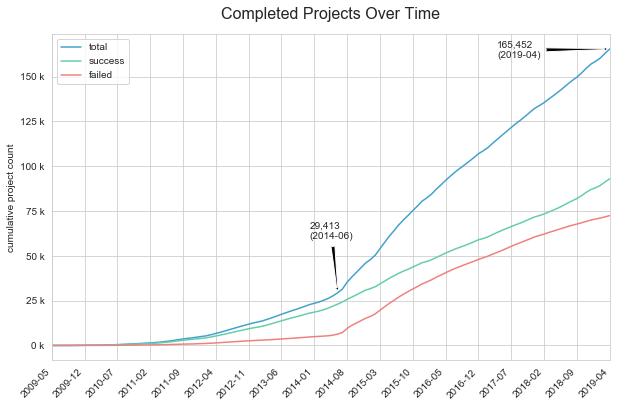

In [83]:
# settings
plt.figure(figsize=[10,6])

# plot cumulative sum of project month after month of completed projects
for i, col in enumerate(df_project_counts.columns[:-1]):
    # calculate cumulative sum and plot
    ax = df_project_counts[col].cumsum().plot(color=status_colors[i])

# annotate June 2014
ax.annotate(format_num(df_project_counts.total.cumsum().values[61]) + "\n(2014-06)", 
            xy=(61, df_project_counts.total.cumsum().values[61]), 
            xytext=(55,df_project_counts.total.cumsum().values[61] + 30000),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# annotate current number of projects 
ax.annotate(format_num(df_project_counts.total.cumsum().values[-1])+ "\n(2019-04)", 
            xy=(119, df_project_counts.total.cumsum().values[-1]), 
            xytext=(95,df_project_counts.total.cumsum().values[-1]- 5000),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))    
    
# labels and titles
plt.title("Completed Projects Over Time", fontsize=16, pad=15)
plt.xlabel('campaign deadline (year, month)')

# improve readability of y ticks
ylabels = ['{:,.0f}'.format(ytick) + ' k' for ytick in ax.get_yticks() / 1000]
ax.set_yticklabels(ylabels)
plt.ylabel('cumulative project count')

# improve readability of y ticks
timeline_ticks(df_project_counts)

plt.legend()
plt.show()

After Kickstarter's launch in April 2009, it took about 3 years until the platform gained momentum. By 2012, the growth of projects started picking up speed slowly. Yet, it took another two years for Kickstarter to thrive. Suddenly, by mid 2014, the number of projects took a sharp upward turn. Ever since, the sum of campaigns has been linearly increasing.   

In June 2014, our data set recorded a number of {{format_num(df_project_counts.total.cumsum().values[61])}} completed campaigns. In the following five years the absolute count had risen by a factor of six up to {{format_num(df_project_counts.total.cumsum().values[-1])}} projects. 

**Do creators have a higher risk of failure because of Kickstarter's popularity?**

Interestingly, the absolute counts of failed and successful campaigns performed differently. Successful projects have been growing smoothly since mid 2012. In contrary, failed campaigns kept at a low rate up until Kickstarter's boom in mid 2014. Notice the sudden bend in the red line above. In the following years the sum of failed campaigns grew faster than successful campaigns. The cumulative sum of failed projects got closest to successful project counts in the years 2016 and 2017, though the absolute counts of failed campaigns never exceeded successful campaigns. 

In the recent one and a half years, the counts of successful and failed projects has been diverging. The good news for potential creators: the number of failed campaigns has been decreasing recently. 

Instead of visualizing cumulative project counts, I'm going to analyze the number of new campaigns month-by-month over the past 10 years.   

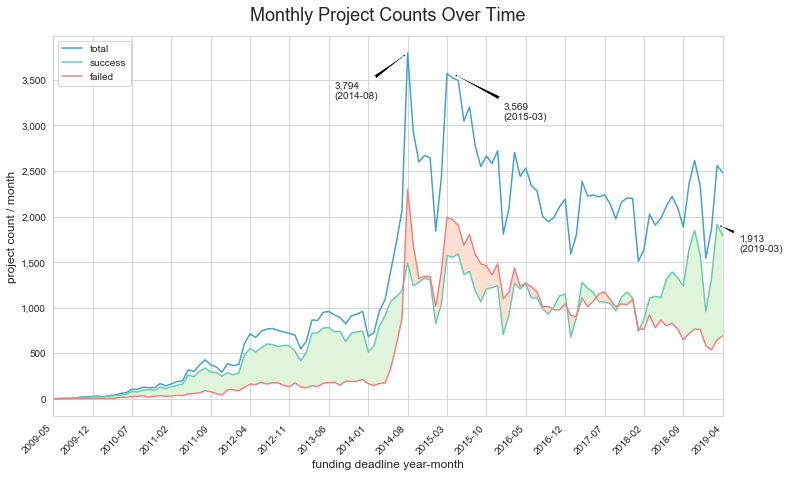

In [84]:
# settings
plt.figure(figsize=[12,7])

# plot monthly counts of projects of completed projects by month over time
for i, col in enumerate(df_project_counts.columns[:-1]):
    ax = df_project_counts[col].plot(color=status_colors[i])

# annotate peaks
ymax_1  = max(df_project_counts.total)
xmax_1 = str(df_project_counts[df_project_counts.total == ymax_1].date.values[0])[:7]
ax.annotate(format_num(ymax_1) + "\n(" + str(xmax_1) + ")", xy=(63, ymax_1), 
            xytext=(50, ymax_1-500),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ymax_2  = df_project_counts.total.sort_values().values[-2]
xmax_2 = str(df_project_counts[df_project_counts.total == ymax_2].date.values[0])[:7]
ax.annotate(format_num(ymax_2) + "\n(" + str(xmax_2) +")", xy=(71, ymax_2), 
            xytext=(80, ymax_2-500),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ymax_3  = max(df_project_counts.success)
xmax_3 = str(df_project_counts[df_project_counts.success == ymax_3].date.values[0])[:7]
ax.annotate(format_num(ymax_3) + "\n(" + str(xmax_3)+")", xy=(118, ymax_3), 
            xytext=(122, ymax_3-300),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))


# highlight differences
ax.fill_between(np.arange(0,120), df_project_counts.success, df_project_counts.failed , 
                where=df_project_counts.failed >= df_project_counts.success, 
                facecolor=fill_red, interpolate=True)
ax.fill_between(np.arange(0,120), df_project_counts.success, df_project_counts.failed, 
                where=df_project_counts.success >= df_project_counts.failed, 
                facecolor=fill_green, interpolate=True)

# # labels and titles
plt.title("Monthly Project Counts Over Time", fontsize=18, pad=15)

ylabels = ['{:,.0f}'.format(ytick) for ytick in ax.get_yticks()]
ax.set_yticklabels(ylabels)
plt.ylabel('project count / month', fontsize=12)

timeline_ticks(df_project_counts)
plt.xlabel('funding deadline year-month', fontsize=12)

plt.legend(loc=2)
plt.show()

The blue line of the plot depicts the sum of new fundings that finished every months projects. 

During the first 4 years, funding activities on the Kickstarter increased at a slow but steady rate. By the beginning of 2014, Kickstarter's performance exploded. Within a few months the number of campaigns skyrocketed and reached an all time high. {{format_num(ymax_1)}} projects terminated in August 2014. In the following months project counts decreased, before Kickstarter experienced a second boom in March/April. In the following months and years project counts settled. Nevertheless, with roughly 2k new projects each month, activities remained on a high level up until today. Since 2018, the number of campaigns ending each month has been increasing notably.

Over the entire time, there have been remarkable cyclic activity setbacks. I suppose the season or time of year may be one explanation. I'm going to explore this topic later as it may be one factor contributing to the success of a campaign.  

If we turn our attention to the green and red lines of failed and successful projects, we notice an interesting pattern. Until the hype in August 2014, there have always been more successful than failed projects, growing at a stronger rate.  

When Kickstarter became popular, the number of failed ventures suddenly peaked and exceeded successful projects. Only by the end of 2016 the number of successful and failed projects started to be more balanced.  

Finally, by the beginning of 2018, Kickstarter turned monthly successful and failed project counts upside down. Ever since, campaigns ending in success have become more likely while flops have been declining notably. 2018 was a highly successful year for creators: {{round(len(ks_compl_success[ks_compl_success.deadline.dt.year == 2018]) / len(ks_compl[ks_compl.deadline.dt.year == 2018])* 100, 2)}}% of campaigns celebrated successful funding. Actually, the highest number of successful campaigns ever was recorded only recently, in March 2019.  

To fully understand, Kickstarter's lifecycle, let's plot monthly growth rates.   

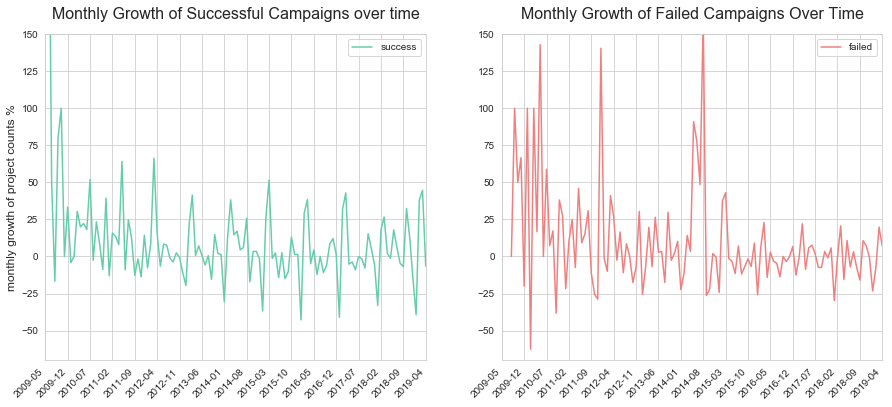

In [85]:
# settings
plt.figure(figsize=[15,6])
    
# calculate monthly growth rates of successful and black projects
success_r = df_project_counts['success'].pct_change()*100
failure_r = df_project_counts['failed'].pct_change()*100

# # left plot: monthly growth successful campaigns
plt.subplot(1,2,1)
ax = success_r.plot(color=cust_green)
plt.ylim(-70, 150) # limit yaxis to remove initial fluctuation
plt.legend()

# labels and titles
plt.title("Monthly Growth of Successful Campaigns over time", fontsize=16, pad=15)
plt.ylabel('monthly growth of project counts %', fontsize=12)
timeline_ticks(df_project_counts)

plt.subplot(1,2,2)
ax = failure_r.plot(color=cust_red)   
plt.ylim(-70, 150) # limit yaxis to remove initial fluctuation

plt.title("Monthly Growth of Failed Campaigns Over Time", fontsize=16, pad=15)
plt.ylabel('')
timeline_ticks(df_project_counts)

plt.legend()
plt.show()

The above plots depict monthly growth rates of successful and failed campaigns. Before Kickstarter's hype started, growth rates show strong, but irregular amplitudes, especially in failed campaigns. The relative growth declined slightly until the hype year 2014. The growth of failed campaigns skyrocketed in August, whereas the increased popularity hardly impacted successful campaigns. 

The growth of successful campaigns has been following a relatively regular 'heartbeat' since 2010. Successful campaigns were clearly subject to seasonal fluctuations.  

Finally, by the beginning of 2018, we notice slightly increasing growth rates in successful campaigns. In contrast, failed campaigns were less affected by seasons. The growth rates of failed campaigns were relatively constant since mid 2015. 

While increased competition certainly impacted the hype year 2014, we cannot confirm that due to more competition today, there is less of a chance to win a campaign. On the contrary, chances to succeed have never been better.

Generally, the effects of competition impact failed campaigns stronger than successful campaigns. In fact, despite increasing project counts since 2018, the number of successful campaigns have also been increasing. 

**Did funding goals decrease, now that crowdfunding has become mainstream?**  

As we found that creators have higher chances nowadays, detractors may argue that there was a trade-off between the amount of funding raised and success rates. After all, to spread the total financial capacity on additional campaigns, may result in less funding for an individual creator.   

Thus, I'm going to plot the monthly median goals of completed projects on a timeline. In order to avoid extreme values distorting the plot, I'm going to use the 95% quantile data frame. Adding a second plot with separate curves of successful and failed campaigns will help to answer the question, if creators may have sought for lower goals in exchange for increased chances of success.  

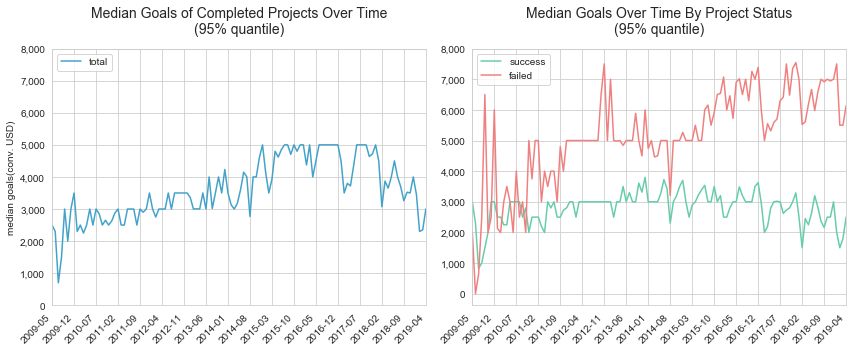

In [86]:
# settings
plt.figure(figsize=[12,5])

# calculate monthly median goals of completed projects of 95 quantile data frame
# total
goals_grouped = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                                    ks_compl_95.deadline.dt.month]).median()['goal_hist_usd'].values
# success
goals_grouped_s = ks_success_95.groupby([ks_success_95.deadline.dt.year, 
                                    ks_success_95.deadline.dt.month]).median()['goal_hist_usd'].values
# failed
ks_compl_95_f = ks_compl_95[ks_compl_95.status == 'failed']
goals_grouped_f= ks_compl_95_f.groupby([ks_compl_95_f.deadline.dt.year, 
                                    ks_compl_95_f.deadline.dt.month]).median()['goal_hist_usd'].values
# insert 0 occurence for 2009-6
goals_grouped_f = np.insert(goals_grouped_f,1,0) 

# create dataframe
df_goals = pd.DataFrame(data={'total':goals_grouped, 
                              'success':goals_grouped_s, 
                              'failed': goals_grouped_f, 
                              'date': dates})

# left plot: line plot of monthly median goals of all completed projects
plt.subplot(1,2,1)
ax = df_goals.total.plot(color=cust_blue);

# ticks and labels
plt.xlabel("")
timeline_ticks(goals_grouped)
plt.tight_layout()
format_yticks(8000,1000)
plt.ylabel("median goals(conv. USD)")
plt.title("Median Goals of Completed Projects Over Time\n(95% quantile)", fontsize=14, pad=15)
plt.legend(loc=2)

# right plot: line plot of monthly median goals of successful anf failed projects
plt.subplot(1,2,2)
ax = df_goals.success.plot(color=cust_green);
ax = df_goals.failed.plot(color=cust_red);

# ticks and labels
plt.xlabel("")
timeline_ticks(goals_grouped)
format_yticks(8000, 1000)
plt.ylabel("")
plt.title("Median Goals Over Time By Project Status\n(95% quantile)", fontsize=14, pad=15)
plt.tight_layout()
plt.legend()

plt.show()

The course of the line plots reminds me of a second degree polynomial curve. I find the seasonal fluctuations make the plot difficult to read. To draw a clearer picture, I will try a scatterplot approach and fit a polynomial regression trend line. 

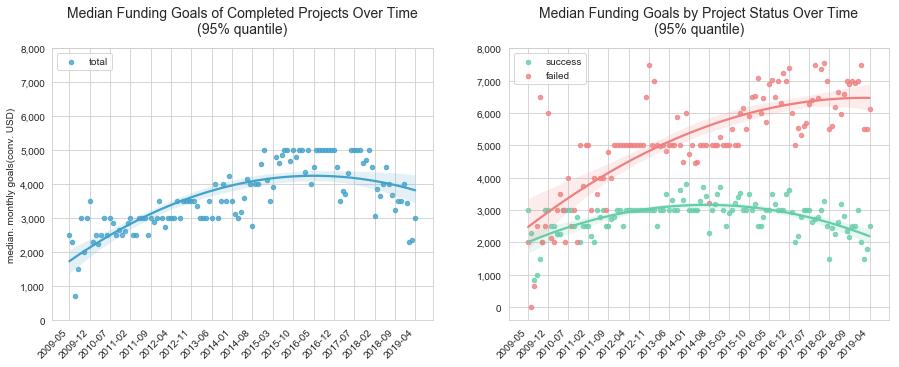

In [87]:
# scatterplots of monthly means and fit a polynomial regression of 2nd degree

# settings
plt.figure(figsize=[15,5])

# we got 120 months, so we chuck our x axis into 120 ticks
df_goals['date'] = np.arange(0, len(goals_grouped), 1)

# left plot: median goals of all completed projects
plt.subplot(1,2,1)
ax = sns.regplot(x=df_goals['date'].values, y=df_goals['total'], 
                 color=cust_blue,
                 scatter_kws={"s": 20},
                 order=2, ci=95, truncate=True, label="total");

timeline_ticks(df_goals)
format_yticks(8000, 1000)
plt.ylabel("median. monthly goals(conv. USD)")
plt.title("Median Funding Goals of Completed Projects Over Time\n(95% quantile)", fontsize=14, pad=15)
plt.legend(loc=2)

# # right plot: median goals of successful and failed projects
plt.subplot(1,2,2)
ax = sns.regplot(x=df_goals['date'], y=df_goals['success'],
                 color=cust_green,
                 scatter_kws={"s": 20},
                 order=2, ci=95, truncate=True, label="success");
ax = sns.regplot(x=df_goals['date'], y=df_goals['failed'],
                 color=cust_red,
                 scatter_kws={"s": 20},
                 order=2, ci=95, truncate=True, label="failed");

# ticks and labels
timeline_ticks(df_goals)
format_yticks(8000, 1000)
plt.ylabel("")
plt.title("Median Funding Goals by Project Status Over Time\n(95% quantile)", fontsize=14, pad=15)
plt.legend()
plt.show()

In [88]:
df_goals.tail()

total  success             failed  date
115 4,000.0            3,000.0  7,000.0             115 
116 3,453.149999914437 2,000.0  7,500.0             116 
117 2,302.416481366293 1,500.0  5,500.0             117 
118 2,350.0            1,800.0  5,500.0             118 
119 3,000.0            2,500.0  6,135.230000012376  119

In [89]:
# mean goals hype years
print("mean goals 2014-2016: " + str(df_goals[(df_goals.date > 56) & (df_goals.date <= 92)]['success'].mean()))
# mean goals 2018
print("mean goals since 2018: " + str(df_goals[df_goals.date > 101]['success'].mean()))

mean goals 2014-2016: 3109.715939409531
mean goals since 2018: 2443.4323554595567


To find out how funding goals performed over time, I depicted their monthly median values. First, I used a line plot, but found the plot difficult to read because of the strong seasonal fluctuations. Instead, I tried a scatterplot approach and fitted a second degree polynomial regression line to depict the relationship.  

In the early years funding goals were usually chosen around USD 2k - 3k. They gradually increased and peaked in the years 2015-2017. Then, creators usually asked for USD 4k - 5k. 

In the recent two years, goals have been setting back to the levels of earlier years. Project creators indeed tend to seek less optimistic goals.

If we separate projects by their status into successful and failed campaigns, we notice an interesting behavior: successful campaigns generally aim for lower funding goals compared to failed campaigns. Over the course of the years, the gap between successful and failed goals has been developing further apart. Only after 2018, failed project goals stagnated. 

Successful goals have risen modestly during the hype years 2014 to early 2016, generally staying under median goals of USD 3,100. Ever since, successful goals have been declining. Today, the median goal is almost at the level of the early years, close to USD 2.5k. In comparison, failed goals were between USD 6k-7k by April 2019.

In general, the widening of the gap suggests that not only the behavior of project creators who defined funding goals changed over time. I suspect changes in Kickstarter's overall financial capacity. Additionally, the willingness of supporters to pledge may has decreased concurrently. 

To conclude, the hype in 2014 positively impacted the goals. However, with more crowdfunding campaigns running on Kickstarter, we can confirm that successful funding goals have been decreasing.

A perception of a funding's success is not only determined by the success or failure of a campaign. Creators surely value the amount of raised money to start their businesses. Since a campaign does not end when the goal was reached, creators can collect the surplus of pledges until the end of a campaign. So, let's turn our attention to the actual pledged funding amount now.  

**How did the funding capacity develop compared to goals over time?**  

To start with, I'm going to plot the monthly sum of pledges on a 10 year timeline. Again, I'm going to work on the 95% quantile data frame to avoid distortion of pledges and goals. 

In [90]:
# assess monthly sum of fundings 
ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                    ks_compl_95.deadline.dt.month])['pledged_hist_usd'].sum().sort_values()

deadline  deadline
2009      5          3,354.0             
          6          11,566.48           
          8          14,829.470000000001 
          7          22,156.79           
          9          26,072.8            
          10         56,225.549999999996 
          11         85,538.90999999999  
2010      1          99,412.70999999999  
          3          109,432.06000000001 
          2          112,723.91          
2009      12         123,912.96999999999 
2010      4          190,511.56          
          5          208,593.24          
          6          256,623.92          
          11         365,861.37          
          7          382,823.57          
          8          387,223.06999999995 
          9          395,157.98000000004 
2011      1          438,867.57999999996 
2010      10         478,213.6699999999  
2011      2          549,230.9099999999  
          3          615,994.8100000002  
2010      12         635,255.5700000001  
2011      4    

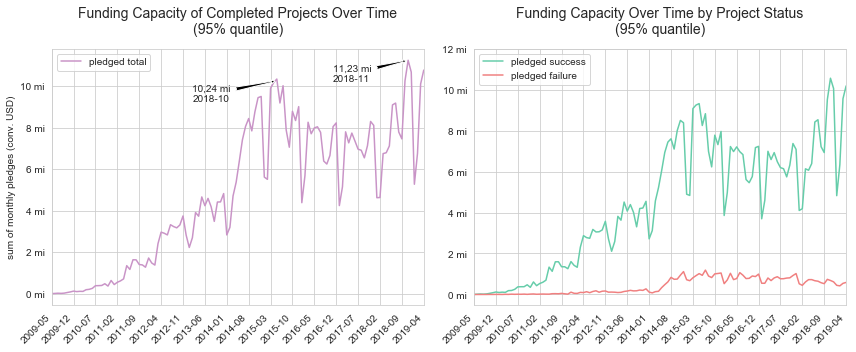

In [91]:
# settings
plt.figure(figsize=[12,5])

# calculate monthly median pledges of completed projects of 95 quantile data frame
# total
pledged_grouped_sum = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                                    ks_compl_95.deadline.dt.month])['pledged_hist_usd'].sum().values
# success
pledged_grouped_sum_s = ks_success_95.groupby([ks_success_95.deadline.dt.year, 
                                    ks_success_95.deadline.dt.month])['pledged_hist_usd'].sum().values
# failed
pledged_grouped_sum_f= ks_fail_95.groupby([ks_fail_95.deadline.dt.year, 
                                    ks_fail_95.deadline.dt.month])['pledged_hist_usd'].sum().values
# insert 0 occurence for 2009-6
pledged_grouped_sum_f = np.insert(pledged_grouped_sum_f,1,0) 

# create dataframe
df_pledged_sum = pd.DataFrame(data={'total':pledged_grouped_sum, 
                                'success':pledged_grouped_sum_s, 
                                'failed': pledged_grouped_sum_f, 
                                'date': dates})

# left plot: line plot of monthly median pledges of all completed projects
plt.subplot(1,2,1)
ax = df_pledged_sum.total.plot(color=pledged_color, label='pledged total');

# annotate peaks
ymax_1  = max(pledged_grouped_sum)
xmax_1 = str( df_pledged_sum[df_pledged_sum.total == ymax_1].date.values[0])[:7]
ax.annotate(format_num(ymax_1)[:5] + " mi" + "\n" + str(xmax_1), xy=(114, ymax_1), 
            xytext=(90, ymax_1- 1000000),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ymax_2  = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                              ks_compl_95.deadline.dt.month])['pledged_hist_usd']\
                              .sum().sort_values().values[-5]
xmax_2 = str(df_pledged_sum[df_pledged_sum.total == ymax_2].date.values[0])[:7]
ax.annotate(format_num(ymax_2)[:5] + " mi" + "\n" + str(xmax_2), xy=(72, ymax_2), 
            xytext=(45, ymax_2- 1000000),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
plt.xlabel("")
timeline_ticks(df_pledged_sum)

# improve readability of y ticks
ylabels = ['{:,.0f}'.format(ytick) + ' mi' for ytick in ax.get_yticks() / 1000000]
ax.set_yticklabels(ylabels)
plt.ylabel("sum of monthly pledges (conv. USD)")
plt.title("Funding Capacity of Completed Projects Over Time\n(95% quantile)", fontsize=14, pad=15)
plt.legend(loc=2)

# right plot: line plot of monthly median pledges of successful anf failed projects
plt.subplot(1,2,2)
ax = df_pledged_sum.success.plot(color=cust_green, label="pledged success");
ax = df_pledged_sum.failed.plot(color=cust_red, label="pledged failure");

# ticks and labels
plt.xlabel("")
timeline_ticks(df_pledged_sum)
plt.yticks(np.arange(0, 12000000+1, 2000000))
ylabels = ['{:,.0f}'.format(ytick) + ' mi' for ytick in ax.get_yticks() / 1000000]
ax.set_yticklabels(ylabels)
plt.ylabel("")
plt.title("Funding Capacity Over Time by Project Status\n(95% quantile)", fontsize=14, pad=15)
plt.tight_layout()
plt.legend()
plt.show()

In the beginning years, the monthly collected financial backing increased at a steady rate from zero to plus USD 4mi. By the beginning of 2014 the funding capacity peaked sharply. We recorded the 5th highest funding capacity of USD {{format_num(ymax_2)}} in {{xmax_2}}. From 2015 - 2017 the total investment capacity fell into a recession. However, by late 2017 pledges started to recover. Ultimately, 2018 was the year with the highest recorded funding capacity. In November, there was a record of USD {{format_num(ymax_1)}} financial backing available for all projects. 

On the right side, I divided the pledged funding into two plots: one for successful and one for failed projects. The curve of successful campaigns is remarkably similar to the plot of the total funding capacity on the left. Considering this, it doesn't surprise that the red curve of failed pledges remained on a low level across the entire 10 years of recording. By the beginning of 2015 "lost" pledges started to rise a little bit to roughly 1 mi. They have been decreasing slowly since 2016. 
Apparently, the amount of "lost" investments has never been a significant problem. The overwhelming majority of funding flowed into successful campaigns.

It suggests that there is usually no close race towards reaching a funding goal. There doesn't seem to be much ambiguity to whether a campaign appeals to the supporter audience, nor whether it will end in success or failure. 

The above plots should tune creators more optimistic to run a campaign nowadays. In Kickstarter's history, there has never been more funding available. At the same time, success rates in 2018 were on an all time high. If we compare this plot of the funding capacity to the development of goals, the behavior is contradicting. 

When goals peaked during the years 2015 - 2017, the pledged funding and the success rates were in a recession. 2018 was a record year of the total available funding, yet goals have been decreasing. It seems like goals were overrated during 2015 to 2017. As for today's declining goals despite the growing funding capacity, higher competition could explain it. So, let's include project counts into our analysis and plot pledges and goals relative to project counts. 
In the case of a continuous ratio between funding and projects, we'd expect a horizontal line. In the case of increased competition negatively affecting projects, we'd expect a declining line. 

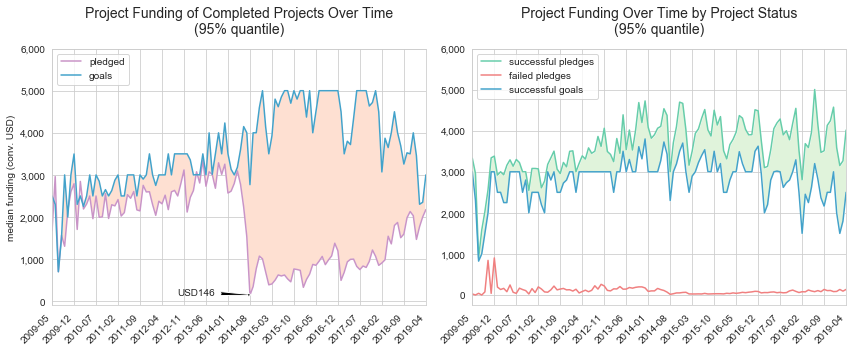

In [92]:
# settings
plt.figure(figsize=[12,5])

# calculate monthly median pledges of completed projects of 95 quantile data frame
# total
pledged_median = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                                    ks_compl_95.deadline.dt.month]).median()['pledged_hist_usd'].values
# success
pledged_median_s = ks_success_95.groupby([ks_success_95.deadline.dt.year, 
                                    ks_success_95.deadline.dt.month]).median()['pledged_hist_usd'].values
# failed
pledged_median_f= ks_fail_95.groupby([ks_fail_95.deadline.dt.year, 
                                    ks_fail_95.deadline.dt.month]).median()['pledged_hist_usd'].values
# insert 0 occurence for 2009-6
pledged_median_f = np.insert(pledged_median_f,1,0) 

# create dataframe
df_pledged_median = pd.DataFrame(data={'total':pledged_median, 
                                'success':pledged_median_s, 
                                'failed': pledged_median_f, 
                                'date': dates})

# # left plot: line plot of monthly median pledges of all completed projects
plt.subplot(1,2,1)
ax = df_pledged_median.total.plot(color=pledged_color, label='pledged');
ax = df_goals.total.plot(color=cust_blue, label='goals');

# highlight negative differences
ax.fill_between(np.arange(0,120), pledged_median, df_goals.total , 
                where=df_goals.total >= pledged_median, 
                facecolor=fill_red, interpolate=True)

# annotate minima
ymin  = min(pledged_median)
xmin = str(df_pledged_median[df_pledged_median.total == ymin].date.values[0])[:7]
ax.annotate("USD" + format_num(ymin), xy=(64, ymin), 
            xytext=(40, ymin),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
plt.xlabel("")
timeline_ticks(pledged_median)
plt.tight_layout()
format_yticks(6000,1000)
plt.ylabel("median funding (conv. USD)")
plt.title("Project Funding of Completed Projects Over Time\n(95% quantile)", fontsize=14, pad=15)
plt.legend(loc=2)

# right plot: line plots of monthly median pledged of successful anf failed projects
plt.subplot(1,2,2)
ax = df_pledged_median.success.plot(color=cust_green, label="successful pledges");
ax = df_pledged_median.failed.plot(color=cust_red, label="failed pledges");
# add goals successfull achieved to compare
ax = df_goals.success.plot(color=cust_blue, label='successful goals');

# highlight overhead
ax.fill_between(np.arange(0,120), df_pledged_median.success, 
                df_goals.success , where=df_pledged_median.success >= df_goals.success, 
                facecolor=fill_green, interpolate=True)

# ticks and labels
plt.xlabel("")
timeline_ticks(pledged_median)
format_yticks(6000,1000)
# plt.yticks(np.arange(0, 6000+1, 1000))
plt.ylabel("")
plt.title("Project Funding Over Time by Project Status\n(95% quantile)", fontsize=14, pad=15)
plt.tight_layout()
plt.legend()
plt.show()

Let's turn our attention first to the left plot. This time, I depicted the relative median pledges per project and added the development of median goals to compare how pledges pledges compared to median goals. Over a period of 10 years, there has always been a little negative gap between the median goals and the median funding pledged. 

Most obviously, the relative funding per project dropped dramatically by mid 2014. From more than USD 3k by the end of 2013, the median pledges decreased to only USD 146 in August 2014. This event fell into the same time when the number of projects on Kickstarter exploded and the platform experienced a significant boost in funding capacity. This proof for a disproportionate growth of campaigns activities and investments. The number of creators and campaigns grew faster than the count of backers actively supporting projects. In the light of this, competition likely was a main driver for increased failure rates and lower average funding in 2014. 

Since Kickstarter's hype year 2014, the funding overhead remained. The good news is: since 2018 it has been recovering. On Kickstarter anniversary, the overhead between the available funding capacity and goals converged to the level of before 2014.

Comparing the purple line on the left to the green line on the right changes our perspective. The course of successful pledges draws a comparably horizontal line. Ignoring the seasonal fluctuations, since mid 2013, the successfully collected funding has been relatively stable at a median of USD 4k per project.

In the hype year, successful projects actually raised higher average investments. In contrast, the relative funding capacity of all projects went through the floor. In spite of this, creators of successful campaigns did not have to fear losses in funding opportunities due to higher competition. I suspect the backers audience to have a univocal taste for specific campaign characteristics when they take the decision to invest. The additional campaigns may have not been appealing to the audience, were not fitting crowdfunding as an investment strategy or were generally of low quality. 

The green area under the right plot depicts the surplus of pledges exceeding successful goals. On average, creators have been able to raise more than they had asked for once the campaign was successful. Since 2017 the positive gap of pledges has been widening, in spite of declining goals. 

In the year 2014 USD {{format_num(ks_compl_success[ks_compl_success.deadline.dt.year == 2014]['pledged_hist_usd'].sum())}} was collected successfully. The amount doubled in 2018, when Kickstarter was able to distribute USD {{format_num(ks_compl_success[ks_compl_success.deadline.dt.year == 2018]['pledged_hist_usd'].sum())}} to successful campaigns. In the light of this, since 2018 campaign creators benefited from Kickstarter's popularity because of the increasing funding capacity. 

Can we attribute the increased funding capacity to an increased backers audience or do supporters just pledge higher amounts of money? In the first case, creators would likely need to put up higher efforts into their campaign's success to convince a higher number of backers.

**Do creators have to convince more backers to successfully finish a campaign today?**   

To start with, let's plot the absolute numbers of backers participating in a campaign on a timeline.

In [93]:
# assess backers counts monthly over 10 years
ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                    ks_compl_95.deadline.dt.month])['backers_count']\
                    .sum().sort_values()

deadline  deadline
2009      5           111   
          7           181   
          6           268   
          9           442   
          8           597   
          10          1008  
2010      2           1417  
          1           1425  
2009      11          1441  
2010      3           1543  
2009      12          2102  
2010      4           2752  
          5           2899  
          6           3831  
          11          5613  
          7           5703  
          9           5935  
          8           6030  
2011      1           6469  
2010      10          6565  
          12          8752  
2011      2           8927  
          3           8927  
          4           10222 
          6           15381 
          11          17346 
          9           17417 
          10          17895 
          5           18621 
2012      1           19974 
2011      7           20027 
2012      2           20223 
2011      8           22422 
          12          22

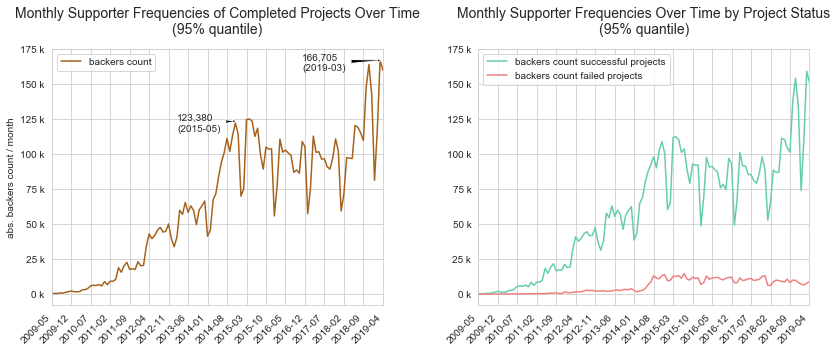

In [94]:
# settings
plt.figure(figsize=[12,5])

# calculate monthly sum of backers counts of 95 quantile data frame
# total
backers_grouped_sum = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                                    ks_compl_95.deadline.dt.month])['backers_count'].sum().values
# success
backers_grouped_sum_s = ks_success_95.groupby([ks_success_95.deadline.dt.year, 
                                    ks_success_95.deadline.dt.month])['backers_count'].sum().values
# failed
backers_grouped_sum_f= ks_fail_95.groupby([ks_fail_95.deadline.dt.year, 
                                    ks_fail_95.deadline.dt.month])['backers_count'].sum().values
# insert 0 occurence for 2009-6
backers_grouped_sum_f = np.insert(backers_grouped_sum_f,1,0) 

# create dataframe
df_backers_sum = pd.DataFrame(data={'total':backers_grouped_sum, 
                                'success':backers_grouped_sum_s, 
                                'failed': backers_grouped_sum_f, 
                                'date': dates})

# left plot: line plot of backers counts of all completed projects
plt.subplot(1,2,1)
ax = df_backers_sum.total.plot(color=backers_color, label='backers count');

# annotate peaks
# all time max
ymax_1  = max(backers_grouped_sum)
xmax_1 = str( df_backers_sum[df_backers_sum.total == ymax_1].date.values[0])[:7]
ax.annotate(format_num(ymax_1)+ "\n(" + str(xmax_1)+")", xy=(119, ymax_1), 
            xytext=(90, ymax_1-7000),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# first peak ever in 11/2014
ymax_2  = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                              ks_compl_95.deadline.dt.month])['backers_count']\
                              .sum().sort_values().values[-8]
xmax_2 = str(df_backers_sum[df_backers_sum.total == ymax_2].date.values[0])[:7]
ax.annotate(format_num(ymax_2)  + "\n(" + str(xmax_2) +")", xy=(67, ymax_2), 
            xytext=(45, ymax_2-7000),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
plt.xlabel("")
timeline_ticks(df_backers_sum)

# improve readability of y ticks
ylabels = ['{:,.0f}'.format(ytick) + ' k' for ytick in ax.get_yticks() / 1000]
ax.set_yticklabels(ylabels)
plt.ylabel("abs. backers count / month")
plt.title("Monthly Supporter Frequencies of Completed Projects Over Time\n(95% quantile)", fontsize=14, pad=15)
plt.legend(loc=2)

# right plot: line plots of backers counts of successful anf failed projects
plt.subplot(1,2,2)
ax = df_backers_sum.success.plot(color=cust_green, label="backers count successful projects");
ax = df_backers_sum.failed.plot(color=cust_red, label="backers count failed projects");

# ticks and labels
plt.xlabel("")
timeline_ticks(df_backers_sum)
plt.yticks(np.arange(0, 175000+1, 25000))
ylabels = ['{:,.0f}'.format(ytick) + ' k' for ytick in ax.get_yticks() / 1000]
ax.set_yticklabels(ylabels)
plt.ylabel("")
plt.title("Monthly Supporter Frequencies Over Time by Project Status\n(95% quantile)", fontsize=14, pad=15)
plt.tight_layout()
plt.legend()
plt.show()

The course of monthly absolute backers counts over time reminds of the monthly aggregated sum of pledges. The number of supporters grew at a steady rate. Then, in 2014, exploded, peaking at {{format_num(ymax_2)}} supporters in {{xmax_2}}. One year earlier there were only 68,125 backers offering financial funding, meaning the number of backers doubled within a year. 

Late 2015 to 2017, backers counts relapsed, yet remained above 100k monthly backers in peak times. Since 2018 the growth of backers counts has been recovering, counting record after record. Ultimately, in March 2019, the month before Kickstarter's anniversary, the highest number of financial supporters ever was recorded: {{format_num(ymax_1)}}. 

Like project counts, goals and pledges, the number of active supporters is subject to heavy cyclic recessions. 

Visualizing backers counts of successful projects only (green line, right plot), primarily mirrors the total amount of active supporters from the plot on the left. And again, considering the low red line, supporters betting on the wrong horse seem to be a minority. According to these plots Kickstarter continuously attracted more project supporters or encouraged investors to pledge for multiple projects. This counts towards Kickstarter becoming more valuable for creators over the years.   

The increasing number of backers is likely the explanation for stable funding capacity over time. To prove this, I am going to depict the ratio of backers to creators. 

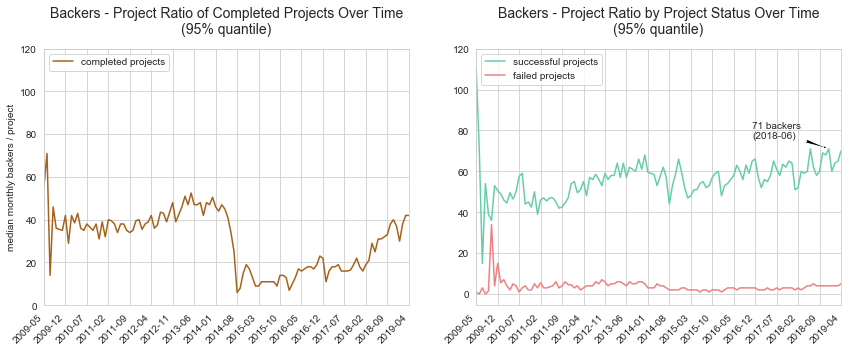

In [95]:
# settings
plt.figure(figsize=[12,5])

# calculate monthly median of backers counts of 95 quantile data frame
# total
backers_grouped_r = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                                    ks_compl_95.deadline.dt.month])['backers_count'].median().values
# success
backers_grouped_s_r = ks_success_95.groupby([ks_success_95.deadline.dt.year, 
                                    ks_success_95.deadline.dt.month])['backers_count'].median().values
# failed
backers_grouped_f_r= ks_fail_95.groupby([ks_fail_95.deadline.dt.year, 
                                    ks_fail_95.deadline.dt.month])['backers_count'].median().values
# insert 0 occurence for 2009-6
backers_grouped_f_r = np.insert(backers_grouped_f_r,1,0) 

# create dataframe
df_backers_r = pd.DataFrame(data={'total':backers_grouped_r, 
                                'success':backers_grouped_s_r, 
                                'failed': backers_grouped_f_r, 
                                'date': dates})

# left plot: line plot of median backers by completed projects
plt.subplot(1,2,1)
ax = df_backers_r.total.plot(color=backers_color, label='completed projects');

# ticks and labels
plt.xlabel("")
timeline_ticks(df_backers_r)
plt.yticks(np.arange(0, 121, 20))

plt.ylabel("median monthly backers / project")
plt.title("Backers - Project Ratio of Completed Projects Over Time\n(95% quantile)", fontsize=14, pad=15)
plt.legend(loc=2)

# right plot: line plots of avg backers by successful or failed project
plt.subplot(1,2,2)
ax = df_backers_r.success.plot(color=cust_green, label="successful projects");
ax = df_backers_r.failed.plot(color=cust_red, label="failed projects");

# annotate recent maximum
ymax_1  = df_backers_r.success.sort_values().values[-3]
xmax_1 = str(df_backers_r[df_backers_r.success == ymax_1].date.values[1])[:7]
ax.annotate(format_num(ymax_1)+ " backers\n(" + str(xmax_1)+")", xy=(115, ymax_1), 
            xytext=(90, ymax_1+5),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
plt.xlabel("")
timeline_ticks(df_backers_r)
plt.yticks(np.arange(0, 121, 20))
plt.ylabel("")
plt.title("Backers - Project Ratio by Project Status Over Time\n(95% quantile)", fontsize=14, pad=15)
plt.tight_layout()
plt.legend(loc=2)
plt.show()

The average number of backers per project over time explains the phenomenon of the overall stable rates of success and funding as well as the recent increase in pledged funding. Note that the average number of backers per successful project has been increasing over time (right plot, green line). In October 2018, there was a record of a median of 72 backers supporting each project. Therefore, we can conclude that the increasing number of active supporters compensated for increased competition among creators.

In the plot on the left, the sharp drop of backers of completed projects in August 2014 doesn't come with a surprise. Apparently, the number of campaigns grew faster than the audience of backers. Ever since, the average number of supporters almost doubled and is now almost on the same level as before the hype.
At the same time, it is puzzling that the dent and the remarkable growth of is hardly notable in successful campaigns. It seems like supporters have been investing mostly in successful campaigns. 

Compared to the crash of relative investments, the anomaly of a decreased backers/project ratio in August 2014 seems to be more discreet. Thus, we got to ask, how did the financial funding overhead in August 2014 came to be? One assumption is that users were hesitant to invest and contributed with rather small pledges. To prove my hypothesis, I'm going to depict the relative amount each supporter pledged.

In [96]:
# add the average amount pledged per supporter to each campaign
for df in [ks_compl_95, ks_success_95, ks_fail_95]:
    df['pledged_rate'] = (df['pledged_hist_usd'] / df['backers_count']).fillna(0)

# assess the average amount pledged per user / project each month.
ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                    ks_compl_95.deadline.dt.month])['pledged_rate']\
                    .mean().sort_values()

deadline  deadline
2009      8          25.592927606219806
          5          27.631818181818183
2014      8          47.887541856760926
2009      9          49.534867846568616
          6          54.81850706311233 
2010      8          55.41239695789137 
2015      3          55.627832306769946
          2          56.00643667444149 
2014      9          56.78907692437308 
2016      1          58.042252844780045
          3          58.779006098627995
2019      2          58.84227589734179 
2010      11         59.07579121996007 
2018      2          59.49935832517218 
2016      5          59.51383840128036 
          2          59.65464841171469 
2014      10         59.65730860658391 
2019      3          59.72928685348439 
2016      4          59.94800099379007 
2019      1          60.056002313474444
2015      8          60.257674374904056
          9          61.10286949307058 
2009      12         61.46945291190793 
2015      4          61.86616882419452 
2017      9          

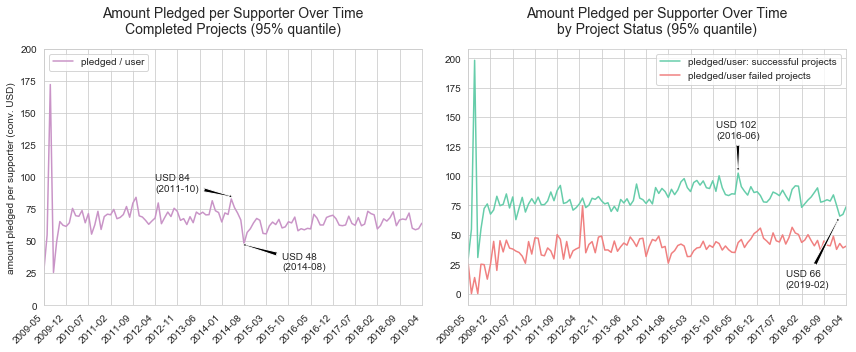

In [97]:
# settings
plt.figure(figsize=[12,5])

# calculate monthly median pledged rte of completed projects of 95 quantile data frame
# total
pledged_rate_grouped = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                                    ks_compl_95.deadline.dt.month])['pledged_rate'].mean().values
# success
pledged_rate_grouped_s = ks_success_95.groupby([ks_success_95.deadline.dt.year, 
                                    ks_success_95.deadline.dt.month])['pledged_rate'].mean().values
# failed
pledged_rate_grouped_f= ks_fail_95.groupby([ks_fail_95.deadline.dt.year, 
                                    ks_fail_95.deadline.dt.month])['pledged_rate'].mean().values
# insert 0 occurence for 2009-6
pledged_rate_grouped_f = np.insert(pledged_rate_grouped_f,1,0) 

# create dataframe
df_pledged_rate = pd.DataFrame(data={'total': pledged_rate_grouped, 
                                'success': pledged_rate_grouped_s, 
                                'failed': pledged_rate_grouped_f, 
                                'date': dates})

# # left plot: line plot of monthly relative pledges for all completed projects
plt.subplot(1,2,1)
ax = df_pledged_rate.total.plot(color=pledged_color, label='pledged / user');

# annotate peaks
# peak in 4/2014
ymax_1  = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                              ks_compl_95.deadline.dt.month])['pledged_rate']\
                              .mean().sort_values().values[-2]
xmax_1 = str(df_pledged_rate[df_pledged_rate.total == ymax_1].date.values[0])[:7]
ax.annotate("USD " + format_num(ymax_1)  + "\n(" + str(xmax_1) +")", xy=(60, ymax_1), 
            xytext=(35, ymax_1+5),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# low in 08/2014
ymin = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                            ks_compl_95.deadline.dt.month])['pledged_rate']\
                            .mean().sort_values().values[2]
xmin = str(df_pledged_rate[df_pledged_rate.total == ymin].date.values[0])[:7]
ax.annotate("USD " + format_num(ymin)  + "\n(" + str(xmin) +")", xy=(62, ymin), 
            xytext=(75, ymin-20),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
plt.xlabel("")
timeline_ticks(df_pledged_rate)

# improve readability of y ticks
plt.yticks(np.arange(0, 201, 25))
plt.ylabel("amount pledged per supporter (conv. USD)")
plt.title("Amount Pledged per Supporter Over Time\nCompleted Projects (95% quantile)", fontsize=14, pad=15)
plt.legend(loc=2)

# right plot: line plot of onthly relative pledges, divided into successful anf failed projects
plt.subplot(1,2,2)
ax = df_pledged_rate.success.plot(color=cust_green, label="pledged/user: successful projects");
ax = df_pledged_rate.failed.plot(color=cust_red, label="pledged/user failed projects");

# annotate peaks
# peak in 6/2016
ymax_3  = ks_success_95.groupby([ks_success_95.deadline.dt.year, 
                              ks_success_95.deadline.dt.month])['pledged_rate']\
                              .mean().sort_values().values[-2]
xmax_3 = str(df_pledged_rate[df_pledged_rate.success == ymax_3].date.values[0])[:7]
ax.annotate("USD " + format_num(ymax_3)  + "\n(" + str(xmax_3) +")", xy=(85, ymax_3), 
            xytext=(78, ymax_3+30),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# low in 08/2014
ymin_2 = ks_success_95.groupby([ks_success_95.deadline.dt.year, 
                              ks_success_95.deadline.dt.month])['pledged_rate']\
                              .mean().sort_values().values[5]
xmin_2 = str(df_pledged_rate[df_pledged_rate.success == ymin_2].date.values[0])[:7]
ax.annotate("USD " + format_num(ymin_2)  + "\n(" + str(xmin_2) +")", xy=(117, ymin_2), 
            xytext=(100, ymin_2-60),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
plt.xlabel("")
timeline_ticks(df_pledged_rate)
plt.ylabel("")
plt.yticks(np.arange(0, 201, 25))
plt.title("Amount Pledged per Supporter Over Time\nby Project Status (95% quantile)", fontsize=14, pad=15)
plt.tight_layout()
plt.legend()
plt.show()

The mean pledges by supporter were comparatively constant over the past 10 years. It roughly varied around a mean of USD {{format_num(df_pledged_rate.total.mean())}} per backer.

The relative investment spent on projects dropped from an all time high in April 2014 to an all time low in August 2014. The rate recovered in the following years but was a little lower compared to the initial years. 

For campaigns ending in success, creators were able to expect on average USD {{format_num(df_pledged_rate.success.mean())}} per supporter.

Turning our attention to the plot on the right reveals that the drop in relative pledges per project did not affect successful projects. On the contrary: users were willing to spent a little more in between 2015 - 2017 and a little less on failed projects. This may have contributed to balance the investment stability of successful projects during the recession years.

Since late 2018, we observe that the amount pledged per individual has been declining. In order to make up for the loss, creators have to compete for more investors to raise the same amount of funding as in previous years. In 2018, successful projects had to expect on average USD {{format_num(ks_success_95[ks_success_95.deadline.dt.year == 2016]['pledged_rate'].mean() - ks_success_95[ks_success_95.deadline.dt.year == 2018]['pledged_rate'].mean())}} less per backer than in the record year 2016.

The question is whether we can attribute the recent negative development to more competition. On the one hand, we can argue that due to an increased number of projects, supporters tend to diversify their investment across multiple projects or became more risk averse. On the other hand, creators themselves may have chosen lower amounts of fixed incentives to attract a greater number of supporters. Unfortunately, we lack the data to gain a deeper understanding about this question.    

In general, supporters seem to be hesitant to invest in projects that will eventually fail. On average they invested a mean of only USD {{format_num(df_pledged_rate.failed.mean())}}. This may be an indication for supporters being able to determine the value, quality and chances of success of campaigns, in spite of a greater choice of projects on the platform. 

As we will see in my second research topic, Kickstarter as a platform has quite some power over success and failure rates of projects. As a main actor of making crowdfunding mainstream, Kickstarter should have the potential power and tools to drive competition and engagement. Presumably, one of Kickstarter's main objective is to successfully fund as many projects as possible. One of their main tools to support campaigns is by promoting projects on their landing page and on multiple social media channels and by awarding the "Projects We Love" badge. With increasing competition, do creators nowadays have less of a chance to get Kickstarter's support?

**Do creators nowadays have a lower chance to be promoted by Kickstarter?**  

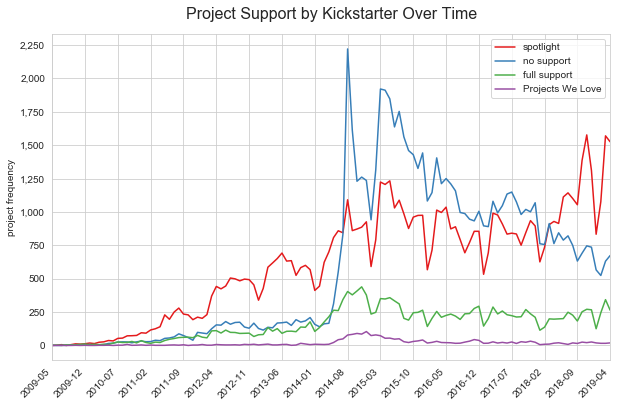

In [98]:
# Visualize how Kickstarter supported projects over time absolute values
fig, ax = plt.subplots(figsize=(10,6))

# create empty dataframe
df_featured = pd.DataFrame(data={'no support': [0.0]*120,
                                'Projects We Love': [0.0]*120, 
                                'spotlight': [0.0]*120, 
                                'full support': [0.0]*120, 
                                'date': dates})

# fill data frame with absolute project counts
for label, df in ks_compl.groupby([ks_compl.featured]):
    # calculate monthly abs. project counts
    counts = ks_compl[ks_compl.featured == label].groupby([ks_compl.deadline.dt.year, 
                                                           ks_compl.deadline.dt.month]).size()
    # the above grouping ignores months with zero counts, so we manually add zero values
    # re-create a new multi-index, this time including all 12 months per year
    levels = [counts.index.levels[0].values, range(1,13)]
    new_index = pd.MultiIndex.from_product(levels, names=['year', 'month'])
    # re-index counts and fill empty values with zero
    counts = counts.reindex(new_index, fill_value=0).values
    # remove months Jan-April 2014 and, May-Dec 2019 
    counts = counts[4:-8]
    # add to dataframe
    df_featured[label] = counts

# plot each featured value on a line 
for label in ks_compl.featured.value_counts().index:
    ax = df_featured[label].plot(color=sns.set_palette(feat_color), label=label);
    
# ticks and labels
timeline_ticks(df_featured)
plt.xlabel("")

format_yticks(2250, 250)
plt.ylabel("project frequency")

plt.title("Project Support by Kickstarter Over Time", fontsize=16, pad=15);
plt.legend()
plt.show();

Investigating the absolute numbers of the support offered by Kickstarter reveals that campaigns only receiving the badge "Projects We Love" has been constantly low, almost irrelevant.

The same is true for projects being fully featured. Except for a modest rise in the hype year 2014, the absolute count of fully supported projects was relatively constantly ranging around 250 each month. Therefore, creators can assume a limited budget of projects being fully supported. 

More interesting is the course of projects being spotlighted or not backed by Kickstarter.
Non-featured projects, depicted by the blue line, were minor in comparison to spotlighted projects until mid 2014. While the number of spotlighted projects was smoothly increasing in May 2009 to early 2015, counts of non-supported projects exploded in August 2018 and reached a second peak in March/April 2015. Ever since, projects that have been denied support have been declining smoothly and reached a surprisingly low number of only {{df_featured['no support'].values[-2]}} in March 2019.

In contrast, spotlighted projects have been growing at a steady rate. There was a dent of stagnation during the recession years late 2015 to 2017. Additionally, especially spotlighted projects have been subject to seasonal fluctuations.

Before concluding about Kickstarter's project support strategy, let's look at the relative numbers of project support. I am  certain, the peak in the hype year, the latest increase in supported projects and the seasonal fluctuations can be partly explained by the number of projects on the platform.

In [99]:
# calculate relative project support by dividing featured project counts by monthly project counts
for label in ks_compl.featured.value_counts().index:
    df_featured[label] = (df_featured[label] / df_project_counts['total'])*100

In [100]:
# assess featured proportions
df_featured

no support    Projects We Love          spotlight  \
0   50.0               0.0                 0.0                  
1   0.0                0.0                 50.0                 
2   14.285714285714285 0.0                 85.71428571428571    
3   16.666666666666664 0.0                 0.0                  
4   18.181818181818183 0.0                 54.54545454545454    
5   9.523809523809524  4.761904761904762   57.14285714285714    
6   21.73913043478261  0.0                 43.47826086956522    
7   10.714285714285714 3.571428571428571   46.42857142857143    
8   25.806451612903224 0.0                 58.06451612903226    
9   11.538461538461538 0.0                 53.84615384615385    
10  13.88888888888889  2.7777777777777777  66.66666666666666    
11  13.953488372093023 2.3255813953488373  62.7906976744186     
12  24.59016393442623  3.278688524590164   60.65573770491803    
13  24.637681159420293 0.0                 49.275362318840585   
14  23.58490566037736  1.8867924528301887  50.0                 
15  25.471698113207548 1.8867924528301887  51.886792452830186   
16  20.155038759689923 6.2015503875969     55.81395348837209    
17  16.129032258064516 0.8064516129032258  58.87096774193549    
18  21.951219512195124 1.6260162601626018  60.97560975609756    
19  19.642857142857142 2.380952380952381   56.547619047619044   
20  19.58041958041958  0.6993006993006993  64.33566433566433    
21  17.682926829268293 1.8292682926829267  70.73170731707317    
22  20.526315789473685 0.5263157894736842  65.78947368421053    
23  18.090452261306535 0.5025125628140703  70.35175879396985    
24  16.5625            0.3125              71.5625              
25  18.6046511627907   0.9966777408637874  65.11627906976744    
26  17.2972972972973   1.0810810810810811  67.56756756756756    
27  20.327102803738317 0.46728971962616817 65.42056074766354    
28  19.733333333333334 1.3333333333333335  62.66666666666667    
29  16.857142857142858 0.0                 65.42857142857143    
30  13.310580204778159 1.023890784982935   65.8703071672355     
31  25.257731958762886 0.7731958762886598  54.63917525773196    
32  25.47945205479452  1.9178082191780823  55.61643835616439    
33  23.28042328042328  0.5291005291005291  61.111111111111114   
34  20.627062706270628 0.33003300330033003 61.05610561056105    
35  21.568627450980394 0.9803921568627451  61.904761904761905   
36  22.551928783382788 0.741839762611276   62.908011869436194   
37  24.09152086137281  0.5383580080753702  59.89232839838493    
38  20.757180156657963 0.5221932114882507  65.92689295039165    
39  22.2509702457956   0.646830530401035   64.55368693402329    
40  23.169107856191744 0.3994673768308922  64.4474034620506     
41  18.80108991825613  1.08991825613079    67.71117166212534    
42  17.916666666666668 0.8333333333333334  68.47222222222223    
43  23.959827833572454 1.291248206599713   65.13629842180775    
44  23.09090909090909  0.7272727272727273  61.63636363636363    
45  18.225039619651348 1.109350237717908   67.67036450079239    
46  15.704387990762125 1.1547344110854503  67.6674364896074     
47  15.33101045296167  0.4645760743321719  71.77700348432056    
48  17.702845100105375 0.42149631190727077 68.59852476290833    
49  17.708333333333336 0.7291666666666666  72.08333333333333    
50  19.001085776330076 0.8686210640608035  68.62106406080348    
51  16.7973124300112   0.11198208286674133 71.10862262038073    
52  23.42233009708738  0.3640776699029126  63.713592233009706   
53  19.188596491228072 1.7543859649122806  63.925438596491226   
54  19.763694951664874 1.1815252416756177  64.4468313641246     
55  21.770833333333332 0.625               59.166666666666664   
56  23.099415204678362 1.3157894736842104  60.23391812865497    
57  19.28374655647383  1.1019283746556474  61.15702479338842    
58  16.735537190082646 0.7231404958677686  64.35950413223141    
59  15.215398716773601 0.8249312557286892  64.25297891842347    
60  22.190611664295876 1.5647226173541962  57.4

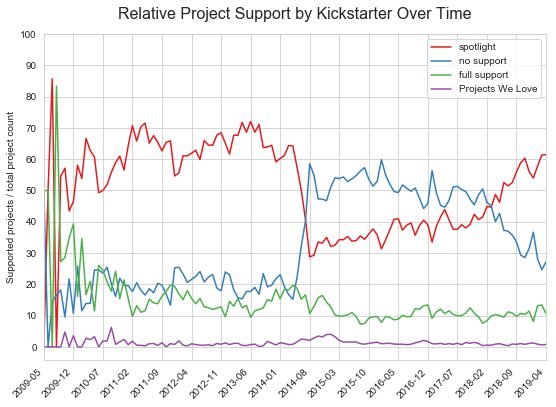

In [101]:
# Visualize how Kickstarter supported projects over time relative values
# settings
plt.figure(figsize=[9,6])

# plot each featured value on a line 
for label in ks_compl.featured.value_counts().index:
    ax = df_featured[label].plot(color=sns.set_palette(feat_color),label=label);
    
# ticks and labels
timeline_ticks(df_featured)
plt.xlabel("")

plt.yticks(np.arange(0, 101, 10))
plt.ylabel("Supported projects / total project count");

plt.title("Relative Project Support by Kickstarter Over Time", fontsize=16, pad=15);
plt.legend()
plt.show();

While campaigns being awarded the "Projects We Love" badge has been remaining constant at low level, fully backed projects have been fluctuating roughly around 10% of all projects since mid 2015.

The proportions of spotlighted and non-supported campaigns have changed significantly. The proportion turned upside down in the hype year 2014. With the rise of competing projects, the number of non-supported project rose from 20% to roughly 55%. At the same time, the proportion of projects being featured on the landing page fell dramatically. In August 2014, the rate dropped prom plus 60% to below 30%. This certainly wasn't the easiest time to succeed with a crowdfunding campaign due to the high number of competing projects and a low backers-projects ratio.

However, the chances of support became more promising. The proportion of spotlighted campaigns have been gradually growing, while projects receiving no backing by Kickstarter have been decreasing. In early 2018, the ratio rolled back. Today, more than 60% of all crowdfundings were spotlighted and only around 27% of campaigns did not gain any support by Kickstarter. As we will see further down, the success chances are much higher once Kickstarter promotes a campaign.  

The increasing development of support is surprising. We know that recently a greater number of creators have been asking for funding. The competition increased, yet the chances of support have not been more promising. Obviously, Kickstarter must have adapted their strategy or website tools to actively spotlight a higher amount of projects. This may be one of the main drivers of increased numbers of successful campaigns.  

### 6.2 Summary:  Is it still worthwhile  financing your project on Kickstarter, now that crowdfunding has become mainstream? <a name="summaryresearch1"></a>

The short answer: yes, chances today are better than ever. In spite of increasing project numbers and therefore higher competition, there have never been more campaigns ending successfully than today. Also, the collected pledges for each successful project have been staying on a relatively stable level.

However, in 2014, crowdfunding campaigns suffered from Kickstarter fast growth. In August 2014, the number of campaigns exploded. With the increase in project counts, we found an abnormal high percentage of projects failing. {{format_num(max(df_project_counts.failed)*100 / df_project_counts[df_project_counts.failed == max(df_project_counts.failed)]['total'].values[0])}}% of campaigns flopped. During 2015 - 2017 project counts were in recession, but remained at a high level. In those times the likelihood to fail minimally exceeded success rates {{format_num(ks_compl_failed[ks_compl_failed.deadline.dt.year.isin([2014, 2015, 2016, 2017])]['project_id'].count() *100 / ks_compl[ks_compl.deadline.dt.year.isin([2014, 2015, 2016, 2017])]['project_id'].count()) }}:{{format_num(ks_compl_success[ks_compl_success.deadline.dt.year.isin([2014, 2015, 2016, 2017])]['project_id'].count() *100 / ks_compl[ks_compl.deadline.dt.year.isin([2014, 2015, 2016, 2017])]['project_id'].count())}}%.

Nevertheless, the overall percentage of successful campaigns have been relatively stable, in 2014 and today. Higher competition on Kickstarter primarily affected those campaigns that eventually failed. 

By the beginning of 2018, Kickstarter turned success and failure rates upside down. Ever since, campaigns ending in success have become more likely, while flops have been declining notably. In 2018, 63% of completed campaigns ended in success. Actually, the highest monthly count of successful campaigns ever recorded was only recently, in March 2019. Chances to win were {{format_num(max(df_project_counts.success)*100 / df_project_counts[df_project_counts.success == max(df_project_counts.success)]['total'].values[0])}}%.

The current trend to collect a higher funding seems as promising. We would expect the recent increase in competing projects, lower funding goals and the tendency to pledge greedier investments to negatively impact campaigns. Yet, the overall financial backing per project has been relatively constant since 2014. On average creators were able to raise a median of USD {{format_num(ks_compl_success['pledged_hist_usd'].median())}} if the campaign ended in success. Fortunately, in 2018, creators were able to expect a median of USD {{format_num(ks_compl_success[ks_compl_success.deadline.dt.year == 2018]['pledged_hist_usd'].median())}}.

We found the backer-project ratio to be the most obvious explanation to balance increased competition. Clearly, in 2014, there was a huge overhead between investment supply and demand caused by a lack of potential supporters. This gap has been progressively closing. Yes, Kickstarter has become mainstream, but the platform also became mature. Today, founders mostly benefit from an increased number of supporters.

The tendency of individuals to pledge higher during the recession years 2015-2017 for successful campaigns may have contributed to keep the financial potential of crowdfunding stable. However, since late 2018, the amount pledged per individual has been declining. In order to make up for the loss, creators have to compete for more investors to raise the same amount of funding. In 2018, successful projects had to expect on average USD {{format_num(ks_success_95[ks_success_95.deadline.dt.year == 2016]['pledged_rate'].mean() - ks_success_95[ks_success_95.deadline.dt.year == 2018]['pledged_rate'].mean())}} less per backer than in the record year 2016.

The question is whether we can attribute the recent negative development to competition and popularity. On the one hand, due to an increased number of projects, supporters are able to diversify their investment across multiple projects or they became more risk averse. On the other hand, creators themselves may have chosen rewards of lower value to attract a greater number of supporters. Unfortunately, we lack the data to gain deeper understanding about this question.    

In general, supporters seem to be more and more hesitant to invest in projects that eventually fail. In spite of a greater choice of projects available, supporters seem to take univocal decisions. Their ability to filter to determine the value, quality and chances of success of campaigns may have improved. One possibility to support this is Kickstarter's increasing role in the promotion of campaigns.

The proportion of spotlighted and non-supported campaigns has been changing over time significantly. With increased competing projects in the hype year 2014, the rate of projects without any promotional support increased dramatically from 20% to roughly 55%. Only 30% were featured in August 2014. This certainly wasn't the easiest time to succeed with a crowdfunding campaign due to the high competition.

Since the hype year, the proportion of spotlighted campaigns has been gradually growing while the number of projects receiving no promotion have been decreasing. Ultimately, since early 2018 projects being featured overturned the project counts receiving no support. Today, more than 60% of all crowdfundings are spotlighted on Kickstarter's channels and only around 27% of campaigns do not gain any support. As we will see further down, the chances for success are much higher once Kickstarter selected a campaign to be featured. 

Although creators today tend to set their goals lower than in previous years, it doesn't seem to affect the total funding raised. The pledged funding was surprisingly stable for successful projects over time. 
On average, creators have been able to raise more than they had asked for once the campaign was successful. In spite of declining goals, the surplus of pledges has been widening since 2017. In the year 2014 the sum of USD {{format_num(ks_compl_success[ks_compl_success.deadline.dt.year == 2014]['pledged_hist_usd'].sum())}} was collected by successful campaigns. The amount doubled in 2018, when Kickstarter was able to distribute USD {{format_num(ks_compl_success[ks_compl_success.deadline.dt.year == 2018]['pledged_hist_usd'].sum())}} to successful campaigns. I suspect the advantage of lower funding goals to be connected with Kickstarter's all-or-nothing approach. Creator's setting lower goals can reach their funding earlier and eventually benefit from success affirmation effects. They may also be perceived as less greedy. 

The overall positive mainstream effects did not contribute to a closer race between successful and failed campaigns. The collected pledges and number of backers of failed campaigns underperformed significantly. 

In conclusion, I cannot attribute Kickstarter to become mainstream with severe disadvantages for business starters. Clearly, creators have to compete with an increased number of additional campaigns. At the same time, there are more backers and therefore more potential investment available. The proportion of projects being funded successfully has been increasing lately, so has the median pledged funding per project. One main driver is likely the chance to be promoted on Kickstarter's landing page. On the downside, creators may expect a little lower investments per capita. 

It seems like the characteristics of what makes a campaign likely to succeed have become clearer. I suppose due to crowdfunding becoming mainstream, project creators, the backers audience and the Kickstarter platform itself mostly benefited from growth and learning effects. Today, stakeholders may have a better mutual understanding about what type of projects are particularly suited for crowdfunding. Additionally, they may have better insights about a campaign's features to eventually make a trusted decision. We are going to look at possible characteristics connected to success in our second research question.


## What determines the success of a crowdfunding campaign on Kickstarter?<a name="success"></a>

Based on our data set, we are going to investigate what specific project features are correlated with a higher chance for success. To start with, I'm going to look into the type of a project by analyzing project categories.

### Categories 
**Were there any changes in the popularity of the type of projects?**  

As we know, over the past 10 years of Kickstarter's existence, crowdfunding has only been developing as a mainstream funding opportunity. Insofar, we found that user behavior and project characteristics changed over time. Since our goal is to identify possible success predictors that are valid today, I will first aim at gaining a general understanding about possible trends in the popularity of project categories. 

There are two types of categories, I'm going to investigate the main project _category_ and the subcategory values of a project found it the column _comb cat_.   

To start with, I'm going to plot the relative project counts of each parent category by year. As there are 15 categories, showing all of them in one timeline would make interpretation difficult. Hence, I will facet categories into 3 categories per plot.   

In [102]:
# utility function to generate dataframe suitable for a timeline
def create_timeline_df(df, feature):
    # initialize list of lists of categories with each 120 values
    columns = df[feature].value_counts().index
    data = [[0]*len(df[feature].value_counts())]*120

    # create empty DataFrame 
    df_counts = pd.DataFrame(data, columns = columns) 

    for cat in df[feature].value_counts().index:
            # extract observations by category and group by year
            df_cat = df[df[feature] == cat]
            # calculate monthly abs. project counts
            counts = df_cat.groupby([df_cat.deadline.dt.year, 
                                    df_cat.deadline.dt.month])\
                                    .count()['project_id']
            # manually create multi levels 
            levels = [range(2009,2020), range(1,13)]
            new_index = pd.MultiIndex.from_product(levels, names=['year', 'month'])
            # re-index counts and fill empty values with zero
            counts = counts.reindex(new_index, fill_value=0).values
            # remove months Jan-April 2014 and, May-Dec 2019 
            counts = counts[4:-8]
            counts = counts*100 / ks_monthly_counts['count_monthly']
            # add to dataframe d
            df_counts[cat] = counts
            
    return df_counts
        
# assess latest development
df_cat_counts = create_timeline_df(ks_compl,  "category")
df_cat_counts.tail()

Music       Film & Video                Art  \
115 10.213675213675213 9.871794871794872  8.632478632478632    
116 7.777057679844459  11.730395333765392 10.823071937783538   
117 8.646616541353383  8.968850698174007  13.80236305048335    
118 8.7890625          10.3515625         11.71875             
119 9.109230149133413  9.028617492946392  11.688835147118098   

            Technology        Publishing               Food  \
115 11.752136752136753 8.504273504273504 6.282051282051282    
116 12.313674659753726 8.165910563836682 6.869734283862606    
117 9.559613319011815  7.894736842105263 5.1020408163265305   
118 7.421875           9.6875            5.390625             
119 9.068923821039903  7.738814993954051 5.88472390165256     

                 Games           Fashion             Comics  \
115 13.88888888888889  8.290598290598291 4.615384615384615    
116 12.119248217757615 9.138042773817238 4.1477640959170445   
117 15.467239527389903 8.270676691729323 5.961331901181525    
118 16.7578125         8.4375            6.953125             
119 16.324062877871825 8.3031035872632   6.852075775896815    

           Photography             Design             Crafts  \
115 1.9658119658119657 10.341880341880342 2.2222222222222223   
116 2.527543745949449  8.684381075826312  2.268308489954634    
117 1.7185821697099892 7.841031149301826  2.953813104189044    
118 2.03125            7.6171875          1.875                
119 2.136235388956066  8.424022571543732  2.5796049979846836   

               Theater         Journalism              Dance  
115 1.5811965811965811 1.1111111111111112 0.7264957264957265  
116 1.2313674659753726 1.6202203499675956 0.5832793259883344  
117 1.7722878625134264 1.6111707841031149 0.4296455424274973  
118 1.640625           0.9375             0.390625            
119 1.4913341394598951 0.9270455461507456 0.4433696090286175

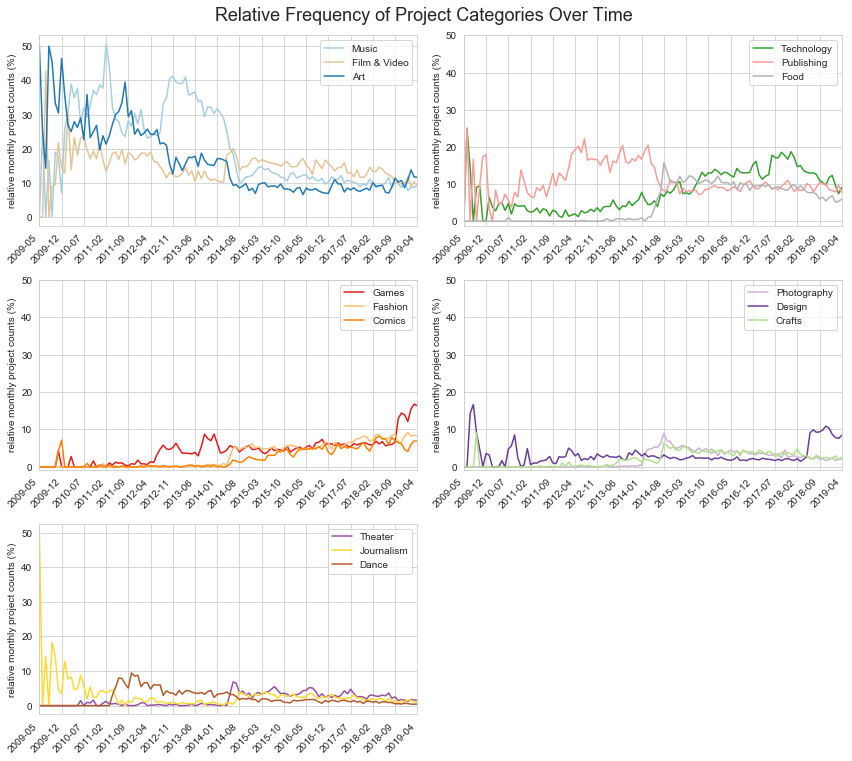

In [103]:
# settings
fig = plt.figure(figsize=[12,10])
j = 0
g_count = 0

# create 5 suplots, plotting 3 categroies each
for i in range(1,6):
    plt.subplot(3, 2, i)
    
    # take 3 categories per loop, in descending order 
    for cat in ks_compl.category.value_counts()[j:j+3].index:
        # plot
        df_cat_counts[cat].plot(color=category_colors[g_count], label=cat);
        
        # labels and ticks
        g_count+=1
        plt.tight_layout()
        timeline_ticks(df_cat_counts)
        plt.yticks(np.arange(0, 50+1, 10))
        plt.xlabel("")
        plt.ylabel("relative monthly project counts (%)")
        plt.legend()
    j+=3

plt.suptitle("Relative Frequency of Project Categories Over Time", fontsize=18, y=1.02)
plt.show()

The relative popularity of project categories changed over time. Music, Film and Art dominated the early years. As of today, those are still popular categories, but have lost momentum. Publishing was also quite popular in the beginning years, but has lost popularity since August 2014.

Technology ventures got the biggest boost in popularity, but the proportion of tech project has been declining since 2017. 

Since 2018, the most remarkable changes occurred. Games, Fashion and Design suddenly gained popularity. Nowadays, Games count for 16% of projects. Most other categories seem to have settled below 10%. 

**Does a project category impact chances of success?**  

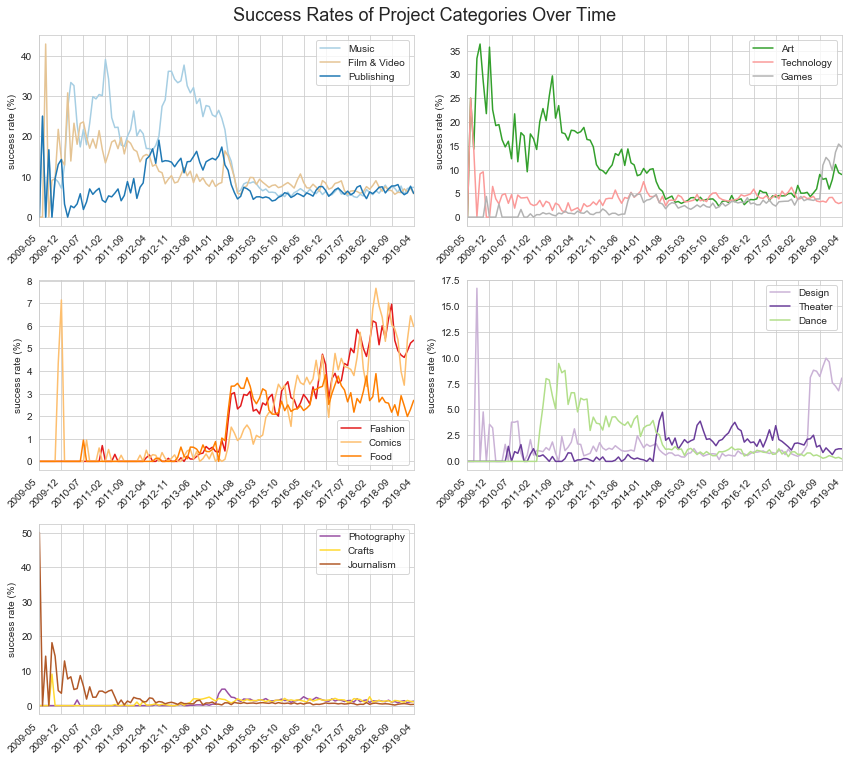

In [104]:
# calculate success rates 
df_cat_s = create_timeline_df(ks_compl_success,  "category")

# settings
fig = plt.figure(figsize=[12,10])
j = 0
g_count = 0

# create 5 suplots, plotting 3 categroies each
for i in range(1,6):
    plt.subplot(3, 2, i)
    
    # take 3 categories per loop, in descending order 
    for cat in ks_compl_success.category.value_counts()[j:j+3].index:
        # plot
        df_cat_s[cat].plot(color=category_colors[g_count], label=cat);
        
        # labels and ticks
        g_count+=1
        plt.tight_layout()
        timeline_ticks(df_cat_s)
        plt.xlabel("")
        plt.ylabel("success rate (%)")
        plt.legend()
    j+=3

plt.suptitle("Success Rates of Project Categories Over Time", fontsize=18, y=1.02)
plt.show()

The popularity of projects changed over time. So have the chances for success. Music, Film & Video, Publishing, Art and Dance became less likely to succeed. On the other hand, success rates of Games, Fashion, Comics, Food and Design have been increasing since 2018. Interestingly, the most obvious changes occurred by the beginning of 2018. 

As we don't want to distort our success predictors with old-fashioned data, we are going to focus on the most recent years from 2018 and 2019.

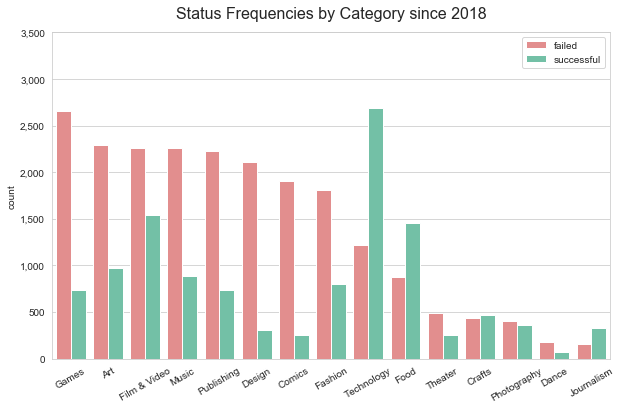

In [105]:
#settings
plt.figure(figsize=[10,6])

# filter projects younger than 2017
ks_compl_18 = ks_compl[ks_compl.deadline.dt.year > 2017]

# order by success
order = ks_compl_18[ks_compl_18.status == 'successful'].category.value_counts().index

# plot clustered bar chart - qualitative variables counts
ax = sns.countplot(data = ks_compl_18, x = 'category', hue = 'status', 
                   color =  sns.set_palette([cust_red, cust_green]), 
                   order=order)

# reset legend to avoid overlap
ax.legend(loc = 'upper right', ncol = 3, framealpha = 1, title = 'status')

# ticks and labels
plt.title("Status Frequencies by Category since 2018", fontsize=16, pad=14);
plt.legend(("failed", "successful"))
format_yticks(3500, 500)
plt.xticks(rotation=30)
plt.xlabel("")
plt.show()

In absolute counts Games, Design and Art stand out to be extraordinary successful categories. Compared to other categories, technology projects have the highest occurrences in unsuccessful project counts. Photography, Dance and Journalism generally performed poorly. 

As we visualized absolute values above, we may misinterpret the actual success rates. In the plot below, we calculate relative frequencies of each category.

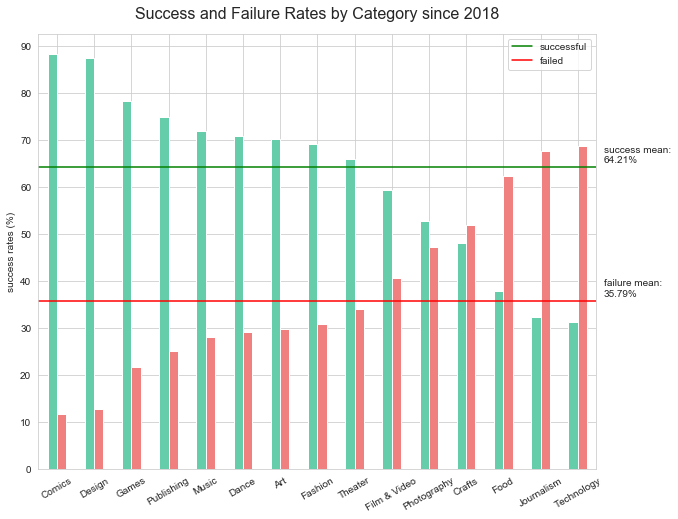

In [106]:
# ordering
pop_cats = ks_compl_18.category.value_counts().index
cat_counts = ks_compl_18.category.value_counts()

# calculate success and failure rates
def calc_rate(category, status):
    cat_df = ks_compl_18[ks_compl_18.category == category]
    return (len(cat_df[cat_df.status == status]) / len(cat_df)) * 100 

cat_success = [calc_rate(cat,"successful") for cat in pop_cats]
cat_failed = [calc_rate(cat,"failed") for cat in pop_cats]

# create a new dataframe based success and failure rates
df = pd.DataFrame({'success': cat_success, 'failed': cat_failed}, index=pop_cats)

# order by success rates
df.sort_values(by=['success'], ascending=False, inplace=True)

# plot
df.plot.bar(rot=30, figsize=(10,8), color = sns.set_palette([cust_green, cust_red]));

# plot means
p_18_success = len(ks_compl_18[ks_compl_18.status == 'successful']) / len(ks_compl_18) *100
p_18_failed = 100 - p_18_success
plt.axhline(p_18_success, color='g')
plt.axhline(p_18_failed, color='r')

# annotate
plt.title("Success and Failure Rates by Category since 2018", fontsize=16, pad=15);
plt.text(14.7, p_18_success+1, "success mean:\n" + str(round(p_18_success, 2)) + "%" )
plt.text(14.7, p_18_failed+1, "failure mean:\n" + str(round(p_18_failed, 2)) + "%")
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("success rates (%)")
plt.xlabel("")
plt.legend(("successful", "failed"))
plt.show()

The above success and failure rates suggest a strong relationship between the project type and the likelihood to succeed. Since 2018 Design, Comics and Games have been performing extraordinarily, realizing success rates of plus 80%. 

However, Crafts, Food, Journalism and Technology were rather likely to fail. A creator's chance of success was under 50%. Due to the popularity, this result is especially tragic for tech-related campaigns. 69% of all tech projects failed since 2018.

**Combined categories**  

Plot absolute frequencies of combined category to understand the relevance of subcategories in the recent months. 

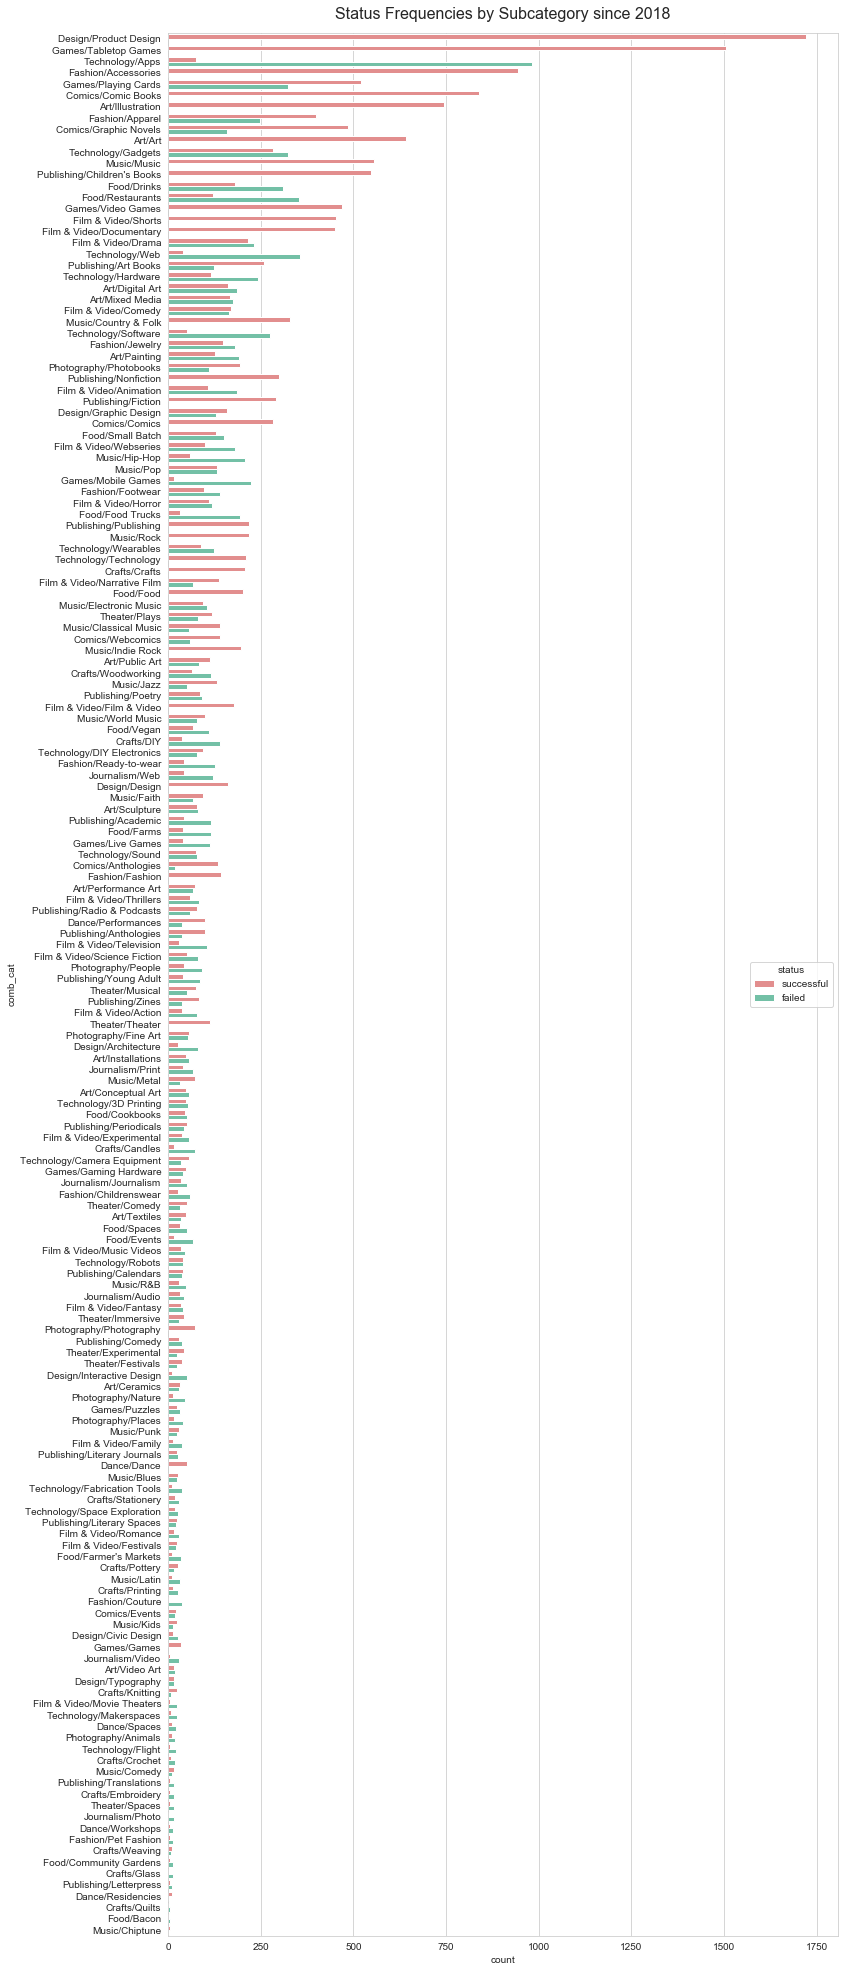

In [107]:
# settings
plt.figure(figsize=[12,35])

# plot clustered bar chart - qualitative variables counts
ax = sns.countplot(data = ks_compl_18, y = 'comb_cat',  hue='status', 
                   color = sns.set_palette([cust_red, cust_green]), 
                   order=ks_compl_18.comb_cat.value_counts().index)

# ticks and labels
plt.title("Status Frequencies by Subcategory since 2018", fontsize=16, pad=14);
ax.legend(loc=5, title = 'status')
plt.show()

Plot success rates of subcategories. Start by creating a dataframe with relative success rates by subcategory.

In [108]:
# generate data frame  
comb_cats = ks_compl_18.comb_cat.value_counts().index
cat_counts = ks_compl_18.comb_cat.value_counts()

# calculate success and failure rates
def calc_rate(category, status):
    cat_df = ks_compl_18[ks_compl_18.comb_cat == category]
    if len(cat_df):
        return (len(cat_df[cat_df.status == status]) / len(cat_df)) * 100
    return 0

comb_cat_success = [calc_rate(cat,"successful") for cat in comb_cats]
comb_cat_failed = [calc_rate(cat,"failed") for cat in comb_cats]

# create a new dataframe based success and failure rates
df_comb_cat_r = pd.DataFrame({'comb_cat': comb_cats, 'success': comb_cat_success, 'failed': comb_cat_failed})
# order by success rates
df_comb_cat_r.sort_values(by='success', ascending=False, inplace=True)
df_comb_cat_r.reset_index(inplace=True, drop=True)
df_comb_cat_r.head()

comb_cat  success  failed
0  Design/Product Design    100.0    0.0    
1  Film & Video/Documentary 100.0    0.0    
2  Technology/Technology    100.0    0.0    
3  Crafts/Crafts            100.0    0.0    
4  Food/Food                100.0    0.0

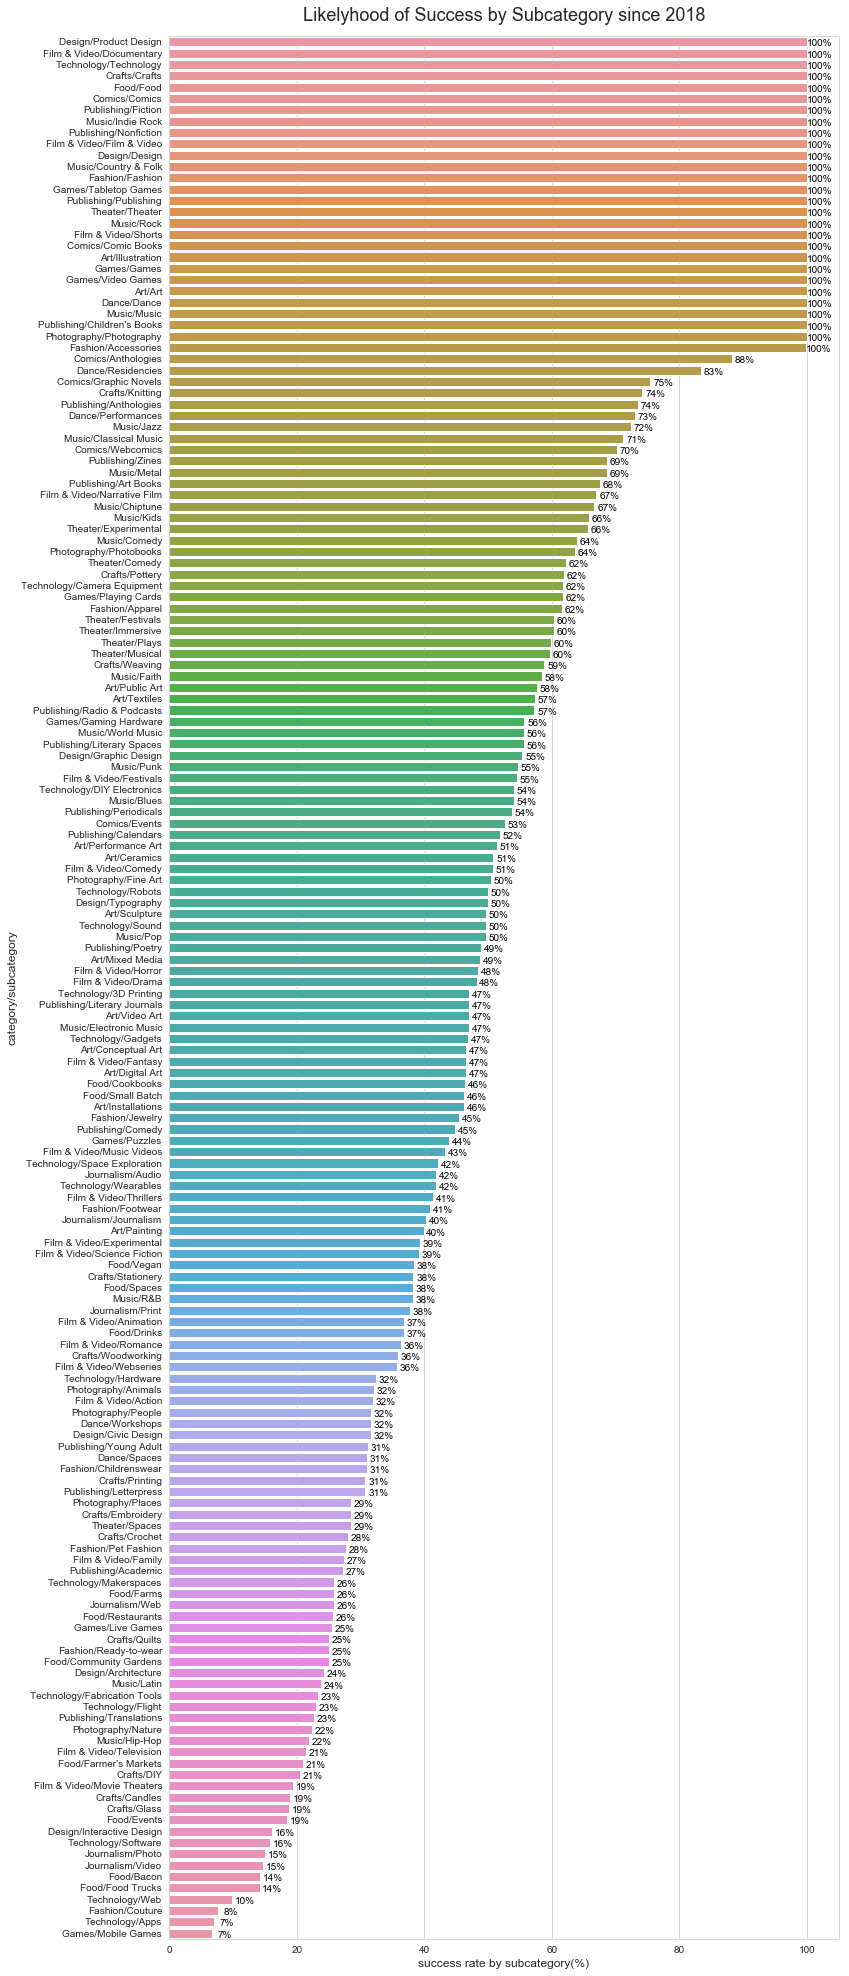

In [109]:
# create horizontal bar chart of probability to be supported leading to success 
plt.figure(figsize=[12,35])

# utility for annotations
def annotate_success(df, outcome, x_offset=0, y_offset=0):
    locs, labels = plt.yticks() 
    for loc, label in zip(locs, labels):
        label = label.get_text()
        cat_p = df[df['comb_cat'] == label][outcome].values[0]
        cat_p_label = str(int(round(cat_p))) + "%"
        plt.text(cat_p+x_offset, loc+y_offset, cat_p_label, ha='center', color="black")

# plot
ax = sns.barplot(data=df_comb_cat_r, x='success', y='comb_cat', order=df_comb_cat_r.comb_cat.values);

# annotate rel. success
annotate_success(df_comb_cat_r, 'success', 2, 0.4)

# labels and titles
plt.title("Likelyhood of Success by Subcategory since 2018", fontsize=18, pad=15);
plt.xlabel("success rate by subcategory(%)", fontsize=12)
plt.ylabel("category/subcategory", fontsize=12)
plt.show()

There were quite some subcategories with an incredible 100% chance for success. Among others, there were Tabletop Games, Dance, Country & Folk Music, Comics and Product Design projects. 

Notice the accumulation of high-ranking projects without subcategories, e.g. Dance/Dance, Photography/Photography or Comics/Comics. We found that 12 out of 15 parent categories without any subcategory had a 100% chance to succeed. This behavior seems a bit odd to me. I wonder if this is related to search algorithms used by the platform or search behavior by users. This may be a topic to elaborate on, but I'm missing the relevant data.

Overall, the plot suggests that the type of project is correlated with success. The subcategory should be chosen carefully by checking success rates against subcategories before running a campaign. For example, Tabletop Games and Video Games had a 100% chance to succeed, but Mobile Games failed at a rate of 93%. And, while Hip-Hop Music only had a 22% success rate, Rock Music campaigns always ended successfully since 2018.

As I depicted relative numbers here, we may overestimate or underestimate the significance of the probability of success. Also, because of the high number of subcategories, the above plot is difficult to read and interpret. Thus, I'm going to plot a best-off version which only considers the most popular subcategories.

In [110]:
# I'm considering the upper quarter of project counts the most popular categories. 
# According to the 75 quantile, popular subcategories have more 228 projects recorded since 2018
cat_counts.describe()

count   168.0             
mean    197.1904761904762 
std     244.84121586570802
min     6.0               
25%     50.75             
50%     124.5             
75%     226.75            
max     1,721.0           
Name: comb_cat, dtype: float64

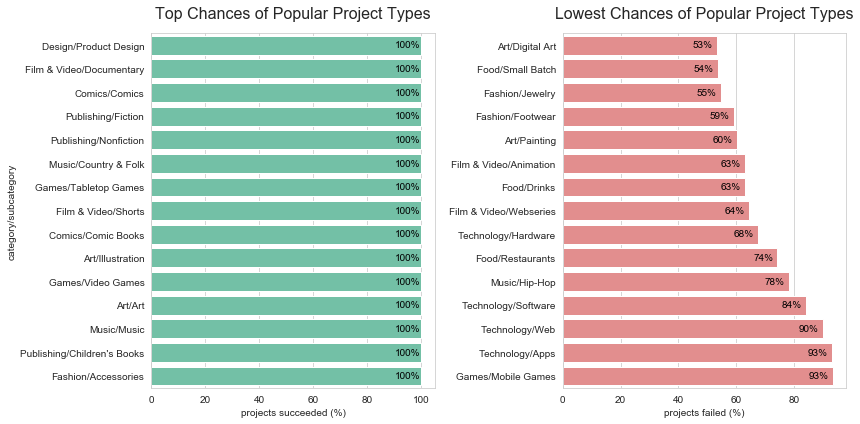

In [111]:
# plot highlights
plt.figure(figsize=[12,6])

# filter top 25% of the most popular comb categories and sort by relevance
pop_cats = cat_counts.where(cat_counts > cat_counts.quantile(q=0.75)).dropna().index

# filter subcategorical counts by popular subcategories
df_comb_cat_pop = df_comb_cat_r[df_comb_cat_r.comb_cat.isin(pop_cats)]
df_comb_cat_pop.reset_index(drop=True, inplace=True)

# left plot: top 15 of poular combined categories
plt.subplot(1, 2, 1)
ax = sns.barplot(data=df_comb_cat_pop[:15], x='success', y='comb_cat', color=cust_green);

# ticks and labels
plt.title("Top Chances of Popular Project Types", fontsize=16, pad=15);
plt.xlabel("projects succeeded (%)")
plt.ylabel("category/subcategory")
annotate_success(df_comb_cat_pop, 'success', -5, 0.1)

# right plot: 15 lowest chances of popular combined categories
plt.subplot(1, 2, 2)
ax = sns.barplot(data=df_comb_cat_pop[-15:], x='failed', y='comb_cat', color=cust_red);

# ticks and labels
plt.title("Lowest Chances of Popular Project Types", fontsize=16, pad=15);
plt.xlabel("projects failed (%)")
plt.ylabel("")
annotate_success(df_comb_cat_pop, 'failed', -5, 0.1)

plt.tight_layout()
plt.show()

### Summary Categories
The type of project matters! Creative projects and categories seem to work best on Kickstarter. The top chances of popular project categories show a tendency to not have subcategories selected. Generally, Publishing, Comics, Film & Video, Art and Music performed well if they were not communicated in niche categories.

Written work and comics dominated the top categories. Fiction & Nonfiction Publishing Projects, Children's and Comic Books all ended in success. 

We found Product Design, Documentaries and Comics at the top of the most successful projects. While Video Games were attributed with top success chances, Mobile Games have been the subcategory most likely to fail (93%). 
Tech or digital projects generally performed low. Gadgets, Hard- and Software, Web Projects and Apps all had very low chances of success, although being among the most popular categories. 

In addition to technology ventures, we found 3 food subcategories among the projects with the lowest chances: Small Batch, Drinks and Restaurants.

Product Design and Illustrations worked in any case. In contrast, paintings had a 60% chance to fail. Generally, campaigns labeled as _Design_ worked better than labeled as _Art_.

The taste in music seems to matter. While crowdfunding worked well for Country & Folk Music, Hip-Hop campaigns failed at a rate of 78%. Film & Video projects appear on both sites of success chances. Short Films and Documentaries were a guarantee for success, while Animations and Web Series were more likely to fail. 

Overall, I see indications that the type of project is correlated with with the chances for success. The category and subcategory should be chosen carefully by observing popularity, success rates and current trends of subcategories before running a campaign.

### Funding

Closely related to a campaign's funding are three variables: the goal set by a project creator, the final amount pledged and the number of supporters. I'll start by investigating how a goal may influence success, then I'll look into pledges and how much each backer contributed.

**Does a campaign's funding goal affect the chances for success?**

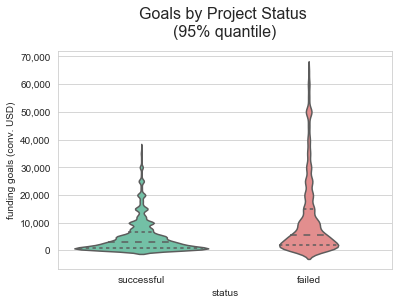

In [112]:
# violin plots of 95 quantile data frame 
ax = sns.violinplot(data = ks_compl_95, x = 'status', y = 'goal_hist_usd', 
                    order=['successful', 'failed'], 
                    color=sns.set_palette([cust_green, cust_red]), 
                    inner='quartile')
#annotate
plt.title("Goals by Project Status \n(95% quantile)", fontsize=16, pad=15 )
ylabels = ['{:,.0f}'.format(ytick) for ytick in ax.get_yticks()]
ax.set_yticklabels(ylabels)
plt.ylabel('funding goals (conv. USD)')

plt.show()

The above violin plots of the 95% quantile data suggests that successful campaigns tend to have lower funding goals compared to failed projects. Notice the comparatively wide section at the bottom of successful campaigns. It indicates that the lower the funding goal the higher is the probability of success. The median of failed campaigns is higher than of successful campaigns, the tail and the upper quartile range are much higher. While successful funding goals remained below USD 40k, failed goals range up to USD 70k.  

One more interesting observation: the multi-modality of successful goals seems to be more pronounced compared to failed goals. We've already discovered that goals are more frequently set at full numbers like 5, 10, 15 or 20k. However, the plot above suggests that supporters may also have an increased preference to invest in fully numbered goals.

By using the 95% quantile data above, we removed any extreme funding goals. Nevertheless, our goal data is still highly skewed. Let's take a more detailed look on funding goals by plotting goal level categories.

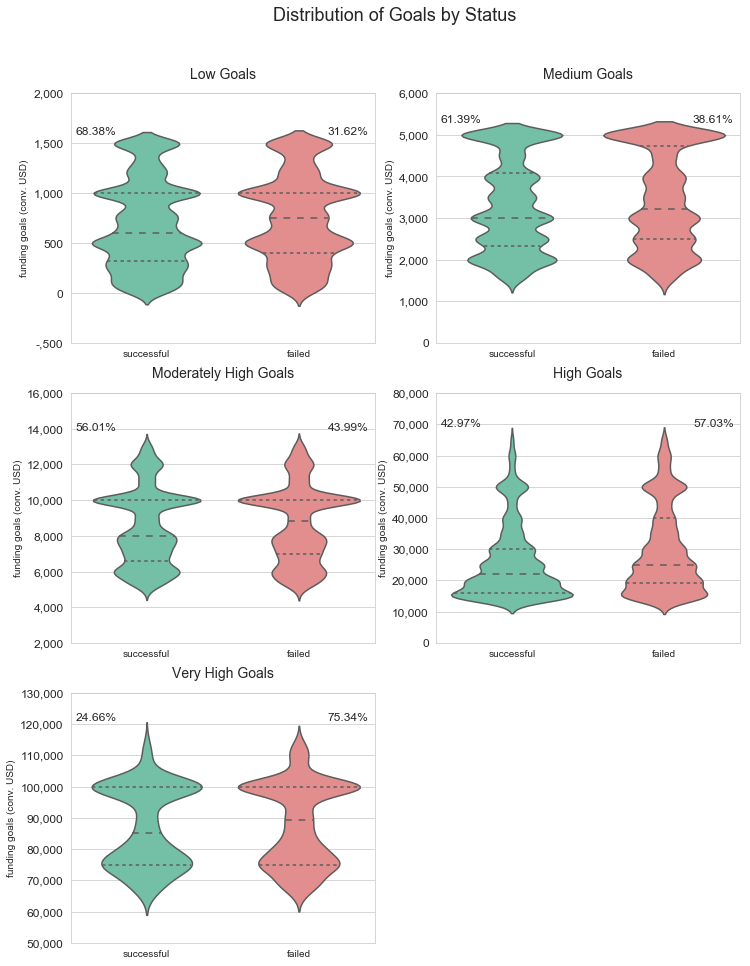

In [113]:
# settings
plt.figure(figsize=[12,10])

# completed projects filtered by goal level 
ks_goal_leveled = [ks_compl_goal_low, ks_compl_goal_medium, 
                   ks_compl_goal_moderate, ks_compl_goal_high, 
                   ks_compl_goal_very_high, ks_compl_goal_extreme]

texts = ["Low", "Medium", "Moderately High", "High", "Very High", "Extreme"]

# faceted goal violin plots 
for i, df in enumerate(ks_goal_leveled[:-1]):
    plt.subplot(3, 2, i+1)
    ax = sns.violinplot(data = df, x = 'status', y = 'goal_hist_usd', 
                       order=['successful', 'failed'], 
                       color =sns.set_palette([cust_green, cust_red]), 
                       inner='quartile')
    
    # calculate success rates
    p_failed_goal = len(df[df.status == "failed"])* 100 / len(df)
    p_success_goal = 100 - p_failed_goal
    
    #annotate
    ax.annotate(str(round(p_failed_goal,2)) + "%", xy=(1.19, df.goal_hist_usd.max()*1.06), fontsize=12)
    ax.annotate(str(round(p_success_goal,2)) + "%", xy=(-0.47, df.goal_hist_usd.max()*1.06), fontsize=12)
    
    plt.title(texts[i]+" Goals", fontsize=14, pad=15)
    locs, labels = plt.yticks()
    labels = [str(format_num(loc)) for loc in locs]
    plt.yticks(locs, labels, fontsize=12)
    plt.ylabel("funding goals (conv. USD)")
    
    plt.xlabel("")
    plt.subplots_adjust(bottom=-0.3)
    
plt.suptitle("Distribution of Goals by Status", fontsize=18, y=1)
plt.show()

By faceting funding goals into 5 levels, we eliminated the long tail of the previous plot. The multi-modal character of goals has become more prominent. At the same time the differences between successful and failed goals have become less apparent. If we look closely, independent from a goal category, the violin plots of successful goals tend to be wider on the lower end, while failed goals are generally wider on the upper end. 

Also, the median of successful campaigns is always lower than the median of failed projects. Thus, it is reasonable to stick to the lowest goal possible to maximize the chance for success.

I annotated the proportion of successful and failed campaigns for each goal level. With 68%, the chances for success were highest for low goals below USD {{goal_25}}. Success rates decrease the higher the goal category. Very high goals between USD {{format_num(goal_95)}} and USD {{format_num(goal_975)}} only succeed at a rate of 24.66%. I would like to illustrate the decreasing trend clearer by clustering goals and plot respective success rates.

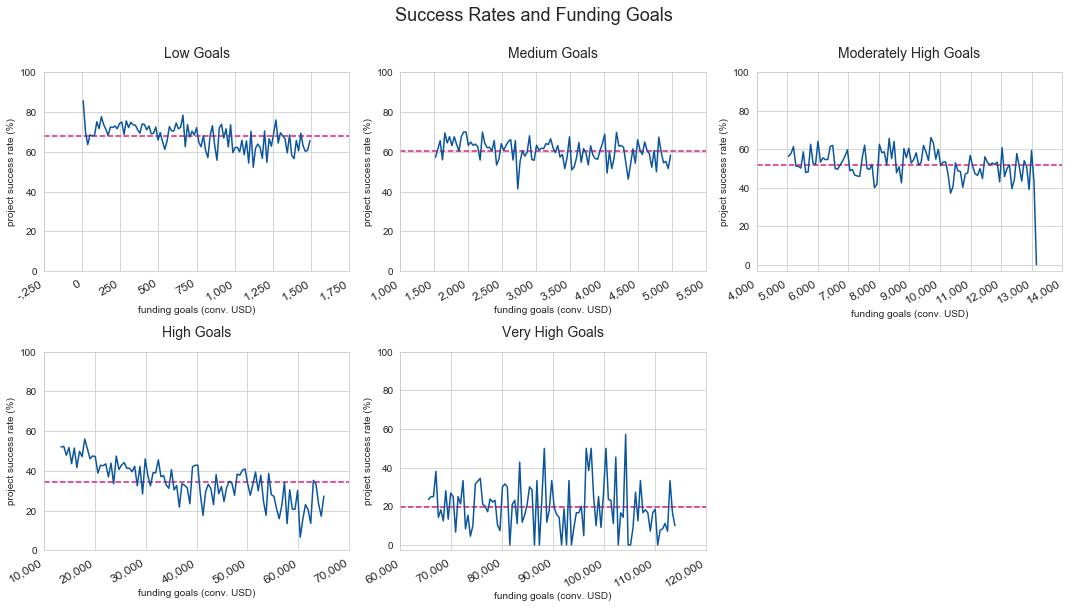

In [114]:
# settings
plt.figure(figsize=[15,8])

# utility to bin data
def bin_data(df):
    # create bin edges for goals
    bin_size = (df['goal_hist_usd'].max()-df['goal_hist_usd'].min()) / 101
    bins = np.arange(df['goal_hist_usd'].min(),df['goal_hist_usd'].max()+bin_size, bin_size)
    # create bin centers to plot them in their accurate positions
    # leave out the the last value, since it doesn't correspond to an actual bin center  
    bins_c = bins[:-1] + bin_size/2
    # Use cut function to bin values into discrete intervals to segment and sort data values into bins. 
    # for all goals
    goals_binned = pd.cut(df['goal_hist_usd'], bins, include_lowest = True)
    # successful goals
    goals_binned_success = pd.cut(df[df.status == 'successful']['goal_hist_usd'], bins, include_lowest = True)
    return {'total': goals_binned, 'success': goals_binned_success, 'bins': bins_c}

# utility to plot success rates
def plot_success_r(goals_binned, mean=True):
    # calculate success rate for every bin
    success_r = (goals_binned['success'].value_counts(sort=False) / goals_binned['total'].value_counts(sort=False)*100).values    
    # plot success rates as adapted line plot to emphasize relative change
    plt.errorbar(x = goals_binned['bins'], y = success_r, color=goal_color)
    # plot success mean
    if mean:
        plt.axhline(success_r.mean(), color='#dd1c77', linestyle='--')
#         plt.annotate("mean:\n" + str(int(round(success_r.mean()))) + "%", xy=(goals_binned['bins'].max()*0.9, 80), fontsize=12)

# faceted goals and success rates
for i, df in enumerate(ks_goal_leveled[:-1]):
    plt.subplot(2, 3, i+1)
    goals_binned = bin_data(df)
    plot_success_r(goals_binned)
    
    # ticks and labels
    plt.title(texts[i]+" Goals", fontsize=14, pad=15)
    
    locs, labels = plt.xticks()
    labels = [str(format_num(loc)) for loc in locs]
    plt.xticks(locs, labels, fontsize=12, rotation=30, ha='right')
    plt.xlabel("funding goals (conv. USD)")

    plt.yticks(np.arange(0, 101, 20))
    plt.ylabel("project success rate (%)")
    plt.tight_layout()    

plt.suptitle("Success Rates and Funding Goals ", fontsize=18, y=1.05)
plt.show()

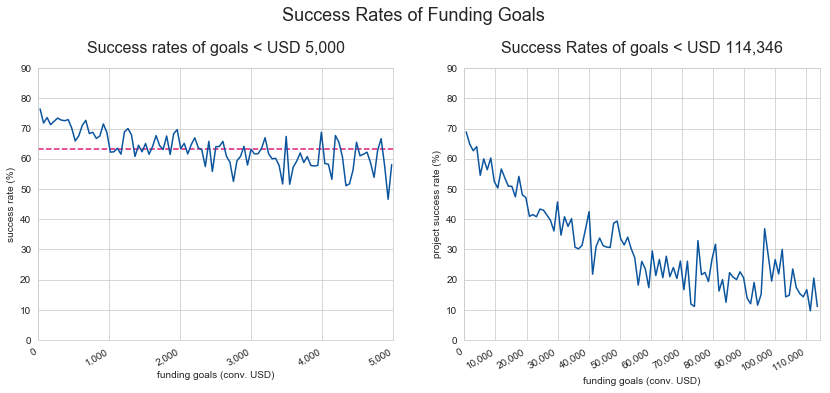

In [115]:
# settings
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
# plot low to moderately high goals
goals_binned = bin_data(ks_compl[ks_compl['goal_hist_usd'] < goal_50])
plot_success_r(goals_binned)

# ticks and labels
plt.title("Success rates of goals < USD " + format_num(goal_50), fontsize=16, pad=15)

locs = np.arange(0, goal_50+1, 1000)
labels = [str(format_num(loc)) for loc in locs]
plt.xticks(locs, labels, rotation=30, ha='right')
plt.xlabel("funding goals (conv. USD)")
plt.xlim(0, goal_50)

plt.yticks(np.arange(0, 91, 10))
plt.ylabel("success rate (%)")

plt.subplot(1,2,2)
# plot low to moderately high goals
goals_binned = bin_data(ks_compl[ks_compl['goal_hist_usd'] < goal_975])
plot_success_r(goals_binned, False)

# ticks and labels
plt.title("Success Rates of goals < USD " + format_num(goal_975), fontsize=16, pad=15)

locs = np.arange(0, goal_975+10000, 10000)
labels = [str(format_num(loc)) for loc in locs]
plt.xticks(locs, labels, rotation=30, ha='right')
plt.xlabel("funding goals (conv. USD)")
plt.xlim(0, goal_975)

plt.yticks(np.arange(0, 91, 10))
plt.ylabel("project success rate (%)")

plt.suptitle("Success Rates of Funding Goals ", fontsize=18, y=1.05)
plt.show()

Success rates continuously decrease the higher the funding goal. If creators want to keep a minimum of a 50% chance, it appears advisable to stay below goals of USD 10k.

The chances of success drop from a mean 68% for low goals to 20% for very high goals. The higher the goal the more volatile the plot of success rates becomes. Creators should generally consider the most pessimistic goals possible to win investments. 

Due to Kickstarter's all-or-nothing approach to funding, this result doesn't surprise. More interesting for creators is to set a realistic goal in order to gain the best chance for success and collect the maximum investment possible to start their venture. 

The success rates of medium goals from USD {{format_num(goal_25)}} to USD {{format_num(goal_50)}} make the most stable impression. The mean of a success chance is at a rate of 61% and a reasonable high investment may be collected.

Creators who seek funding in the range of moderately high goals may be aware of decreased success rates just ahead of USD 10k. This is when the mean success rates drop under 50/50 chances for success.

High goals up to USD {format_num(goal_95)}} and to a greater degree very high goals are rather risky ventures. Success is rather unlikely, decreasing to means of 35%, respectively 20%. However, there are individual peaks in success chances at goals around USD 40k and USD 50k.

**Does the scope of a funding goal affect the final collected investment?**

If funding goals should be set rather low to win a crowdfunding campaign, creators may fear that a campaign doesn't result in the necessary funding needed to launch their business. Ultimately, the final amount pledged of a project determines the profitability of a campaign. Thus, I'm going to take into account pledges by calculating the surplus raised above each successful funding goal.  

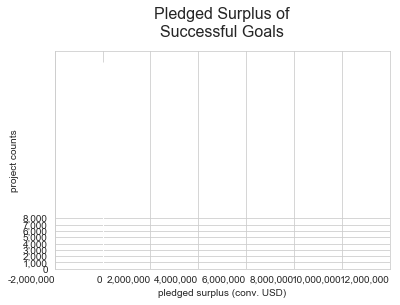

In [169]:
# calculate surplus of successful campaigns
ks_compl['surplus'] = ks_compl['pledged_hist_usd'] - ks_compl['goal_hist_usd'] 
ks_compl_95['surplus'] = ks_compl_95['pledged_hist_usd'] - ks_compl_95['goal_hist_usd'] 
ks_compl_success= ks_compl[ks_compl.status == "successful"]

bin_edges = np.arange(0, ks_compl_success['surplus'].max()+250, 250)
sns.distplot(ks_compl_success['surplus'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1, 'color': pledged_color})
# plt.xlim(0, 8000)

# ticks and labels
plt.title("Pledged Surplus of\nSuccessful Goals", fontsize=16, pad=15)
# format_yticks(40000, 5000)
plt.ylabel("project counts")
format_yticks(8000, 1000)

locs, labels = plt.xticks()
labels = [str(format_num(loc)) for loc in locs]
plt.xticks(locs, labels, ha='right')
plt.xlabel("pledged surplus (conv. USD)")

plt.show()

Like pledges, low surpluses are more common than high surpluses and the distribution is strongly skewed. By far, most common are surpluses realized below USD 250. Now, let's depict surpluses to respective goal.

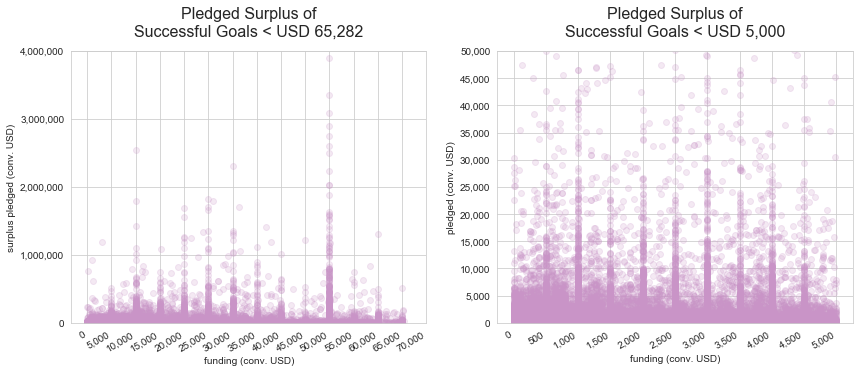

In [117]:
# a regplot approach

# settings
plt.figure(figsize=[14,5])

# left: regplot approach - 95-quantile goals only
plt.subplot(1,2,1)
# for successfull campaigns with goals below 95%-quantile
ks_goal_95_s = ks_compl_success[ks_compl_success.goal_hist_usd < goal_95]
sns.regplot(ks_goal_95_s.goal_hist_usd, ks_goal_95_s.surplus, 
            scatter_kws = {'alpha' : 1/5}, fit_reg=False, color=pledged_color);
plt.xlabel("goals < " + format_num(int(round(goal_95))) +  " (conv. USD)")

# ticks and labels
plt.title("Pledged Surplus of\nSuccessful Goals < USD " + format_num(goal_95), fontsize=16, pad=15)

locs = np.arange(0, goal_95+5000, 5000)
labels = [str(format_num(loc)) for loc in locs]
plt.xticks(locs, labels, fontsize=10, rotation=30, ha='right')
plt.xlabel("funding (conv. USD)")

locs = np.arange(0,  4000000+1000000, 1000000)
labels = [str(format_num(loc)) for loc in locs]
plt.yticks(locs, labels, fontsize=10)
plt.ylabel("surplus pledged (conv. USD)")
plt.ylim(0, 4000000)

# right: regplot approach - 50-quantile goals only
plt.subplot(1,2,2)
ks_goal_50_s = ks_compl_success[ks_compl_success.goal_hist_usd < goal_50]
sns.regplot(ks_goal_50_s.goal_hist_usd, ks_goal_50_s.surplus, 
            scatter_kws = {'alpha' : 1/5}, fit_reg=False, color=pledged_color);

# ticks and labels
plt.title("Pledged Surplus of\nSuccessful Goals < USD " + format_num(goal_50), fontsize=16, pad=15)

locs = np.arange(0, goal_50+500, 500)
labels = [str(format_num(loc)) for loc in locs]
plt.xticks(locs, labels, fontsize=10, rotation=30, ha='right')
plt.xlabel("funding (conv. USD)")

format_yticks(50000, 5000)
plt.ylabel("pledged (conv. USD)")
plt.ylim(0, 50000)

plt.show()

The most striking feature about the relationship between the surplus pledged and a goal is the density of projects generating an array of surpluses at goals in intervals of 5,000. In goals below USD 5k, the intervals occur in steps of USD 500. 

To be precise, goals of USD 5k, 10k, 15k etc., stand out in realizing high surpluses. Goals of USD 50k catch the eye by realizing the highest possible pledges within the scope of the 95 quantile goals. 

Ignoring the multi-modality of goals, the realized surplus appears to be relatively evenly distributed across goals. This is true for low and high goals. This indicates that the scope of a goal does not necessarily influence the surplus of the final amount collected and that creators may increase their chances to realize higher investments by choosing goals in aforementioned intervals. 

Before we draw any conclusion, it makes sense to relate the surplus to its goal.

In [118]:
# calculate relative differences between goal and pledged of successful campaigns
ks_compl['surplus_r'] = abs(ks_compl['surplus'] / ks_compl['goal_hist_usd']) *100 
ks_compl_95['surplus_r'] = abs(ks_compl_95['surplus'] / ks_compl_95['goal_hist_usd']) *100 
ks_compl_success = ks_compl[ks_compl.status == 'successful']
ks_compl_success.surplus_r.sort_values().tail(10)

12846    809,951.0          
10104    958,708.8607594937 
82148    960,400.0          
165325   999,900.0          
88831    1,257,415.0        
63817    2,260,200.0        
148766   2,303,506.7        
83782    2,758,723.0        
26136    2,868,718.0        
61720    6,876,310.000000001
Name: surplus_r, dtype: float64

We found some very high surplus rates. Thus, we are going to apply a log scale transformation on our rates.

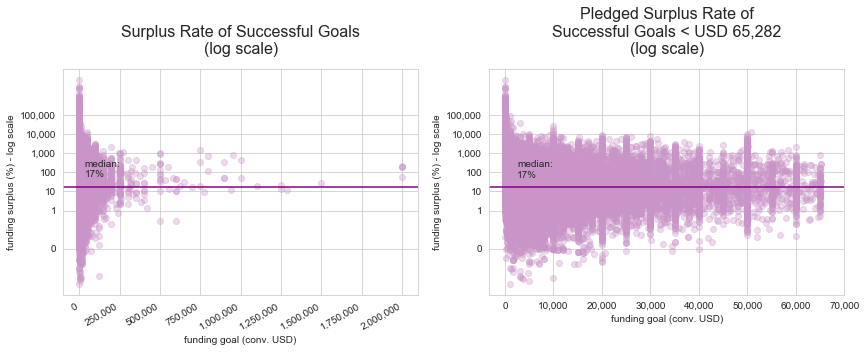

In [119]:
# settings
plt.figure(figsize=[14,5])

# left plot: regplot using log scale on y-axis, goals of all successful projects
plt.subplot(2,2,1)
sns.regplot(ks_compl_success.goal_hist_usd, ks_compl_success.surplus_r.apply(log_trans), 
            scatter_kws = {'alpha' : 1/3}, truncate=True, color=pledged_color,
            fit_reg=False);

# plot and annotate median
surplus_r_median = round(log_trans(ks_compl_success.surplus_r.median()),2)
plt.axhline(surplus_r_median, color='purple')
plt.text(35000, surplus_r_median+0.5, 
         "median:\n" + str(int(round(log_trans(surplus_r_median, inverse=True)))) + "%")

# ticks and labels
plt.title("Surplus Rate of Successful Goals\n(log scale)", fontsize=16, pad=15)

ylocs = [0.01, 1, 10, 100, 1000, 10000, 100000]
ylabels = [str(format_num(loc)) for loc in ylocs]
plt.yticks(log_trans(ylocs), ylabels)

plt.xlabel("funding goal (conv. USD)")
plt.ylabel("funding surplus (%) - log scale")

xlocs = np.arange(0, ks_compl_success.goal_hist_usd.max()+25000, 250000)
xlabels = [str(format_num(loc)) for loc in xlocs]
plt.xticks(xlocs, xlabels, rotation=30, ha='right')

# right plot: zoom in on 95-quantile goals
plt.subplot(2,2,2)
ks_goal_95_s = ks_compl_success[ks_compl_success.goal_hist_usd < goal_95]
sns.regplot(ks_goal_95_s.goal_hist_usd, ks_goal_95_s.surplus_r.apply(log_trans),
            scatter_kws = {'alpha' : 1/3}, color=pledged_color, 
            fit_reg=False);

# plot and annotate median
surplus_r_median = round(log_trans(ks_goal_95_s.surplus_r.median()), 2)
plt.axhline(surplus_r_median, color='purple')
plt.text(2500, surplus_r_median+0.5, 
         "median:\n" + format_num(log_trans(surplus_r_median, inverse=True)) + "%")

# ticks and labels
plt.title("Pledged Surplus Rate of\nSuccessful Goals < USD " + format_num(goal_95) + "\n(log scale)", fontsize=16, pad=15)
ylocs = [0.01, 1, 10, 100, 1000, 10000, 100000]
ylabels = [str(format_num(loc)) for loc in ylocs]
plt.yticks(log_trans(ylocs), ylabels)
plt.ylabel("funding surplus (%) - log scale")

format_xticks(70000, 10000)
plt.xlabel("funding goal (conv. USD)")
plt.subplots_adjust(bottom=-0.5)

plt.show()

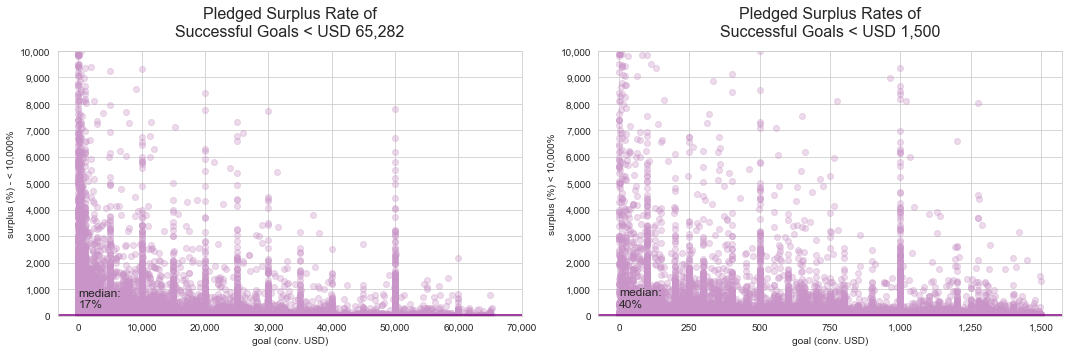

In [120]:
# settings
plt.figure(figsize=[15,5])

# left: plot surplus rates of 75% quantile goals
plt.subplot(1,2,1)
ks_goal_95_s = ks_compl_success[ks_compl_success.goal_hist_usd < goal_95]
sns.regplot(ks_goal_95_s.goal_hist_usd, ks_goal_95_s.surplus_r,
            scatter_kws = {'alpha' : 1/3}, color=pledged_color, 
            fit_reg=False);
plt.ylim(0, 10000)

# annotate median
surplus_r_median = round(ks_goal_95_s.surplus_r.median(),2)
plt.axhline(surplus_r_median, color='purple')
plt.text(ks_goal_95_s.goal_hist_usd.min()*1.2, surplus_r_median+300, 
         "median:\n" + str(int(surplus_r_median)) + "%", fontsize=12)

# ticks and labels
plt.title("Pledged Surplus Rate of\nSuccessful Goals < USD " + format_num(goal_95), fontsize=16, pad=15)

ylocs = np.arange(0, 10000+1000, 1000)
ylabels = [str(format_num(loc)) for loc in ylocs]
plt.yticks(ylocs, ylabels)
plt.ylabel("surplus (%) - < 10,000%")

xlocs = np.arange(0, goal_95+10000, 10000)
xlabels = [str(format_num(loc)) for loc in xlocs]
plt.xticks(xlocs, xlabels)
plt.xlabel("goal (conv. USD)")
plt.subplots_adjust(bottom=-0.5)

# right: plot surplus rate of 50% quantile goals
plt.subplot(1,2,2)
ks_goal_25_s = ks_compl_success[ks_compl_success.goal_hist_usd < goal_25]
sns.regplot(ks_goal_25_s.goal_hist_usd, ks_goal_25_s.surplus_r,
            scatter_kws = {'alpha' : 1/3}, color=pledged_color, 
            fit_reg=False);

# annotate median
surplus_r_median = round(ks_goal_25_s.surplus_r.median(),2)
plt.axhline(surplus_r_median, color='purple')
plt.text(ks_goal_25_s.goal_hist_usd.min()*1.2, surplus_r_median+300, 
         "median:\n" + str(int(surplus_r_median)) + "%", fontsize=12)

# ticks and labels
plt.title("Pledged Surplus Rates of\nSuccessful Goals < USD " + format_num(goal_25), fontsize=16, pad=15)
format_yticks(100000, 1000)
plt.ylabel("surplus (%) < 10,000%")
plt.ylim(0, 10000)
format_xticks(goal_25, 250)
plt.xlabel("goal (conv. USD)")
plt.subplots_adjust(bottom=-0.5)

plt.tight_layout()
plt.show()

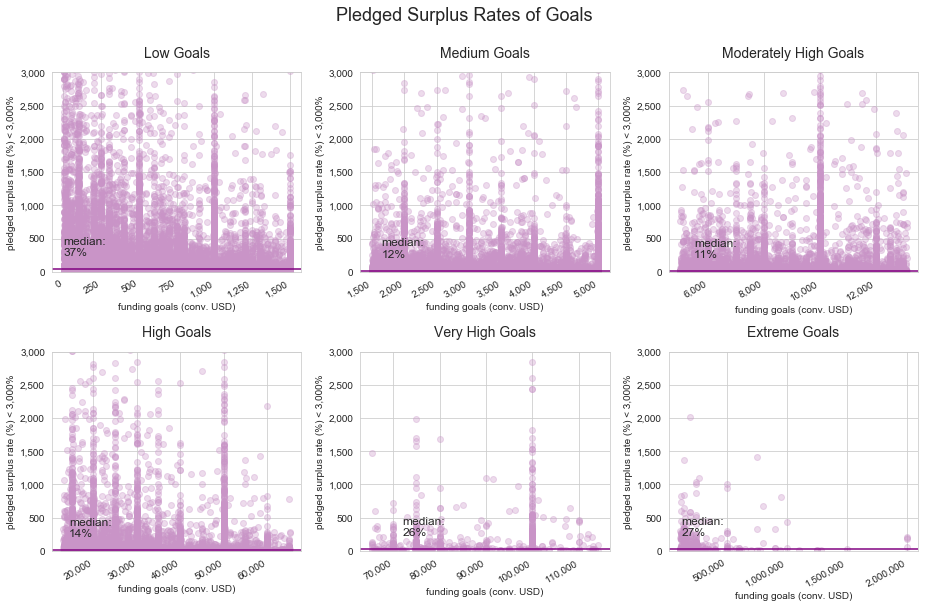

In [121]:
# settings
plt.figure(figsize=[13,8])

# facet goals
for i, goal_level in enumerate([goal_level.lower() for goal_level in texts]):
    plt.subplot(2, 3, i+1)
    df = ks_compl[ks_compl['goal_level'] == goal_level]
    df = df[df.status == 'successful']
    sns.regplot(df.goal_hist_usd, df.surplus_r,
            scatter_kws = {'alpha' : 1/3}, color=pledged_color, 
            fit_reg=False);
    
    # annotate median
    surplus_r_median = round(df.surplus_r.median(),2)
    plt.axhline(surplus_r_median, color='purple')
    plt.text(df.goal_hist_usd.min()*1.1, surplus_r_median+200, 
         "median:\n" + str(int(surplus_r_median)) + "%", fontsize=12)
    
    # ticks and labels
    plt.title(texts[i]+" Goals", fontsize=14, pad=15)
    locs, labels = plt.xticks()
    labels = [str(format_num(loc)) for loc in locs]
    plt.xticks(locs[1:-1], labels[1:-1], rotation=30, ha='right')
    plt.xlabel("funding goals (conv. USD)")
    format_yticks(3000, 500)
    plt.ylabel("pledged surplus rate (%) < 3,000%")
    plt.ylim(0,3000)
    plt.tight_layout()    
plt.suptitle("Pledged Surplus Rates of Goals", fontsize=18, y=1.05)
plt.show()

The relative surplus creators realize, can be best interpreted by depicted surplus rates under USD {{format_num(goal_95)}}.

Regardless of the chosen funding goal, on average, creators may expect a surplus of 17% above their successful funding goal. 
The higher a campaign goal, the lower the relative surplus. As a matter of fact the possible surplus decreases sharpest for low goals. 

If creators set low goals below USD {{format_num(goal_25)}}, they can expect a median surplus of 37%. After the initial decay, medium, moderately high and high goals generate relatively constant median surplus rates of 11-14%. 

The median surplus drops down to 11% for moderately high goals. Notice a slight upward trend for goals above USD 65k. Ultimately, very high goals realize median surplus rates of 27%.

Despite relative surplus rates, there still is a high density of surplus rates at full numbers, which may distort the interpretation of pledged funding. This is why we are going to bin goals according to the detected intervals. Then, we calculate the median of the surplus of each binned goal. This will allow us to depict the relationship in an adapted line plot. 

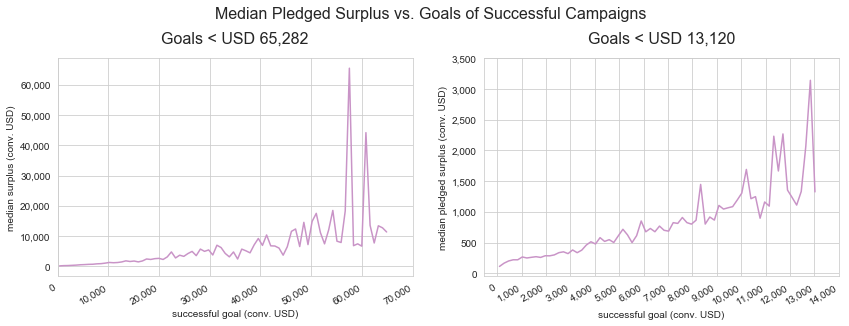

In [122]:
# settings
plt.figure(figsize=[14,4])

def binned_pledges(df, bin_count):
    # cluster goals
    bin_size = (df['goal_hist_usd'].max()-df['goal_hist_usd'].min()) / bin_count
    bin_edges = np.arange(df['goal_hist_usd'].min(), df['goal_hist_usd'].max()+bin_size, bin_size)
    bin_centers = bin_edges[:-1] + bin_size/2
    pd.set_option('mode.chained_assignment', None) # turn off warning
    df['goal_bin'] = pd.cut(df['goal_hist_usd'], bin_edges, labels=bin_centers)
    # calculate pledged median for every goal
    df_binned = df['surplus'].groupby([df.goal_bin]).median().reset_index()
    return df_binned

# left plot: binned median pledges and respective binned goals 
plt.subplot(1,2,1)
# for successfull campaigns with goals below 95%-quantile 
df_binned = binned_pledges(ks_goal_95_s, 80)
plt.errorbar(x = df_binned['goal_bin'], y = df_binned['surplus'], color=pledged_color ) 
plt.title("Goals < USD " + format_num(int(goal_95)), fontsize=16, pad=15)
    
locs = np.arange(0, 65000+10000, 10000)
labels = [str(format_num(loc)) for loc in locs]
plt.xticks(locs, labels,  rotation=30, ha='right')
plt.xlabel("successful goal (conv. USD)")
plt.xlim(0, 70000)

format_yticks(60000, 10000)
plt.ylabel("median surplus (conv. USD)")

# right plot: binned median pledges vs. respective binned goals: moderately high goals (50% quantile)
plt.subplot(1,2,2)
df_binned = binned_pledges(ks_compl_success[ks_compl_success.goal_hist_usd < goal_75], 70)
plt.errorbar(x = df_binned['goal_bin'], y = df_binned['surplus'], color=pledged_color ) 
plt.title("Goals < USD " + format_num(goal_75), fontsize=16, pad=15)

locs = np.arange(0, goal_75+1000, 1000)
labels = [str(format_num(loc)) for loc in locs]
plt.xticks(locs, labels, fontsize=10, rotation=30, ha='right')
plt.xlabel("successful goal (conv. USD)")

format_yticks(3500, 500)
plt.ylabel("median pledged surplus (conv. USD)")

plt.suptitle("Median Pledged Surplus vs. Goals of Successful Campaigns  ", fontsize=16, y=1.06)
plt.show()


The surplus pledged above goal increases linearly up to goals of USD 10k at rate below 1. Beyond USD 10k goals, the surplus grows much faster. The median surplus of very high goals becomes more and more volatile and therefore less reliable.

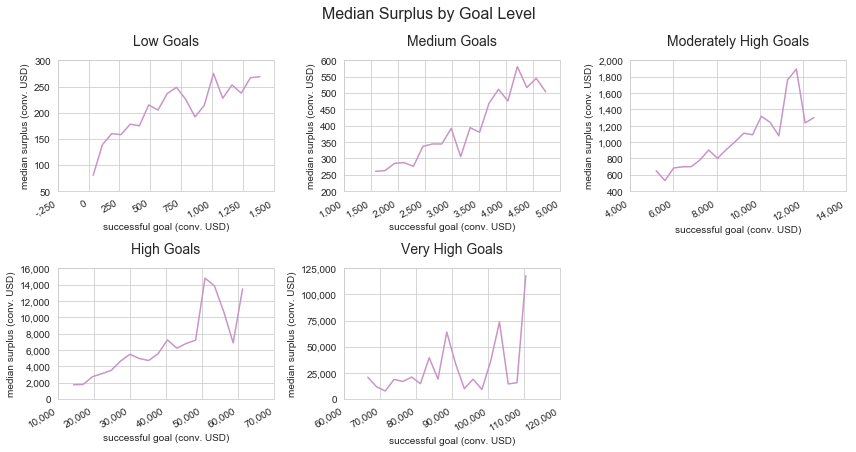

In [123]:
# settings
plt.figure(figsize=[12,6])

# facet by binned goals
for i, goal_level in enumerate([goal_level.lower() for goal_level in texts][:-1]):
    plt.subplot(2, 3, i+1)
    df = ks_compl_success[ks_compl_success['goal_level'] == goal_level]
    df_binned = binned_pledges(df, 20)
    plt.errorbar(x = df_binned['goal_bin'][:-1], y = df_binned['surplus'][:-1], color=pledged_color )    

    # ticks and labels
    plt.title(texts[i]+" Goals", fontsize=14, pad=15)
    
    locs, labels = plt.xticks()
    labels = [format_num(loc) for loc in locs]
    plt.xticks(locs, labels, rotation=30, ha='right')
    plt.xlabel("successful goal (conv. USD)")
 
    locs, labels = plt.yticks()
    labels = [format_num(loc) for loc in locs]
    plt.yticks(locs, labels)
    plt.ylabel("median surplus (conv. USD)")
    plt.tight_layout()    

plt.suptitle("Median Surplus by Goal Level", fontsize=16, y=1.04)
plt.show()


By working with the median surplus of binned goals, we smoothed the curve to eliminate the multi-modal character of funding.
Accordingly, the best chances to generate a high surplus are at:

- Low goals: USD 1k - 1.5k,
- Medium goals: USD 3k - 5k,
- Moderately high goals: USD 11k - 12k,
- High goals: USD 50k - 60k.

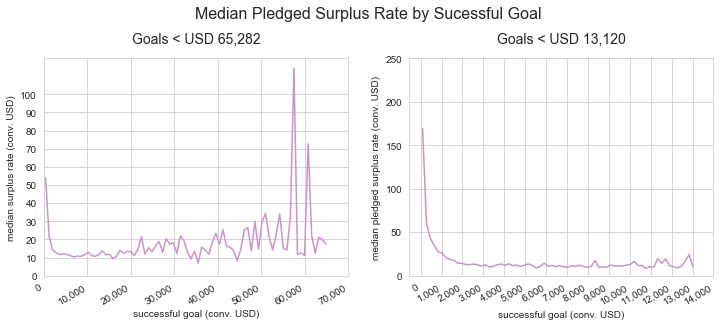

In [124]:
# settings
plt.figure(figsize=[12,4])

def binned_pledges(df, bin_count):
    # cluster goals
    bin_size = (df['goal_hist_usd'].max()-df['goal_hist_usd'].min()) / bin_count
    bin_edges = np.arange(df['goal_hist_usd'].min(), df['goal_hist_usd'].max()+bin_size, bin_size)
    bin_centers = bin_edges[:-1] + bin_size/2
    pd.set_option('mode.chained_assignment', None) # turn off warning
    df['goal_bin'] = pd.cut(df['goal_hist_usd'], bin_edges, labels=bin_centers)
    # calculate median surplus rate for every goal
    df_binned = df['surplus_r'].groupby([df.goal_bin]).median().reset_index()
    return df_binned

# left plot: binned median pledges and respective binned goals 
plt.subplot(1,2,1)
# for successfull campaigns with goals below 95%-quantile 
df_binned = binned_pledges(ks_goal_95_s, 80)
plt.errorbar(x = df_binned['goal_bin'], y = df_binned['surplus_r'], color=pledged_color ) 
plt.title("Goals < USD " + format_num(int(goal_95)), fontsize=14, pad=15)
    
locs = np.arange(0, 65000+10000, 10000)
labels = [str(format_num(loc)) for loc in locs]
plt.xticks(locs, labels, rotation=30, ha='right')
plt.xlabel("successful goal (conv. USD)")
plt.xlim(0, 70000)

plt.yticks(np.arange(0, 100+10, 10))
plt.ylabel("median surplus rate (conv. USD)")

# right plot: binned median pledges vs. respective binned goals: moderately high goals (50% quantile)
plt.subplot(1,2,2)
df_binned = binned_pledges(ks_compl_success[ks_compl_success.goal_hist_usd < goal_75], 70)
plt.errorbar(x = df_binned['goal_bin'], y = df_binned['surplus_r'], color=pledged_color ) 
plt.title("Goals < USD " + format_num(goal_75), fontsize=14, pad=15)
    
locs = np.arange(0, goal_75+1000, 1000)
labels = [str(format_num(loc)) for loc in locs]
plt.xticks(locs, labels, rotation=30, ha='right')
plt.xlabel("successful goal (conv. USD)")

format_yticks(250, 50)
plt.ylabel("median pledged surplus rate (conv. USD)")

plt.suptitle("Median Pledged Surplus Rate by Sucessful Goal", fontsize=16, y=1.06)
plt.show()


The plots illustrate that the surplus creators may generate depends on the chosen goal. Roughly, the surplus rate describes a u-form. For goals below USD 3k the surplus rate declines exponentially. The lower the goal chosen, the higher the surplus rate. 

Thereafter, the median surplus rate remains relatively constant at 11%. The surplus rates increase for goals beyond USD 18k. Towards high goals above USD 44k, the pledged surplus rates sharply increase. At the same time, the plot becomes more volatile with anomalous peaks getting extremer. However, this is hardly relevant, since 3 quarters of creators stick to goals below USD 13,000.  

**Does a goal affect the pledged amount of individual backers?**

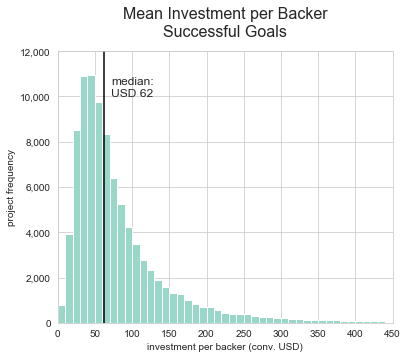

In [125]:
# settings
plt.figure(figsize=[6,5])

# calculate the pledged investment per backer
ks_compl['pledged_backer_r'] = ks_compl['pledged_hist_usd'] / ks_compl['backers_count']
ks_compl_95['pledged_backer_r'] = ks_compl_95['pledged_hist_usd'] / ks_compl_95['backers_count']
ks_compl_success = ks_compl[ks_compl.status == "successful"]

bin_edges = np.arange(0, ks_compl_success['pledged_backer_r'].max()+10, 10)
sns.distplot(ks_compl_success['pledged_backer_r'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1, 'color': '#99d8c9'})
plt.xlim(0, 450)

# annotate median
median_pledged = ks_compl_success['pledged_backer_r'].median()
plt.axvline(x=median_pledged, color='black')
plt.annotate("median:\nUSD " + format_num(median_pledged), xy=(median_pledged+10, 10000),fontsize=12)


# ticks and labels
plt.title("Mean Investment per Backer\nSuccessful Goals", fontsize=16, pad=15)
format_yticks(12000, 2000)
plt.ylabel("project frequency")
plt.xlabel("investment per backer (conv. USD)")

plt.show()

Only considering successful projects, backers pledged a median of USD 62. The investment per backer is strongly skewed towards higher pledges. Most individual pledges cluster between USD 25-50. Let's see how the scope of a goal affected how much each supporter invested.

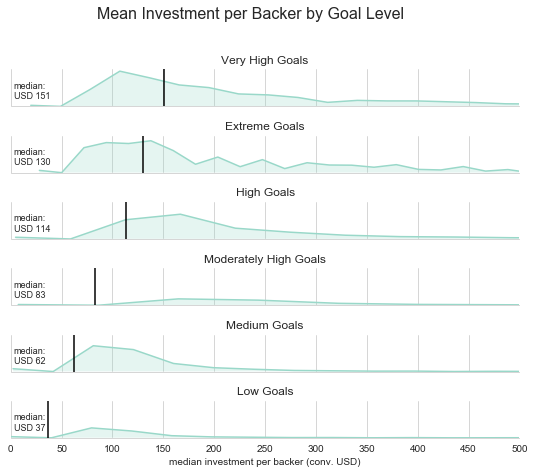

In [126]:
# calculate median per goal level
group_means = ks_compl_success.groupby(['goal_level']).median()
group_order = group_means.sort_values(['pledged_backer_r'], ascending = False).index[:-1]

# facet plots per goal levels 
g = sns.FacetGrid(data = ks_compl_success, row = 'goal_level', height = 1, aspect = 8,
                 row_order = group_order)

# plot distribution as kernel density estimate
g.map(sns.kdeplot, 'pledged_backer_r', shade = True, bw=0.1, color='#99d8c9')
plt.xlim(0, 500)

# annotate median per goal level
def vertical_mean_line(data, **kwargs):
    plt.axvline(data.median(),**kwargs)  
    plt.text(3, 0.001, "median:\nUSD " + format_num(data.median()), fontsize=9)
g.map(vertical_mean_line, 'pledged_backer_r',  color='black' )

# labels and ticks
for ax, title in zip(g.axes.flat, group_order):
    ax.set_title(title.title() + " Goals")

# remove the y-axes
g.set(yticks=[])
g.despine(left=True)

format_xticks(500, 50)
plt.xlabel("median investment per backer (conv. USD)")

plt.suptitle("Mean Investment per Backer by Goal Level", fontsize=16, y=1.09)
plt.show()

The higher the goal the higher was the average amount each supporter invested. For successful low goal projects (below USD 1.5k) the median pledged per backer was USD 37. Moderately high goals generate a median of USD 83. Successful very high goal projects generated the highest median funding per backer: USD 151. 

**Do project funding opportunities depend on the project type?**  

It makes only sense that the wide variety of projects on Kickstarter require different scopes of funding. A card game surely plays in a different investment league than a space mission.   

The question is whether different project categories are typically attributed with different scopes of funding. More importantly, I would like to know if supporters were willing to invest higher amounts if a project type typically required high funding.   

To depict the relationship, we are going to work on median numbers instead of funding ranges. We want to keep the plot neat to improve readability. 

In [127]:
# calculate median goals and create dataframe
def calc_med_goals_by(category):
    ks_cat_median = ks_compl.groupby(['status', category]).median()['goal_hist_usd']
    ks_cat_median = ks_cat_median.reset_index(name = 'goal_median')
    ks_cat_median = ks_cat_median.pivot(index = category, columns = 'status',
                            values = 'goal_median')
    ks_cat_median.rename(index=str, 
                     columns={'failed': 'med_goal_fail', 'successful': 'med_goal_success'}, 
                     inplace=True)
    # calculate median pledged
    med_cat_pledged = ks_compl.groupby(['status', category]).median()['pledged_hist_usd']
    med_cat_pledged = med_cat_pledged.reset_index(name = 'med_pledged')
    med_cat_pledged = med_cat_pledged.pivot(index = category, columns = 'status',
                            values = 'med_pledged')

    # add to dataframe
    ks_cat_median['med_pledged_fail'] = med_cat_pledged['failed']
    ks_cat_median['med_pledged_success'] = med_cat_pledged['successful']
    ks_cat_median = ks_cat_median.fillna(0).sort_values(by='med_pledged_success', ascending=True).reset_index()
    return  ks_cat_median
ks_cat_median = calc_med_goals_by('category')
ks_cat_median.head()

status category  med_goal_fail  med_goal_success  med_pledged_fail  \
0       Crafts  3,000.0        1,000.0           34.2834193923985    
1       Art     4,000.0        1,500.0           53.6904677640449    
2       Theater 5,000.0        3,000.0           85.0                
3       Dance   5,000.0        3,000.0           60.0                
4       Comics  5,000.0        2,500.0           227.0               

status  med_pledged_success  
0      1,957.5894006210215   
1      2,443.840216200004    
2      3,225.0               
3      3,526.0               
4      3,781.912748502413

Plot each category's median funding using a stacked bars. Compare the successful values to the values of failed projects by clustering the bars. 

In [128]:
# utility to plot clusterd/stacked bars of funding opportunities by category
def plot_funding_by(df, category, order):
    # settings
    funding = ['med_goal_success', 'med_pledged_success']
    color_greens = ['#99d8c9', '#1b9e77']
    baselines = np.zeros(len(order)) # set baseline of every barplot to zero 
    bars = []
    
    # horizontally plot goal by category first, then plot pledged surplus on top of goal 
    ax = plt.subplot(111)
    for i in range(2):
        amount = df[funding[i]]
        amount = list(amount - baselines) # subtract goal from pledges to calculate surplus
        bars += ax.barh(y=np.arange(0.2, len(order)+0.2), 
                 width=amount, left=baselines, 
                 color=sns.set_palette(color_greens), height=0.3)

        # add goal to baseline to plot next stack of bar
        baselines += amount

    # add median failed goals as horizontal bars 
    bars += ax.barh(y=np.arange(-0.12, len(order)-0.12), 
                 width=df['med_goal_fail'], 
                 color=cust_red, height=0.3) 

    # ticks and labels
    ylocs = np.arange(0, len(order), 1)
    plt.yticks(ylocs, order, fontsize=12)
    plt.ylabel("project category")
    format_xticks(df['med_pledged_success'].max(), 5000)
    plt.xlabel("median funding (convert. USD)")

    leg = plt.legend([bars[0], bars[1], bars[3]], 
                     ['median successful goals', 
                      'median pledged surplus', 
                      'median failed goals'], 
                     frameon=True, fontsize=10)
    leg.legendHandles[0].set_color(color_greens[0])
    leg.legendHandles[1].set_color(color_greens[1])
    leg.legendHandles[2].set_color(cust_red)

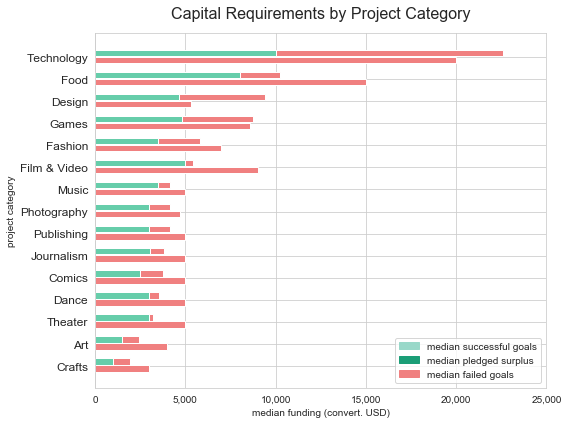

In [129]:
# settings
fig = plt.figure(figsize = [8, 6])
cat_order_asc = ks_cat_median.category.values

# plot median funding by project category
plot_funding_by(ks_cat_median, 'category', cat_order_asc)
plt.title("Capital Requirements by Project Category", fontsize=16, pad=15)
plt.tight_layout()
plt.show()

Technology, Food and Design projects on average require the highest funding: between USD 5k to 10k. Theater, Art and Crafts usually require low funding below USD 3k. 

Technology projects stand out with the highest median funding requirements of USD 10k. Failed Technology campaigns requested on average double. Even so, Technology projects seeking lower goals ultimately outbid failed goals. They collected median funding of USD 22.5k.

Most apparent for Food campaigns is the deficit of investments compared to the required funding goals. The median goal of failed projects was much higher than the average collected funding. Similarly, Film & Video productions tend to require funding capital above the supplied capital investment. 

Design projects makes the most balanced impression between failed and successful goals. The high pledged surplus over design goals presages a high demand of backers, resulting in a high median surplus.

The high investment requirements of Tech and Food projects may be one explanation for their low success rates.

In [130]:
# calulate median funding values of combined categories
ks_comb_cat_median = calc_med_goals_by('comb_cat')
ks_comb_cat_median.tail()

status                     comb_cat       med_goal_fail    med_goal_success  \
164     Film & Video/Movie Theaters 45,337.601077732215 29,129.516163050368   
165     Technology/3D Printing      17,265.957195821975 15,740.0              
166     Technology/Hardware         35,000.0            16,192.0              
167     Technology/Wearables        28,000.0            24,999.5              
168     Technology/Camera Equipment 22,722.526532318174 23,610.32930009085    

status    med_pledged_fail  med_pledged_success  
164    31.084500000531914  36,262.600000000006   
165    520.5115652981099   38,358.24200426369    
166    597.0304999825659   38,885.445            
167    664.9058966036991   47,789.0              
168    1,941.2260000275564 64,417.0

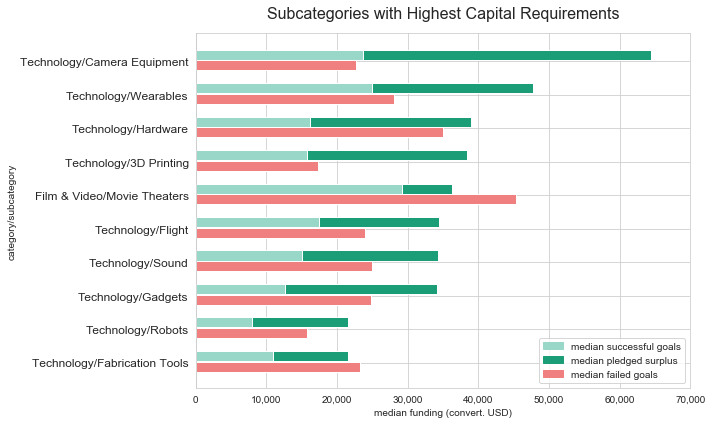

In [131]:
# settings
fig = plt.figure(figsize = [10, 6])
top_subcats = ks_comb_cat_median['comb_cat'].values[-10:]

# plot median funding by combined category
plot_funding_by(ks_comb_cat_median[-10:], 'comb_cat', top_subcats)

# labels and ticks
plt.title("Subcategories with Highest Capital Requirements", fontsize=16, pad=15)
plt.ylabel("category/subcategory")
format_xticks(ks_comb_cat_median['med_pledged_success'].max(), 10000)
plt.tight_layout()
plt.show()

Tech projects dominate in the top categories of high capital requirements. Camera Equipment by far attracted the highest median pledges, followed by Wearables. Both types of projects realized a strong surplus above goals. On average camera equipment campaigns collected the most impressive funding of USD 65k. 

It's remarkable that mostly hardware appliances are among projects with the highest capital requirements. Movie Theaters seem to regularly require the highest median capital requirements, but stay behind tech projects in terms of the total collected funding.

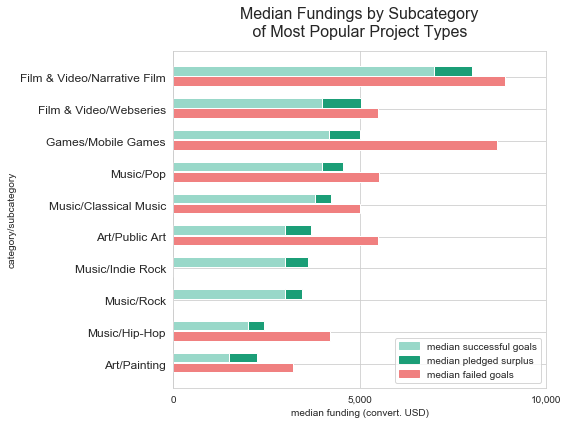

In [132]:
# settings
fig = plt.figure(figsize = [8, 6])
df_pop_subcats = ks_comb_cat_median[ks_comb_cat_median.comb_cat.isin(pop_subcats)].reset_index(drop=True)
order = df_pop_subcats['comb_cat'].values

# plot median funding by combined category
plot_funding_by(df_pop_subcats, 'comb_cat', order)

# labels and ticks
plt.title("Median Fundings by Subcategory\n of Most Popular Project Types ", fontsize=16, pad=15)
plt.ylabel("category/subcategory")
plt.tight_layout()
plt.show()

Apart Narrative Films, the most popular Kickstarter projects sought relatively low funding goals below USD 5k. 

**Which project categories were worthwhile to run?**

I previously analyzed the popularity of project types, their funding requirements and success rates. Now, I am prepared to evaluate how well categories performed.    

For investment seekers success rates of categories and the potential funding opportunities are important. Thus, I am going to depict the pledged median funding against the success rate for each category. 

In [133]:
# utility to add success rates to data frame
def calc_cat_success(cat, df=ks_compl):
    success = df.groupby([cat,'status']).count()['project_id']
    success = success.reset_index(name='count')
    success = success.pivot(index=cat, columns='status', values='count')
    success = success.reset_index()
    # divide failed and success columns by category counts
    for status in ['failed', 'successful']:
        success[status] = (success[status] / df.groupby([cat]).count()['project_id'].values)*100
    return success

In [134]:
# add success rates to our data frame
df_cat_success = calc_cat_success('category')
ks_cat_median = ks_cat_median.merge(df_cat_success, on='category')

In [135]:
# utility function to plot multivariate plot of 2 numerical and 1 quantitative variable
def plot_facet_scatter_by(df, cat, headline, quadrants=True):
    g = sns.FacetGrid(data = df, hue = cat, height = 5, palette=category_colors)
    g.map(plt.scatter, 'successful', 'med_pledged_success')
    success_median = ks_cat_median['successful'].median()
    pledged_median = ks_cat_median['med_pledged_success'].median()
    
    ax = g.axes[0]
    if quadrants:
    # divide axis into 4 squares using a median
        ax[0].axvline(success_median, ls='--', label='median')
        ax[0].axhline(pledged_median, ls='--')

    # labels and ticks
    plt.title("Pledges by Success Rates\n" + headline, fontsize=16, pad=15)
    xlocs = np.arange(0, 100+10, 10)
    plt.xticks(xlocs)
    plt.xlabel("------ median success chances (%) ------>")
    format_yticks(df['med_pledged_success'].max(),2500)
    plt.ylabel("------ median pledged (convert. USD) ------>")

    leg = ax[0].legend(loc=1, bbox_to_anchor=(1.4, 1))
    leg.set_title('')
    plt.show()
    return g

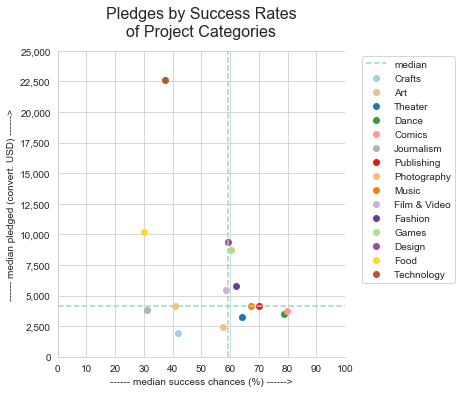

In [136]:
# plot pledged investment and success chance in a faceted scatterplot for each category
plot_facet_scatter_by(ks_cat_median, 'category', "of Project Categories");

The categories located in the upper right square imply the best chances for creators. Design and Game projects have high chances of success and realize a comparatively high median funding. Tech and food projects usually collected the highest investments, yet success chances were among the lowest. 

Projects categories found in the lower right quadrant have high chances to run successfully, but usually don't collect large investments. This is especially true for Comics and Dance ventures. However, creators may judge themselves how much funding they required to launch a project successfully.

Journalism, Crafts and Photography perform weakest in terms of chances and the collected funding. 
Let's plot a similar scatter plot for the most popular subcategories.

In [137]:
# add success rates to our data frame
df_comb_cat_success = calc_cat_success('comb_cat')
ks_comb_cat_median = ks_comb_cat_median.merge(df_comb_cat_success, on='comb_cat')

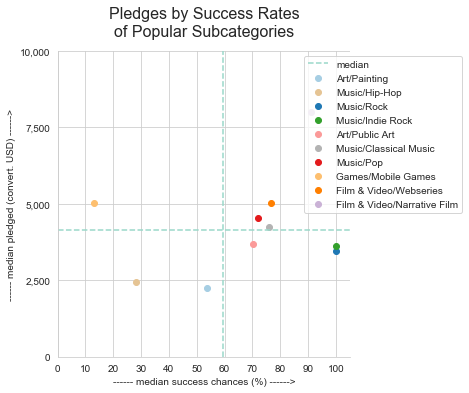

In [138]:
# filter by popular categories 
df_pop_subcats = ks_comb_cat_median[ks_comb_cat_median.comb_cat.isin(pop_subcats)].reset_index(drop=True)
# analyse most popular subcategories by median pledges and success rates
plot_facet_scatter_by(df_pop_subcats, 'comb_cat', "of Popular Subcategories");

The 10 most popular subcategories performed comparatively weak. Webseries, Pop Music and Classical Music fall into the upper right quadrant. They on average realize funding of just below USD 5k. 

Indie Rock and Rock Musik were the safest bets with 100% success chances. 

Mobile Games and Hip-Hop Music were among the most popular categories. Nevertheless, both categories were usually not rewarding the creator with high success chances, nor high funding.

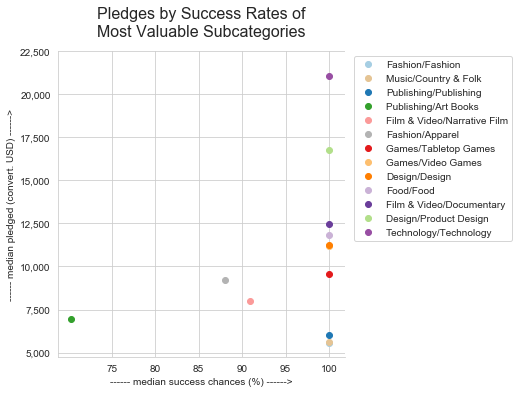

In [168]:
# filter by best conditions
df_best_types = ks_comb_cat_median[ks_comb_cat_median['med_pledged_success'] >= 5500]
df_best_types = df_best_types[df_best_types.successful > 70]
# identify best subcategories by median pledges and success rates
g = sns.FacetGrid(data = df_best_types, hue = 'comb_cat', height = 5, palette=category_colors);
g.map(plt.scatter, 'successful', 'med_pledged_success')

# labels and ticks
plt.title("Pledges by Success Rates of\nMost Valuable Subcategories", fontsize=16, pad=15)
format_xticks(100, 5, 75)
plt.xlabel("------ median success chances (%) ------>")
format_yticks(df_best_types['med_pledged_success'].max(), 2500, 5000)
plt.ylabel("------ median pledged (convert. USD) ------>")

plt.legend(loc=1, bbox_to_anchor=(1.6, 1))
plt.show()

### Summary Funding

When creators decide on a goal, they generally have to consider whether to maximize their chances to successfully finish a campaign or to generate the maximum funding possible. Both targets oppose each other diametrically. Increasing the goal typically decreases the chances for success. Simultaneously, creators risk insufficient funding by aiming for low goals.  

If creators want to keep at least a 50% chance, it appears to be advisable to stay below goals of USD 10k. On average goals below 5k had a chance of above 60%. 

Very risk averse creators may stick to low goals below USD 1,5k. Interestingly, low goal projects typically generated a surplus of 37% above goal. At the same time goals between USD {{format_num(goal_25)}} to USD {{format_num(goal_75)}} only generate a median surplus of 11/12%. Therefore, the loss in the total funding by setting low goals may be tolerable in exchange for better chances of success.   

The function of the surplus rate of the pledged investment above goal describes a slow growing trend. However, there are two significant anomalies. First of all, up until USD 3k the surplus rate describes is sharply decreasing. This explains the relatively high surplus generated by low goals. Second, goals above USD 18k have increasing surplus rates. Towards high goals above USD 45k, the pledged surplus rate grows steeper. At the same time, the plot becomes more volatile with anomalous peaks.

The goal not only influenced success chances, but also how much every supporter was contributing. The higher the goal, the higher was the amount pledged per backer. On average supporters pledged USD 37 for goals below USD {{format_num(pledged_95)}}, but invested a fourfold for very high goals. Creators may consider this behavior when defining the rewards for pledges.  

Creators seeking high funding may consider alternative investment possibilities to Kickstarter. 95% of all successful projects kept below contributions of USD {{format_num(pledged_95)}}. At the same time success chances were very low for very high goal projects of USD {{format_num(goal_95)}} to {{format_num(goal_975)}} : only 20% of campaigns ended in success. For even higher goals, success chances dropped to nearly zero.     

The investment capacity was strongly determined by the project type. Generally, tech and food projects required the highest average funding of USD 15k. Tech projects realized the highest median pledges of plus USD 22k. The lowest capital requirements had Art and Craft project, which realized a median USD 2.5k.

Tech and food projects realized the high investments and were the most likely to fail.

By filtering subcategories by the highest success rates and pledges, we found the most valuable categories were:   

1) technology projects without defined subcategory,   
2) product design projects and  
3) documentary films.  

The most disappointing projects were of the type:   

1) mobile games,  
2) Hip-Hop music and  
3) generally journalistic projects.  


### Duration

The univariate plot of duration above tells us that a funding duration of 30 days was most common. Let's see if 30 days has always been the standard.

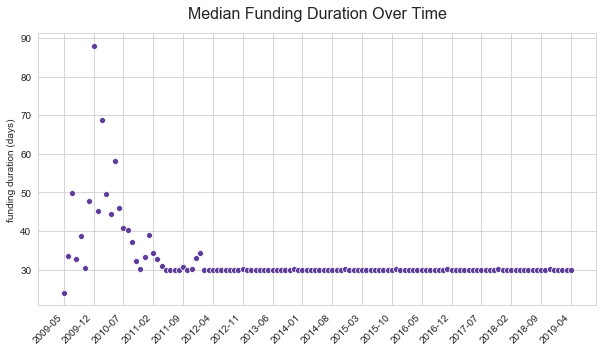

In [140]:
# calculate monthly median duration of completed projects
# total
duration_grouped = ks_compl.groupby([ks_compl.deadline.dt.year, 
                                    ks_compl.deadline.dt.month])['duration_days'].median().values
# success
duration_grouped_s = ks_compl_success.groupby([ks_compl_success.deadline.dt.year, 
                                    ks_compl_success.deadline.dt.month])['duration_days'].median().values
# failed
duration_grouped_f= ks_compl_failed.groupby([ks_compl_failed.deadline.dt.year, 
                                    ks_compl_failed.deadline.dt.month])['duration_days'].median().values
# insert 0 occurence for 2009-6
duration_grouped_f = np.insert(duration_grouped_f,1,0) 

# create dataframe
df_duration = pd.DataFrame(data={'total': duration_grouped, 
                                'success':duration_grouped_s, 
                                'failed': duration_grouped_f, 
                                'date': np.arange(0, len(duration_grouped), 1)})
# settings
plt.figure(figsize=[10,5])

# scatterplot of median duration over days
ax = sns.scatterplot(x=df_duration['date'], y=df_duration['total'], 
                     color='#5e3c99');

# ticks and labels
timeline_ticks(df_duration)
plt.ylabel("funding duration (days)")
plt.title("Median Funding Duration Over Time", fontsize=16, pad=15)
plt.xlabel("")

plt.show()

Obviously, there was not much discrepancy in the funding duration over time. Only in the first two years creators were experimenting with the length of a funding durations. Two years after Kickstarter's launch, it became general practice to run the funding within 30 days. Nevertheless, it would make sense that a longer period may result in improved chances of success, especially for founders who require high investments.

**Does a longer funding period increase the chances of success?** 

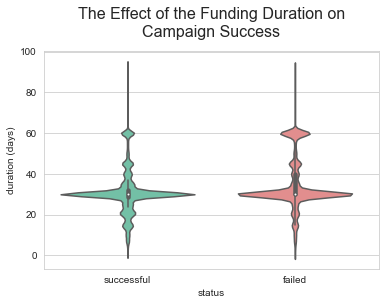

In [141]:
# settings
color=sns.set_palette(status_colors[1:])

# Use violinplots to depict duration converted days. Separate completed projects by status  
ax = sns.violinplot(ks_compl.status, (ks_compl.duration.astype('timedelta64[h]') / 24), 
                    order=['successful', 'failed'], color = color)
# labels and titles
plt.title("The Effect of the Funding Duration on\nCampaign Success", fontsize=16, pad=15 )
plt.ylabel('duration (days)')

plt.show()

The above distribution of the duration of the funding shows that there is generally not a big difference between successful and failed campaigns. The median duration and most occurrences are around 30 days. For successful campaigns, the distribution below 30 days is a little wider than for failed campaigns. The distribution of failed campaigns reveals comparatively more occurrences of longer durations, especially at 60 days. Also, the inner quartiles and whiskers of failed campaigns seem to be skewed upward. Let's plot this relationship in a boxplot separately next.

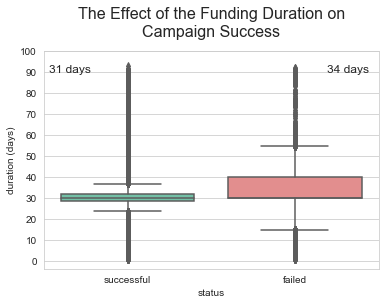

In [142]:
# Use violinplot to depict duration converted days. Separate completed projects by status
ax = sns.boxplot(ks_compl.status, (ks_compl.duration.astype('timedelta64[h]') / 24), 
                order=['successful', 'failed'], color = color)

# calculate means
dur_mean_fail  = (ks_compl[ks_compl.status == "failed"]['duration'].astype('timedelta64[h]') / 24).mean()
dur_mean_success  = (ks_compl[ks_compl.status == "successful"]['duration'].astype('timedelta64[h]') / 24).mean() 

# annotate
ax.annotate(str(int(dur_mean_fail)) + " days", xy=(1.19, 90), fontsize=12)
ax.annotate(str(int(dur_mean_success)) + " days", xy=(-0.47, 90), fontsize=12)

# labels and titles
plt.title("The Effect of the Funding Duration on\nCampaign Success", fontsize=16, pad=15 )
plt.ylabel('duration (days)')
format_yticks(100, 10)
plt.show()

The box plot approach appears to be a better choice to answer if a longer funding period may increase success chances of campaigns. While the median funding of both successful and failed campaigns, was 30 days, the mean of successful was 31 days, while failed campaigns ran 3 days longer. Particularly, the upper interquartile goes up to 40 days and the tail up to 55 days. At the same time, funding periods of successful campaigns above 38 days were a rarity.

However, we already found that creators seeking higher goals were less likely to succeed. Let's factor in goals next to find out whether high goal projects have a better chance to succeed if they add time to their campaign.

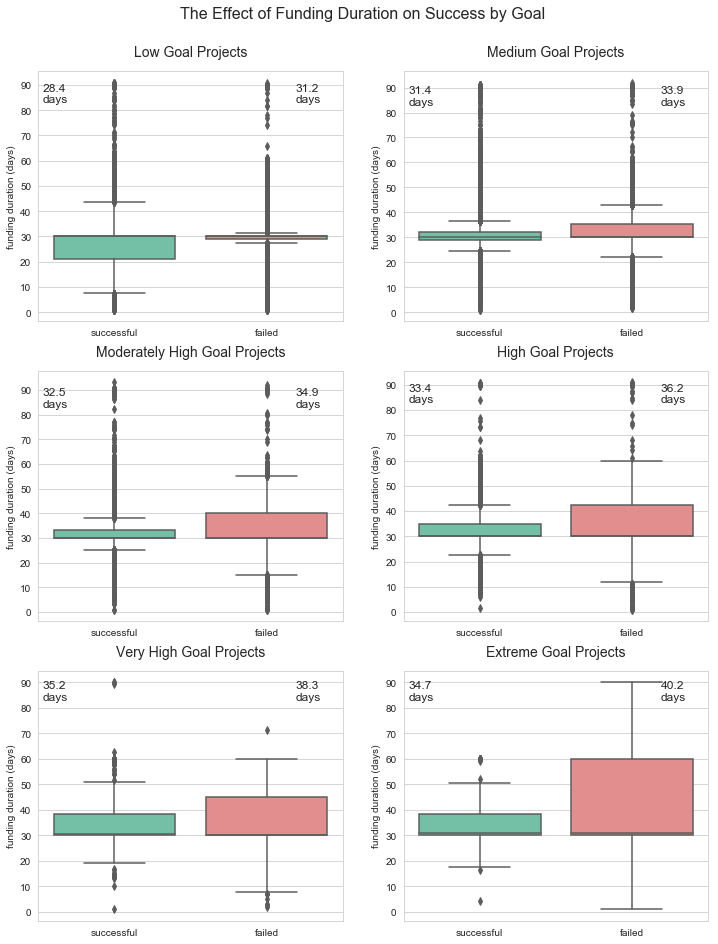

In [143]:
# settings
plt.figure(figsize=[12,10])

# facet plot by goals to depict the effect of duration on projects 
for i, df in enumerate(ks_goal_leveled):
    # faceted boxplots
    plt.subplot(3, 2, i+1)
    ax = sns.boxplot(df.status, (df.duration.astype('timedelta64[h]') / 24), 
                order=['successful', 'failed'], color = color)
    # calculate mean
    dur_mean_fail  = (df[df.status == "failed"]['duration'].astype('timedelta64[h]') / 24).mean()
    dur_mean_success  = (df[df.status == "successful"]['duration'].astype('timedelta64[h]') / 24).mean() 
    
    #annotate
    ax.annotate(str(round(dur_mean_fail, 1))+ "\ndays", xy=(1.19, 83), fontsize=12)
    ax.annotate(str(round(dur_mean_success, 1))+ "\ndays", xy=(-0.47, 83), fontsize=12)
    plt.title(texts[i]+" Goal Projects", fontsize=14, pad=15 )
    
    # labels and ticks
    plt.ylabel('funding duration (days)')
    plt.xlabel('')
    plt.subplots_adjust(bottom=-0.3)
    format_yticks(90, 10)
plt.suptitle("The Effect of Funding Duration on Success by Goal", fontsize=16, y=0.97)
plt.show()

Clearly, the funding duration changed according to the goal. The higher the goal, the longer was the mean funding duration. The most occurrences, however, remain around 30 days independently from the funding ambitions and result of the campaign.

No matter how high the funding goal, successful projects on average scheduled shorter funding periods.

The duration difference between projects seeking below USD {{goal_25}} and above USD {{format_num(goal_95)}} was surprisingly short. Successful low goal projects on average sought funding within 28 days, while very high goal projects only took a week longer: 35 days.

While the above boxplots give us a general notion about duration and success, I am curious if we find more meaningful information about success rates for each funding duration. Below, I'm going to choose a line plot approach by binning duration periods and calculating their success rates. To balance out the success differences caused by the scope of a goal, I'm going to divide the plot in projects with goals above and below the 75% quantile.  

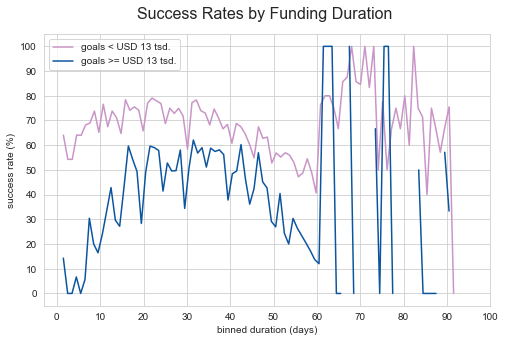

In [144]:
# settings
plt.figure(figsize=[8,5])

# utility to cluster duration
def binned_duration(df, bin_count):
    # cluster duration
    bin_size = (df['duration_days'].max()-df['duration_days'].min()) / bin_count
    bin_edges = np.arange(df['duration_days'].min(), df['duration_days'].max()+bin_size, bin_size)
    bin_centers = bin_edges[:-1] + bin_size/2
    pd.set_option('mode.chained_assignment', None) # turn off warning
    df['duration_bin'] = pd.cut(df['duration_days'], bin_edges, labels=bin_centers)
    return df

# calculate success rate for every bin and plot
def plot_success_r(df_binned):
    # calculate success rate for every bin
    success_r = (df_binned[df_binned.status == 'successful']['duration_bin'].value_counts(sort=False)\
                 / df_binned['duration_bin'].value_counts(sort=False)*100).values
    plt.errorbar(x = df_binned['duration_bin'].value_counts(sort=False).index, 
                 y = success_r, color=sns.set_palette([pledged_color, goal_color]))

# plot low to moderately high goals
df_duration_binned = binned_duration(ks_compl[ks_compl.goal_hist_usd < goal_75], 90)
plot_success_r(df_duration_binned)

# plot rate above moderately high goals
df_duration_binned = binned_duration(ks_compl[ks_compl.goal_hist_usd >= goal_75], 90)
plot_success_r(df_duration_binned)

# ticks and labels
plt.title("Success Rates by Funding Duration ", fontsize=16, pad=15)
plt.xticks(np.arange(0, 100+1, 10))
plt.xlabel("binned duration (days)")
plt.yticks(np.arange(0, 100+1, 10))
plt.ylabel("success rate (%)")
plt.legend(['goals < USD 13 tsd.', 'goals >= USD 13 tsd.'])
plt.show()

### Summary Duration

I cannot confirm that higher funding durations are generally rewarded with higher success rates. No matter if a campaign was successful or failed, the median period was generally around 30 days. We found that success rates generally peaked for a period of 30 days.  

Adding the level of the goal to my investigation revealed that average funding durations appear to be a little longer when the goals were higher. Successful low goals under USD {{format_num(goal_25)}} had a mean funding duration of 28 days. Successful very high goal projects between USD {{format_num(goal_75)}} to {{format_num(goal_95)}} ran on average a week longer (35 days). 

We found that the highest and most constant success chances were between 15 to 35 days for projects below USD {{format_num(goal_75)}}. We know that success chances are generally lower for higher goals. Nevertheless, we observe that creators of higher goal projects can extend their funding duration up to 48 days without losing significant success chances. 

There is a severe dent in success rates at the duration of 30 days. Despite using relative numbers, this may be attributed to the unequivocal popularity of 30 day periods. This assumption is supported by the regular recessions that appear in duration intervals of 5 (e.g. 15, 20, 25 periods). Those periods appear to be most common. It may be worthwhile to further investigate whether creators can increase their success chances by shortening or prolonging the 30 days period by roughly 1-2 days. However, this would go beyond this visual analysis.

60 days funding durations were also quite popular. Unfortunately, they were attributed with the highest failure rates, especially for higher goal projects. Interestingly, for periods longer than 60 days, success rates increase up to roughly 90-100%. However, keep in mind that the project counts of long funding durations were very uncommon: only 24 projects had a funding duration of 70 days.

## Seasons

Throughout this investigation, we came again and again across seasonal fluctuations. The plot below highlights the differences in absolute project counts throughout the past years 2014 - 2019. 

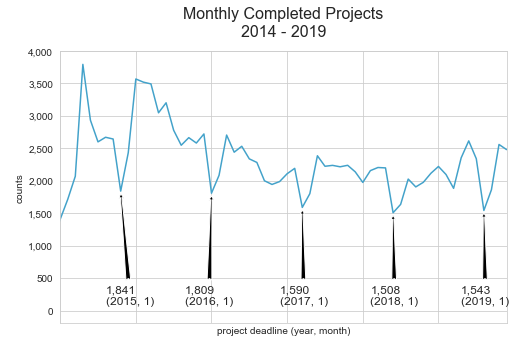

In [145]:
# settings
plt.figure(figsize=[8,5])

# count projects ending by month
df = ks_compl.project_id.groupby([ks_compl.deadline.dt.year, ks_compl.deadline.dt.month]).count()

# line plot of project counts
ax = df.plot(color=cust_blue)

#zoom into year 
plt.xlim(60, 119)

# find minima
ymins = [df.xs(year).values.min() for year in range (2014, 2020)]
xmins = [df.iloc[df.values == ymin].index[0] for ymin in ymins]

# annotate minima
ax.annotate(format_num(ymins[0]) + "\n" + str(xmins[0]), xy=(56, ymins[0]), 
            xytext=(53,100), fontsize=12,
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ax.annotate(format_num(ymins[1]) + "\n" + str(xmins[1]), xy=(68, ymins[1]-10), 
            xytext=(66,100), fontsize=12,
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ax.annotate(format_num(ymins[2]) + "\n" + str(xmins[2]), xy=(80, ymins[2]-10), 
            xytext=(76.5,100), fontsize=12,
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ax.annotate(format_num(ymins[3]) + "\n" + str(xmins[3]), xy=(92, ymins[3]-10), 
            xytext=(89,100), fontsize=12,
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ax.annotate(format_num(ymins[4]) + "\n" + str(xmins[4]), xy=(104, ymins[4]-10), 
            xytext=(101,100),  fontsize=12,
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# In the year 2019, we found April to be the minima. Since, I want to depict the January low, i have to pick January manually. 
ax.annotate(format_num(df.xs(2019).values[0]) + "\n(2019, 1)", xy=(116, df.xs(2019).values[0]-10), 
            xytext=(113,100), fontsize=12,
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# labels and titles
plt.title("Monthly Completed Projects\n2014 - 2019", fontsize=16, pad=15)
plt.xlabel('project deadline (year, month)')

# turn off ticks
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

format_yticks(4000, 500)
plt.ylabel("counts")

plt.show()

The project counts dropped dramatically, every year in January by roughly 500 campaigns. This may be caused by the behavior of project creators by not running campaigns or creating campaigns which do not appeal to the audience. Additionally, potential supporters may be less willing to pledge in January. 

I'm going to start the analysis of seasonal effects by investigating success and failure rates. Than, I'm going into detail about the general user behavior throughout the year to find out whether seasonal changes affected the final collected funding.

With project numbers stabilizing by the end of 2014, I'm going to consider for the following analysis only values after 2015.

**What time of the year is related with the best chances for success?**

In [146]:
# Investigate failure and success rates on a monthly bases

# only consider data after 2015 to today - April 2019
ks_15_19  = ks_compl[ks_compl.deadline.dt.year > 2014 ] 

# count projects ending each month
counts =  ks_15_19.deadline.groupby([ks_15_19.deadline.dt.month]).count()

# get average by dividing Jan-Apr months by 5 other months by 4 
proj_counts = [count / 5 for count in counts[:4]] + [count / 4 for count in counts[4:]]

# calculate average monthly project counts of successful and failed projects 
df_success_15  = ks_15_19[ks_15_19.status == "successful"]
counts =  df_success_15.deadline.groupby([df_success_15.deadline.dt.month]).count()
success_proj_counts = [count / 5 for count in counts[:4]] + [count / 4 for count in counts[4:]]

df_fail_15  = ks_15_19[ks_15_19.status == "failed"]
counts =  df_fail_15.deadline.groupby([df_fail_15.deadline.dt.month]).count()
failed_proj_counts = [count / 5 for count in counts[:4]] + [count / 4 for count in counts[4:]]

# create combined dataframe
ks_months = pd.DataFrame({'avg_total': proj_counts, 'avg_success': success_proj_counts, 'avg_failed': failed_proj_counts})

# As the interesting behavior is happening in January, I want to shift January to the middle of the plot.
# Rearange ordering so that July is at the frst place
ks_months_sorted = ks_months[6:].append(ks_months[:6]).reset_index(drop=True)
ks_months_sorted.head()

avg_total  avg_success  avg_failed
0 2,486.25   1,241.0      1,245.25   
1 2,253.75   1,138.25     1,115.5    
2 2,087.75   1,050.0      1,037.75   
3 2,291.0    1,242.0      1,049.0    
4 2,377.75   1,343.5      1,034.25

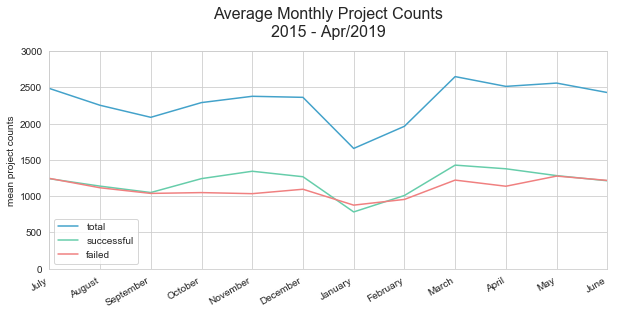

In [147]:
# plot
ax = ks_months_sorted.plot(color=sns.set_palette(status_colors));

# figure settings
fig = plt.gcf();
fig.set_size_inches(10, 4);

# ticks and labels
xlocs = np.arange(0,12)
plt.xticks(xlocs, months, rotation=30, ha='right');

ylocs = np.arange(0, 3000+500, 500)
ylabels = [format_num(yloc) for yloc in ylocs]
ax.set_yticks(ylocs, ylabels)

plt.ylabel("mean project counts");
plt.title("Average Monthly Project Counts\n2015 - Apr/2019", fontsize=16, pad=15)

plt.legend(['total', 'successful', 'failed'], loc=3)
plt.show()

In terms of absolute counts by month, in January successful campaigns on average dropped below the number of failed campaigns. In September project counts were also lower than usual. In contrast to January, successful and failed campaigns uniformly decreased. 

In March, we find the highest mean counts of successful campaigns. November, October, December and May were also popular months to launch projects. March and November seem to be have the widest gap between successful and failed campaigns. To prove this, we are going to calculate the proportion of successful and failed campaigns of the total of all campaigns. 

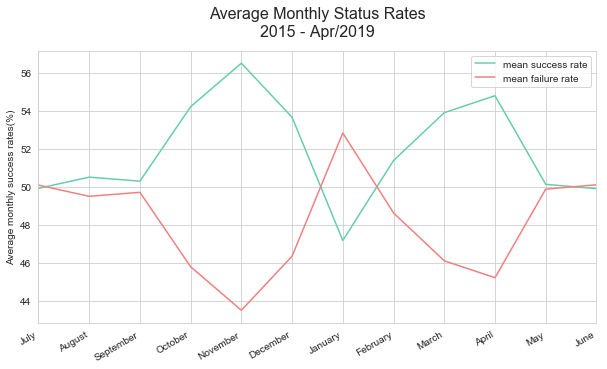

In [148]:
# create new columns of avg monthly avg success and failure rates 
ks_months_sorted['success_r'] = [ks_months_sorted.iloc[i][1] *100/ ks_months_sorted.iloc[i][0] for i in range(12)]
ks_months_sorted['failure_r'] = [ks_months_sorted.iloc[i][2] *100/ ks_months_sorted.iloc[i][0] for i in range(12)]

# plot
ax = ks_months_sorted[['success_r', 'failure_r']].plot(color=sns.set_palette(status_colors[1:]))

# figure settings
fig = plt.gcf();
fig.set_size_inches(10, 5);

plt.xticks(xlocs, months, rotation=30, ha='right');

plt.ylabel("Average monthly success rates(%)");
plt.title("Average Monthly Status Rates\n2015 - Apr/2019", fontsize=16, pad=15);
plt.legend(['mean success rate', 'mean failure rate'])
plt.show();

The plot above proves that November was attributed with the best chances. 56% of campaigns ended in success. April and March followed with success rates around 54%. 

January was definitely the least successful month to end a campaign. On average, more than every second campaign failed (53%). September, February, May, June and July were not the best months to end a campaign, but the success chances were still above 50%.

In addition to the chances for success, a campaign creator's main goal is to seek the highest amount possible to start their venture. Hence, I am going to determine whether the amount of investments creators collected changed according to the time of year.

**Are supporters more likely to pledge in a certain time of year?**

In [149]:
# we are going to work with our 95-quantile data to allow reasonable interpretation

# select only projects from 2015 on
ks_compl_95_latest  = ks_compl_95[ks_compl_95.deadline.dt.year > 2014 ]
ks_compl_95_latest_s  = ks_compl_95_latest[ks_compl_95_latest.status == "successful"]
ks_compl_95_latest_f  = ks_compl_95_latest[ks_compl_95_latest.status == "failed"]
print(f"After 2014:\n\
Project count total: {format_num(len(ks_compl_95_latest))}\n\
Project count success: {format_num(len(ks_compl_95_latest_s))}\n\
Project count failed: {format_num(len(ks_compl_95_latest_f))}")

After 2014:
Project count total: 105,438
Project count success: 54,041
Project count failed: 51,397


In [150]:
# utility function to create a median values of specific features grouped by months
def group_data(df, feature):
    # select by successful and failed projects
    df_s  = df[df.status == "successful"]
    df_f  = df[df.status == "failed"]
    
    # Due to strong skew, I use median instead of average to calculate the number of backers
    feat_total = df[feature].groupby([df.deadline.dt.month]).median()
    feat_success = df_s[feature].groupby([df_s.deadline.dt.month]).median()
    feat_fail = df_f[feature].groupby([df_f.deadline.dt.month]).median()

    # create data frame
    df_months_95 = pd.DataFrame({'total': feat_total.values, 
                                 'successful': feat_success.values, 
                                 'failed': feat_fail.values})

    # change order of data, bring January to center position
    return df_months_95[6:].append(df_months_95[:6]).reset_index(drop=True)

# utility function to plot features grouped by months
def plot_monthly(df):
    # color settings
    cust_color = ['green', 'black', 'red']

    # plot
    ax = df[['successful', 'total', 'failed']].plot(color=sns.set_palette(cust_color))

    # highlight differences
    x_ticks = np.arange(0, len(ks_months_95_sorted))
    y1 = df['successful']
    y2 = df['total']
    y3 = df['failed']
    ax.fill_between(x_ticks, y1, y2 , where=y1 >= y2, facecolor=fill_green, interpolate=True)
    ax.fill_between(x_ticks, y2, y3 , where=y2 >= y3, facecolor=fill_red, interpolate=True)

    # figure settings
    fig = plt.gcf();
    fig.set_size_inches(8, 5);

    # ticks and labels
    plt.xticks(xlocs, months, rotation=30, ha='right');
    
    return ax

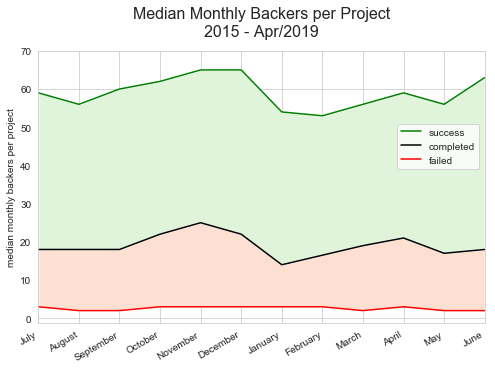

In [151]:
# plot median backers counts per projects for each month 
ks_months_95_sorted = group_data(ks_compl_95_latest, 'backers_count')
ax = plot_monthly(ks_months_95_sorted)

# ticks and labels
plt.yticks(np.arange(0, 70+10, 10))
plt.ylabel("median monthly backers per project");
plt.title("Median Monthly Backers per Project\n2015 - Apr/2019", fontsize=16, pad=15);
plt.legend(["success", "completed", "failed" ], loc=1,  bbox_to_anchor=(0.999, 0.75))
plt.show();

To start, I plotted the relative amount of backers per completed project, grouped by months. The median amount of backers peaked in November for all completed projects. Only considering successful projects resulted in November, December and June as the months with increased chances. The lowest number of supporters per project were commonly in February and January.  

Unlike success rates, we don't find strong peaks in March/April, but in June/July. Also, having the strongest recession of backers in February, contradicts the increased success rates in February. 

Insofar the success of projects is further determined by the amount every individual supporter invests and by the amount a creator seeks for funding. 

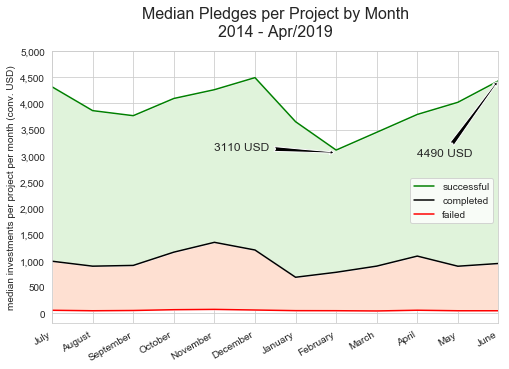

In [152]:
# plot median amount pledged per project by month
ks_months_95_sorted = group_data(ks_compl_95_latest, 'pledged_hist_usd')
ax = plot_monthly(ks_months_95_sorted)

# annotate
# maximum success
max_success = int(round(ks_months_95_sorted.successful.values.max()))
ax.annotate(str(max_success) + " USD", fontsize=12, xy=(11 , max_success - 50), 
            xytext=(9, max_success-1500), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# min success
min_success =int(round(ks_months_95_sorted.successful.values.min()))
ax.annotate(str(min_success) + " USD", fontsize=12, xy=(7, min_success - 50), 
            xytext=(4, min_success), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
format_yticks(5000, 500)
plt.ylabel("median investments per project per month (conv. USD)");
plt.title("Median Pledges per Project by Month\n2014 - Apr/2019", fontsize=16, pad=15);
plt.legend(["successful", "completed", "failed" ], loc=1,  bbox_to_anchor=(1, 0.55))
plt.show();

The pledged funding per project seems to be lagging by one month compared to success rates. On average, creators collected the lowest amount of funding in February (USD {{min_success}}), whereas the success rates were lowest in January. 

The highest median investments were collected in June: USD {{max_success}}. Creators who ran a campaign ending in June on average collected {{round((4507-3112) / 3112 * 100)}} % more compared to February. In absolute numbers, this is USD {{max_success-min_success}}. At the same time, chances of success in June were comparatively low. 

December was the second best month to collect high funding. Again, pledges are lagging behind success rates, which peaked in November. 

Whereas March had quite high success rates, the collected funding was even lower than in January. 

Considering both, success rates and the total investment collected, we see most potential in the months October/November/December. On the other hand, January, February and September performed worst.

Absolute counts, success rates, pledges and backers show similarities, but their behavior does not fully coincide. Therefore, we suspect multiple factors to influence seasonal fluctuations.

One assumption is that an individual backer's willingness to pledge changes over a year. Let's plot the median pledged per backer for each project.

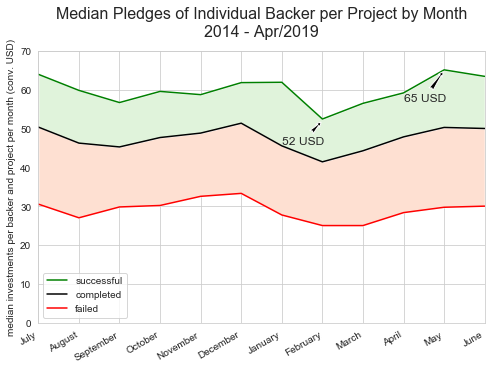

In [153]:
# Investigate pledges per backer and project per each month
ks_months_95_sorted = group_data(ks_compl_95_latest, 'pledged_backer_r')
ax = plot_monthly(ks_months_95_sorted)

# annotate
# maximum success
max_success = int(round(ks_months_95_sorted.successful.values.max()))
ax.annotate(str(max_success) + " USD", fontsize=12, xy=(10 , max_success), 
            xytext=(9, max_success-8), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# min success
min_success =int(round(ks_months_95_sorted.successful.values.min()))
ax.annotate(str(min_success) + " USD", fontsize=12, xy=(7, min_success), 
            xytext=(6, min_success-6), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
ylocs = np.arange(0, 70+10, 10)
ylabels = [format_num(yloc) for yloc in ylocs] 
plt.yticks(ylocs, ylabels)
plt.ylabel("median investments per backer and project per month (conv. USD)");

plt.title("Median Pledges of Individual Backer per Project by Month\n2014 - Apr/2019", fontsize=16, pad=15);
plt.legend(["successful", "completed", "failed"])
plt.show();

Individual supporters backed the highest amounts per project in May and the lowest amounts in February. The difference between both months was USD 13 per pledge. In September the individual median pledges were also quite low. 

Roughly the best times to seek high amounts per supporter were April-July and October-January. Since success rates and median pledged per project were low in January, the tendency to pledge high at the beginning of the year comes with a surprise. 

However, the individual pledges also depend on how a creator designed rewards and the scope of the funding goal. 

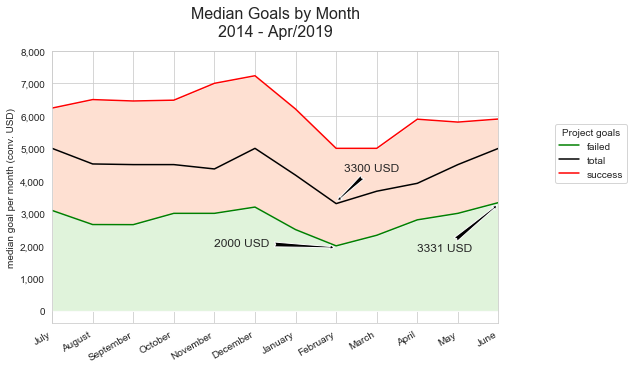

In [154]:
# Investigate goals per project each month
ks_months_95_sorted = group_data(ks_compl_95_latest, 'goal_hist_usd')
ax = plot_monthly(ks_months_95_sorted)

# highly differences
y1 = ks_months_95_sorted['failed']
y2 = ks_months_95_sorted['total']
y3 = ks_months_95_sorted['successful']
ax.fill_between(xlocs, y1, y3 , where=y1 >= y3, facecolor=fill_red, interpolate=True)
ax.fill_between(xlocs, y3 , where=y3 >= xlocs, facecolor=fill_green, interpolate=True)

# annotate
# minimum total
min_total = int(ks_months_95_sorted.total.values.min())
ax.annotate(str(min_total) + " USD", fontsize=12, xy=(7 ,min_total + 50), 
            xytext=(7.2, min_total+1000), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# maximum success
max_success =int(round(ks_months_95_sorted.successful.values.max()))
ax.annotate(str(max_success) + " USD", fontsize=12, xy=(11 , max_success - 50), 
            xytext=(9, max_success-1500), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# min success
min_success =int(round(ks_months_95_sorted.successful.values.min()))
ax.annotate(str(min_success) + " USD", fontsize=12, xy=(7, min_success - 50), 
            xytext=(4, min_success), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
format_yticks(8000,1000)
plt.ylabel("median goal per month (conv. USD)");
plt.title("Median Goals by Month\n2014 - Apr/2019", fontsize=16, pad=15);
plt.legend(["failed", "total", "success" ], title="Project goals", loc=1,  bbox_to_anchor=(1.3, 0.75))
plt.show();

The graph shows that pessimistic project goals were more successful across the entire year. There is a significant dent of median project goals in February at USD 2k. In February low-goal-projects seem to be more common. 

The most ambitious successful goal projects are typically ending in June/July and December. 

The above plots demonstrate that the success rates and user behavior changes according to the season of the year. We found some commonalities, but also contradicting behavior. To keep it neatly arranged, let's put it all in one plot. 

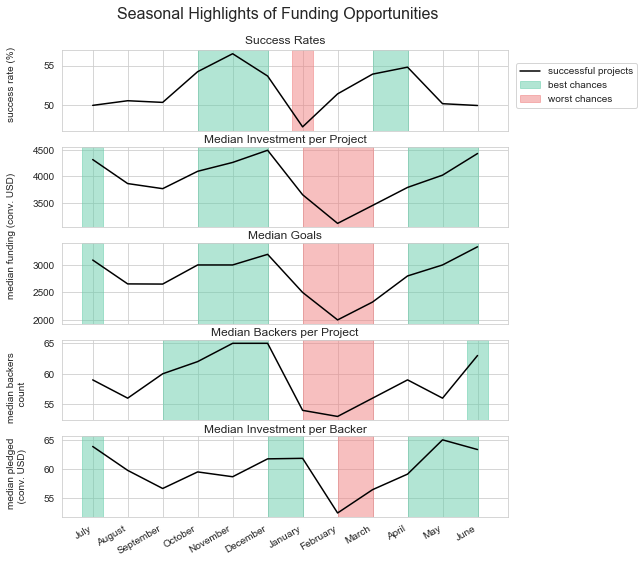

In [155]:
# bring them all in one plot
fig, ax = plt.subplots(5, 1, sharex=True)

# plot success rates
ax[0].plot(xlocs, ks_months_sorted['success_r'], color='black')

# data
features = ['pledged_hist_usd', 'goal_hist_usd', 'backers_count', 'pledged_backer_r']

# plot features
for i, feature in enumerate(features):
    ks_months_95_sorted = group_data(ks_compl_95_latest, feature)
    ax[i+1].plot(xlocs, ks_months_95_sorted['successful'], color='black', label="successful projects")
    plt.subplots_adjust(bottom=-0.2)
    
# highlight best months
# success rates: highlight positively Oct-Dec and March/April
ax[0].axvspan(3, 5,color=cust_green, alpha=0.5, label="best chances")
ax[0].axvspan(8, 9, color=cust_green, alpha=0.5)

# pledged_hist_usd: highlight positively May, June, July and Oct-Dec
ax[1].axvspan(3, 5,  color=cust_green, alpha=0.5)
ax[1].axvspan(9, 11, color=cust_green, alpha=0.5)
ax[1].axvspan(-0.3, 0.3,  color=cust_green, alpha=0.5)

# goal_hist_usd: highlight positively Apr-July and Oct-Dec
ax[2].axvspan(9, 11, color=cust_green, alpha=0.5)
ax[2].axvspan(-0.3, 0.3,  color=cust_green, alpha=0.5)  
ax[2].axvspan(3, 5, color=cust_green, alpha=0.5)

# backers counts: highlight positively June/July and Sept-Dec   
ax[3].axvspan(10.7, 11.3,  color=cust_green, alpha=0.5)
ax[3].axvspan(2, 5, color=cust_green, alpha=0.5)

# pledged per backer: highlight positively Apr-July and Dec/Jan
ax[4].axvspan(9, 11, color=cust_green, alpha=0.5)
ax[4].axvspan(-0.3, 0.3,  color=cust_green, alpha=0.5)  
ax[4].axvspan(5, 6, color=cust_green, alpha=0.5)

# highlight worst months
ax[0].axvspan(5.7, 6.3,  color=cust_red, alpha=0.5, label="worst chances")  # success rates - January
ax[1].axvspan(6, 8, color=cust_red, alpha=0.5) # pledged hist usd - Jan-Mar
ax[2].axvspan(6, 8, color=cust_red, alpha=0.5) # goals hist usd - Jan-Mar
ax[3].axvspan(6, 8, color=cust_red, alpha=0.5) # backers count - Jan-Mar
ax[4].axvspan(7, 8, color=cust_red, alpha=0.5) # pledged per backer - Feb-Mar

# figure size
fig.set_size_inches(8, 6);

# ticks and labels
fig.text(0.03, 0.8, "success rate (%)", va='center', rotation='vertical')
fig.text(0.03, 0.45, "median funding (conv. USD)", va='center', rotation='vertical')
fig.text(0.03, 0.1, "median backers\n      count", va='center', rotation='vertical')
fig.text(0.03, -0.1, "median pledged\n  (conv. USD)", va='center', rotation='vertical')

fig.suptitle('Monthly Funding Behavior\n2014 - Apr/2019', y=1.05, fontsize=16 )
ax[0].set_title('Success Rates', fontsize=12)
ax[1].set_title('Median Investment per Project', pad=4, fontsize=12)
ax[2].set_title('Median Goals', pad=4, fontsize=12)
ax[3].set_title('Median Backers per Project', pad=4, fontsize=12)
ax[4].set_title('Median Investment per Backer', pad=4, fontsize=12)
plt.suptitle("Seasonal Highlights of Funding Opportunities", fontsize=16)

plt.xticks(xlocs, months, rotation=30, ha='right');
plt.legend(["successful projects", "best chances", "worst chances"], loc=1,  bbox_to_anchor=(1.3, 5.7)).legendHandles[2].set_color(cust_red)

plt.show()


### Summary Seasons

We do find seasonal changes of success rates and the collected funding throughout a year. It's advisable for creators to carefully choose the month in which they plan to end a campaign. By optimizing the season, creators may be able to increase success chances or to increase the total funding.

Above, I highlighted the months with the best and lowest chances over the year. I separated successful campaigns by features that may determine a campaign's success. We can differentiate a campaign's success in general success chances, number of backers and the amount of funding collected, e.g. goals, total investment and the individual pledged amount per backer. 

Generally, we found an overlap of best chances in December. Ignoring some inconsistencies, I identified October to December and April to July as the most promising months to run a campaign. January to March performed suboptimal. However, the best month for a creator may depend on the individual campaign objectives. Some creators may prefer the best possible success chances, while others may prefer to increase their reach by addressing a maximum of possible backers or to collect the maximum funding possible.

I noticed that success rates behaved slightly different from funding attributes. The success chances were best from October to January and March and April. November was the safest bet for creators with the primary goal to end a campaign successfully. Those creators should avoid to run a campaign in January since success rates were roughly 10% lower. 

Creators seeking high funding had the best chances in December or June. They should avoid launching January to March.

If the focus was to attract a maximum amount of backers, a creator's best chances were in November and December. In contrast, January to March were not advisable to seek a maximum of backers.

## Featured

Kickstarter has the tools to actively support a project by rewarding a badge or introducing a project on their landing page or other digital channels. The support offered by Kickstarter may affect a campaign's success by increasing success chances or increasing the total of the collected investment.

**Does Kickstarter's promotional support increase the chances of a campaign's success?**  

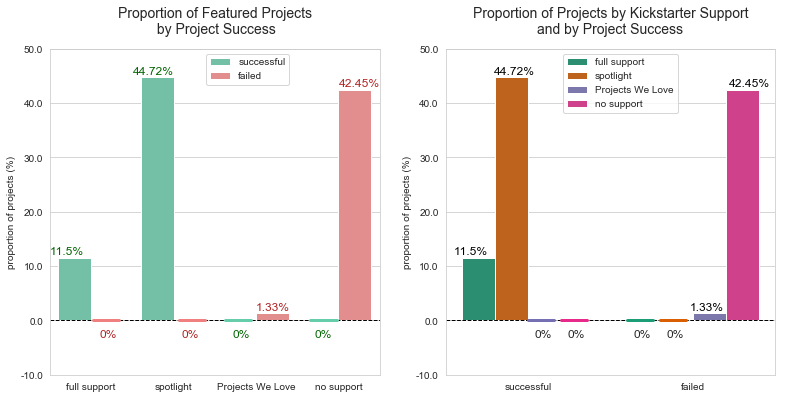

In [156]:
# relative values
# settings
plt.figure(figsize = [13, 6])
# cust_color = [cust_green, cust_red]
color=sns.set_palette(status_colors[1:])
dark_colors = ['#7570b3', '#e7298a', '#1b9e77', '#d95f02']

# order
status_order = ks_compl.status.value_counts().index
feat_order = ['full support', 'spotlight', 'Projects We Love', 'no support']

# get proportion of most common group - successful projects
# - relative values
n_points = ks_compl.shape[0]
max_feat = ks_compl['featured'].value_counts().max()
max_feat_prop = max_feat / n_points
max_status = ks_compl['status'].value_counts().max()
max_status_prop = max_status / n_points

# left plot: clustered bar chart featured categories vs. project status
plt.subplot(1, 2, 1)
sns.countplot(data = ks_compl, x = 'featured', hue = 'status',
             order = feat_order, hue_order = status_order, color=color)

# add zero line
ax1 = plt.gca()
ax1.axhline(linewidth=1, color='black', y=0.1, ls="--")

# annotate percentages and add empty categories
i = -0.5
xmin=0.13
k=-0.1
annot_color = ['darkgreen', 'darkgreen', 'firebrick', 'firebrick']
bar_color = [ cust_green, cust_green, cust_red, cust_red]
for j, feat in enumerate(feat_order):
    if j == 2:
        i += 0.5
        color_i = 'firebrick'
        xmin -= 0.12
        k = 0.29
    rate = (ks_compl.featured.value_counts()[feat] / n_points) * 100
    plt.text(i, ks_compl.featured.value_counts()[feat]+1000, str(round(rate, 2)) + "%", 
    fontsize=12, color=annot_color[j])
    ax1.axhline(linewidth=3, color=bar_color[::-1][j], y=0.1, xmin=xmin, xmax=xmin+0.08)
    plt.text(j-k, -5000, "0%", fontsize=12, color=annot_color[::-1][j])
    xmin+=0.26
    i+=1

#label and title
plt.legend(loc=9, bbox_to_anchor=(0.6, 1))
plt.title("Proportion of Featured Projects\n by Project Success", fontsize=14, pad=15)
plt.xlabel("")

# generate proportion tick marks
ylocs = np.arange(-0.1, 0.5+0.1, 0.1)
ylabels = ['{:0.1f}'.format(yloc*100) for yloc in ylocs]
plt.yticks(ylocs * n_points,ylabels )
plt.ylabel("proportion of projects (%)")

# right plot: clustered bar chart status counts categories related to Kickstarter support
# - relative values
plt.subplot(1, 2, 2)
color=sns.set_palette(sns.color_palette("Dark2"))
sns.countplot(data = ks_compl, x = 'status', hue = 'featured',
             order = status_order, hue_order = feat_order, color=color)

# add zero line
ax2 = plt.gca()
ax2.axhline(linewidth=1, color='black', y=0.1, ls="--")

# annotate rates
i = -0.45
for j, feat in enumerate(feat_order):
    if j == 2:
        i += 0.95
    rate = (ks_compl.featured.value_counts()[feat] / n_points) * 100
    plt.text(i, ks_compl.featured.value_counts()[feat]+1000, str(round(rate, 2)) + "%", 
    fontsize=12, color="black")
    i+=0.24
    
# add empty categories
xmin= 0.25
pos = 0.04
for i,c in enumerate(dark_colors):
    if i == 2:
        xmin += 0.1
        pos+=0.2
    ax2.axhline(linewidth=3, y=0.1, xmin=xmin, xmax=xmin+0.08, color=dark_colors[i])
    ax2.annotate("0%", fontsize=12, xy=(pos ,-5000))
    xmin +=0.1
    pos+=0.2
    
# generate proportion tick marks
ylocs = np.arange(-0.1, 0.5+0.1, 0.1)
ylabels = ['{:0.1f}'.format(yloc*100) for yloc in ylocs]
plt.yticks(ylocs * n_points,ylabels )
plt.ylabel("proportion of projects (%)")
plt.title("Proportion of Projects by Kickstarter Support\nand by Project Success", fontsize=14, pad=15)
plt.legend(loc=9, bbox_to_anchor=(0.53, 1))
plt.xlabel("")    

plt.show()

According to our data the support offered by Kickstarter was extremely relevant to win a campaign. Only projects that were supported by Kickstarter ended successfully. 45% of the projects were spotlighted on Kickstarter's channels and 12% of completed projects got full support. Unsupported projects or projects only receiving a Projects We Love badge did not succeed. 

Since fully supported projects were awarded the badge in addition of being spotlighted by Kickstarter, I wonder if the badge affected the chances of a higher funding.

**Does Kickstarter's "Projects We Love" badge increase the chances for a higher funding?**

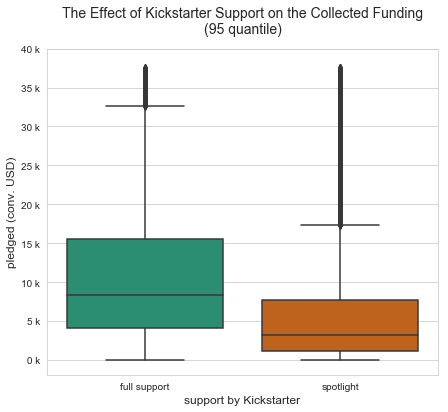

In [157]:
# settings
plt.figure(figsize = [7, 6])

# violinplot of 95 quantile data to reduce strong skew caused by outliers 
ax = sns.boxplot(data = ks_compl_95_latest, x = 'featured', y = 'pledged_hist_usd', order=feat_order[:2])

# ticks and labels
ylocs = np.arange(0, pledged_95+5000, 5000)
ylabels = [str(int(yloc/1000)) + " k" for yloc in ylocs]
plt.yticks(ylocs, ylabels)
plt.xlabel("support by Kickstarter", fontsize=12)
plt.ylabel("pledged (conv. USD)", fontsize=12)
plt.title("The Effect of Kickstarter Support on the Collected Funding\n(95 quantile)", fontsize=14, pad=15)
plt.show()

The "Projects We Love" badge clearly helped to increase the collected funding of successful campaigns. The median of campaigns that were only spotlighted was USD {{format_num(ks_compl_95_latest[ks_compl_95_latest.featured == "spotlight"]['pledged_hist_usd'].median())}}, whereas campaigns which were awarded the badge sought USD {{format_num(ks_compl_95_latest[ks_compl_95_latest.featured == "full support"]['pledged_hist_usd'].median())}}. This enhanced the median pledged funding by {{ format_num((ks_compl_95_latest[ks_compl_95_latest.featured == "full support"]['pledged_hist_usd'].median()/ ks_compl_95_latest[ks_compl_95_latest.featured == "spotlight"]['pledged_hist_usd'].median())*100)}}%. 

Not only the median pledges were higher. We notice that the entire interquartile range and the upper whisker increased by a factor of 2.

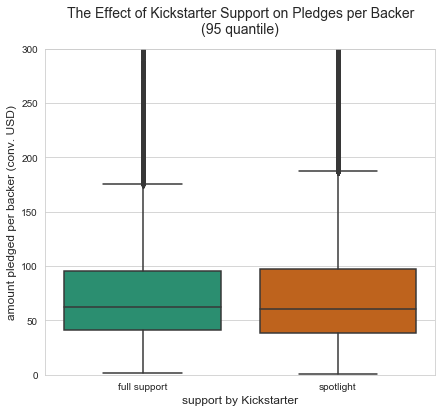

In [158]:
# settings
plt.figure(figsize = [7, 6])

# violinplot 95 quantile data
ax = sns.boxplot(data = ks_compl_95, x = 'featured', y = 'pledged_backer_r', order=feat_order[:2])

# ticks and labels
plt.ylim(0,300)
plt.xlabel("support by Kickstarter", fontsize=12)
plt.ylabel("amount pledged per backer (conv. USD)", fontsize=12)
plt.title("The Effect of Kickstarter Support on Pledges per Backer\n(95 quantile)", fontsize=14, pad=15)
plt.show()

Interestingly, the "Projects We Love" badge didn't influence the decision how much each backer was willing to pledge. Only the total amount of pledges was affected. Consequently, a higher number of supporters must have been attracted by the award. 

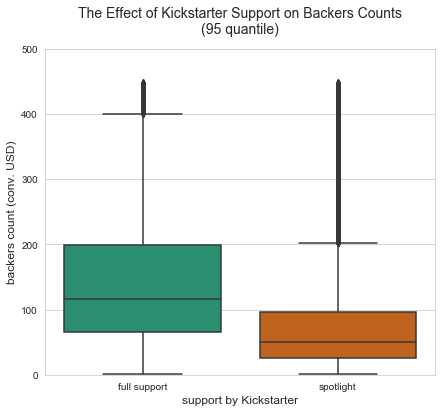

In [159]:
# settings
plt.figure(figsize = [7, 6])

# violinplot 95 quantile data
ax = sns.boxplot(data = ks_compl_95, x = 'featured', y = 'backers_count', order=feat_order[:2])

# ticks and labels
plt.ylim(0,500)
plt.xlabel("support by Kickstarter", fontsize=12)
plt.ylabel("backers count (conv. USD)", fontsize=12)
plt.title("The Effect of Kickstarter Support on Backers Counts\n(95 quantile)", fontsize=14, pad=15)
plt.show()

The above plot confirms that  being awarded "Projects We Love" in addition to being spotlighted drives the number of investors. Whereas the median number of supporters of spotlighted projects was {{format_num(ks_compl_95[ks_compl_95.featured == "spotlight"]['backers_count'].median())}}, fully supported campaigns convinced {{format_num(ks_compl_95[ks_compl_95.featured == "full support"]['backers_count'].median())}} supporters. Beyond the median in the boxplot, we can clearly see that backers counts doubled for the upper 50% of backers counts.  

As a result of the strong effect of Kickstarter support on success rates, the number of investors and the total collected funding, it is important to understand what kind of projects Kickstarter was most likely to support.

**Did the funding goal affect Kickstarter's decision to promote a campaign?** 

As we want to eliminate trends affecting our data, we are going to analyze data since the year 2015.

In [160]:
# descriptive statistics of support groups
ks_15_19.groupby(['featured'])['goal_hist_usd'].describe().transpose()

featured    Projects We Love        full support           no support  \
count    1,422.0             12,266.0            55,807.0               
mean     43,842.37839515853  20,809.806981082067 90,470.01514541254     
std      274,400.2376835397  49,497.26123464968  1,792,385.981874966    
min      100.0               1.0                 1.0                    
25%      6,500.0             4,000.0             2,500.0                
50%      16,205.211202952167 10,000.0            7,558.42599386768      
75%      38,214.87500076296  22,443.000000097807 25,000.0               
max      10,000,000.0        2,000,000.0         150,099,318.94817606   

featured           spotlight  
count    49,831.0             
mean     6,496.956562017776   
std      11,952.951055269472  
min      0.7110381409261841   
25%      800.0                
50%      2,781.0167909539778  
75%      7,443.543403463912   
max      347,000.0

The above statistics show that goals above USD 2mi had no chance to be fully supported or spotlighted.

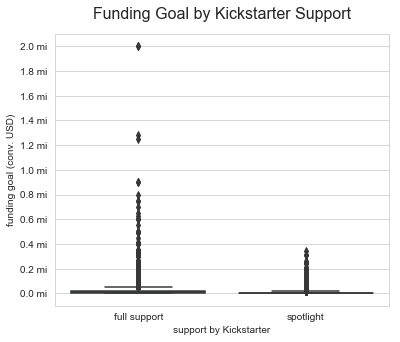

In [161]:
# settings
plt.figure(figsize = [6, 5])

# boxplot of goals, clustered by featured 
ax = sns.boxplot(data = ks_15_19, x = 'featured', y = 'goal_hist_usd', order=feat_order[:2])

y_ticks = np.arange(0, 2000000+20000, 200000)
y_labels = [str(y_tick / 1000000) + " mi" for y_tick in y_ticks]
plt.yticks(y_ticks, y_labels)
plt.xlabel("support by Kickstarter")
plt.ylabel("funding goal (conv. USD)")
plt.title("Funding Goal by Kickstarter Support", fontsize=16, pad=15)
plt.show()

Apparently, Kickstarter preferred to fully support projects if the funding goal was more ambitious. The highest goal of full support was USD 2mi, whereas spotlighted projects reached a maximum goal of USD 347k. Because of the strong skew of goals, we basically only see the outliers of above boxplots. Let's examine more realistic goals en detail.

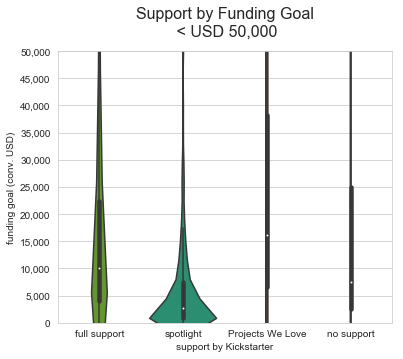

In [162]:
# settings
plt.figure(figsize = [6, 5])

# change to violinplot to emphasize the distribution 
ax = sns.violinplot(data = ks_15_19, x = 'featured', y = 'goal_hist_usd', 
                 order=feat_order, palette = success_colors)
plt.ylim(0, 50000) # zoom in to goals under USD 50000, 

# ticks and labels
format_yticks(50000,5000)
plt.ylabel("funding goal (conv. USD)")
plt.xlabel("support by Kickstarter")
plt.title("Support by Funding Goal\n < USD 50,000", fontsize=16, pad=15)

plt.show()

The violin plots demonstrate that projects which were fully supported or spotlighted generally had lower goals than projects without support or which got only the badge. 

Again, it is obvious that Kickstarter preferred to reward full support to projects seeking higher funding compared to projects which were spotlighted. The interquartile range of fully supported projects and the upper tail is longer than the features of spotlighted projects. Fully supported projects realized a median goal of USD {{format_num(ks_15_19[ks_15_19.featured == "full support"]['goal_hist_usd'].median())}}, whereas spotlighted projects only aimed for a goal of USD {{format_num(ks_15_19[ks_15_19.featured == "spotlight"]['goal_hist_usd'].median())}}.

While the Kickstarter team generally preferred to support projects with lower goals, they encouraged projects of high, but reasonable funding in some cases with the badge. In contrast to successful projects, the violin plots of goals of non-supported projects and Projects We Love-projects are extremely lengthy. 

If the goal would have been the only determination, we would have expected a wider distribution toward high goals. As this is not the case, we may assume additional factors to determine whether Kickstarter supports a project. 

**Did the project type affect Kickstarter supporting a campaign?**  

I'm going to analyze whether there were categories that were more likely chosen for support than others. To start, I'm going to calculate the chances of being supported given the category.

In [163]:
# utility to calculate success chances by category

def calc_support_chance(category):
    # summarize project counts per category into a matrix
    cat_counts = ks_15_19.groupby(['featured', category]).size()
    cat_counts = cat_counts.reset_index(name = 'count')
    cat_counts = cat_counts.pivot(index = category, 
                                columns = 'featured', 
                                values = 'count').reset_index()
    # fill zero counts
    cat_counts.fillna(0, inplace=True) 
    
    # add column to sum up project counts by category
    cat_counts['cat_count'] = ks_15_19.groupby([category]).project_id.count().values
    
    # calculate the proportion of each category of all projects and add to datafarme
    cat_counts['cat_prop'] = cat_counts['cat_count'] / (cat_counts['cat_count'].sum())

    # calculate the proportion to be selected for support out of all completed projects        
    cat_r = cat_counts.copy()
    for col in ['full support', 'spotlight', 'Projects We Love', 'no support']:
        cat_r[col] = cat_r[col] / (cat_r['cat_count'].sum())
    
    # according to the rules of conditional probability, 
    # calculate the probability to be featured given the chances that a category was selected  
    for col in ['full support', 'spotlight', 'Projects We Love', 'no support']:
        cat_r[col] = (cat_r[col] / cat_counts['cat_prop'])*100    
    
    # add up failed proportion and the successfull proportion
    cat_r['featured_successful'] = round(cat_r['full support'] + cat_r['spotlight'], 4) 
    cat_r['featured_failed'] = round(cat_r['Projects We Love'] + cat_r['no support'], 4)                    

    cat_r.sort_values(by=['featured_successful', 'full support'], ascending=True, inplace=True)
    cat_r.reset_index(drop=True, inplace=True)
    return cat_r

In [164]:
# utility to plot stacked bars for categorical success rates by category 

def plot_support_by_cat(cat_rates, cat_type):
    baselines = np.zeros(len(cat_rates)) # initital baseline
    artists = [] # for storing references to plot elements
    cat_order = cat_rates[cat_type].values
    
    # horizontally plot relative full support 
    for feature in ['full support','spotlight', 'featured_failed']:
        bars = plt.barh(y = np.arange(len(cat_order)), width = cat_rates[feature],
                        left = baselines, color=sns.set_palette(['seagreen', 'darkseagreen', cust_red]))
        artists.append(bars)
        # add values of full support to baseline
        baselines += cat_rates[feature].values
        
    # labels and ticks
    plt.yticks(np.arange(len(cat_order)), cat_order)
    plt.xticks(np.arange(0, 100+10, 10))
    plt.legend(artists, ['full support', 'spotlight', 'no support or badge'], 
               framealpha = 1, bbox_to_anchor = (1, 0.85), loc = 6);

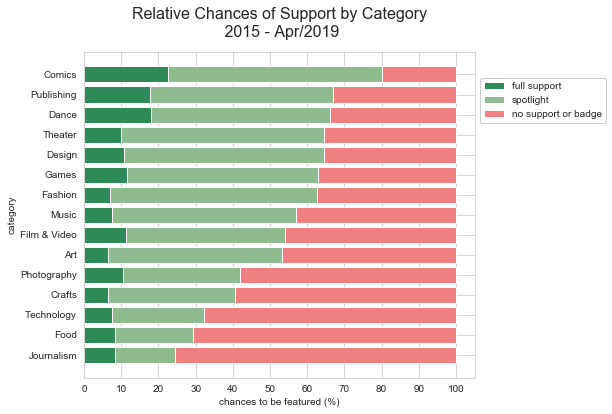

In [165]:
# settings
plt.figure(figsize = [7, 6])

cat_r = calc_support_chance("category")

# plot categories
plot_support_by_cat(cat_r, 'category')

# labels and ticks
plt.title("Relative Chances of Support by Category\n 2015 - Apr/2019", fontsize=16, pad=15);
plt.ylabel("category")
plt.xlabel("chances to be featured (%)")

plt.show()

Comics were most likely to be supported, followed by Publishing and Dance. This is true, for full support and for projects that got featured on the landing page. 

Creators who aim for project support in Technology, Food and Journalism had the lowest chances to receive full support or to be spotlighted.

As all projects that were fully supported or spotlighted succeeded, the green area coincides with success chances within a category. Simultaneously, the red area stands for the proportion of failed projects since all projects without support or only being rewarded the badge have failed.  

Let's dig into subcategories next by evaluating _comb cat_.

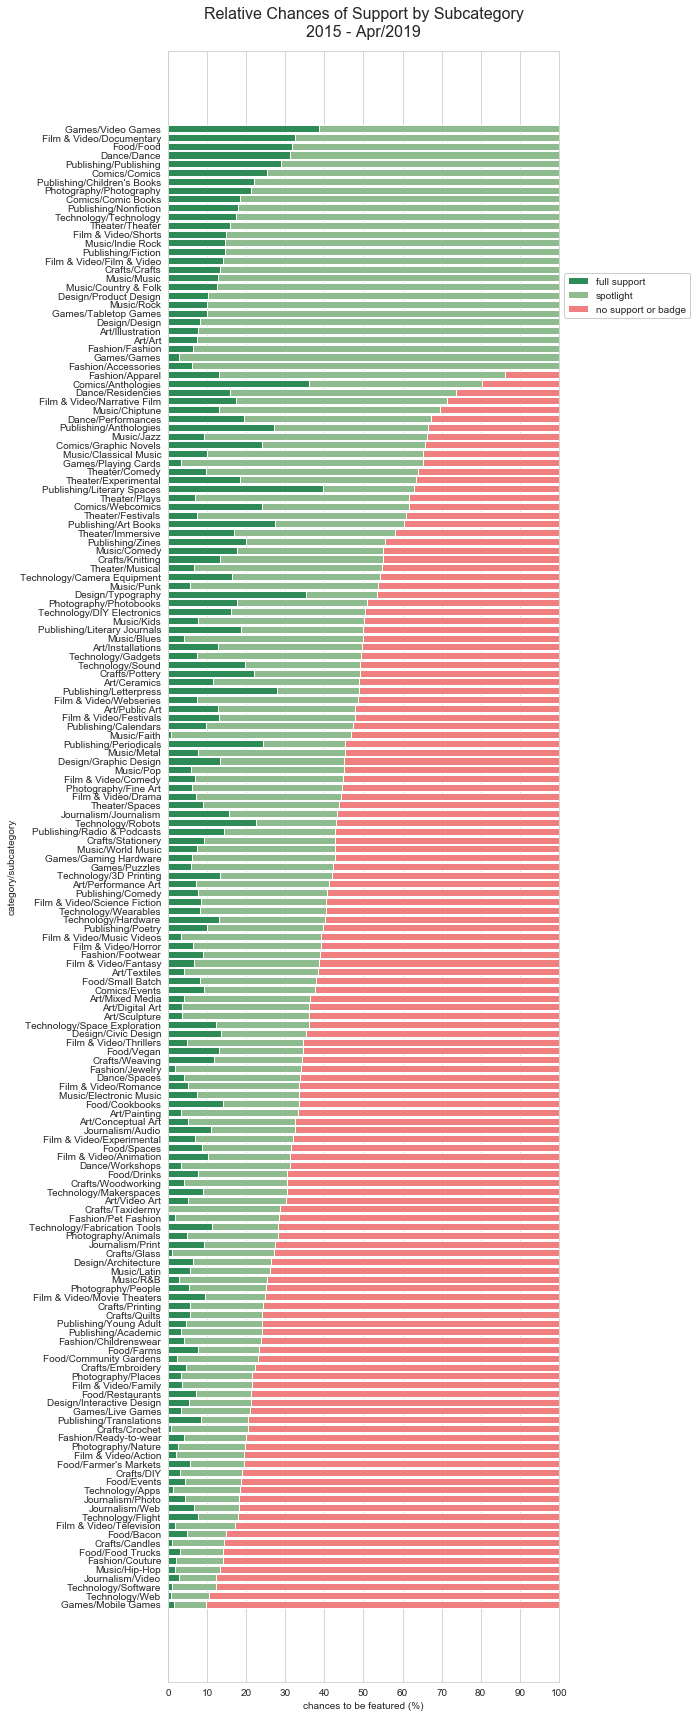

In [166]:
# settings
plt.figure(figsize = [7, 30])

# calculate chances
comb_cat_r = calc_support_chance("comb_cat") 

# stacked bar plots for subcategorical success rates by category    
plot_support_by_cat(comb_cat_r, 'comb_cat')
    
# labels and ticks
plt.title("Relative Chances of Support by Subcategory\n2015 - Apr/2019", fontsize=16, pad=15);
plt.ylabel("category/subcategory")
plt.xlabel("chances to be featured (%)")

plt.show()

As the above plot is difficult to read because of the high number of subcategories, I am going to plot a best of.

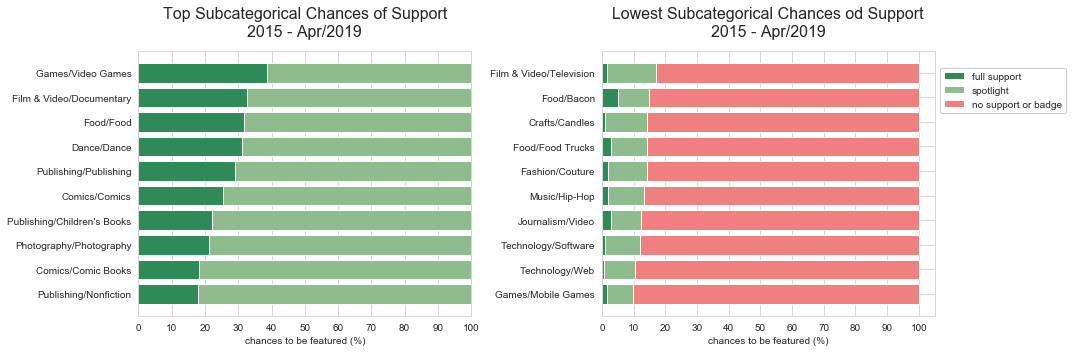

In [167]:
# save 10 most successful combined categories
subcats_s = comb_cat_r[-10:]

# save 10 most likely to fail categories
subcats_f = comb_cat_r[:10]

# settings
plt.figure(figsize=[15,5])

# left plot: top subcategories 
plt.subplot(1,2,1)  
plot_support_by_cat(subcats_s, 'comb_cat')
# remove legend
ax = plt.gca()
ax.get_legend().remove()
plt.title("Top Subcategorical Chances of Support\n2015 - Apr/2019", fontsize=16, pad=15); 
plt.xlabel("chances to be featured (%)")

# rightplot: bottom subcategories 
plt.subplot(1,2,2)  
plot_support_by_cat(subcats_f, 'comb_cat')
plt.title("Lowest Subcategorical Chances od Support\n2015 - Apr/2019", fontsize=16, pad=15); 
plt.xlabel("chances to be featured (%)")

plt.tight_layout()

plt.show()    

The above plot confirms that certain project types are more likely to be chosen for full support or to be spotlighted.
Video Games are at the top, followed by Documentaries and Food. The lowest chances of support had Software projects, Web  Tech projects and Mobile Games. 

It is quite odd that Video Games are at the top, while Mobile Games were at the bottom. 
There is quite a number of projects without subcategories among the top categories. This may be an indication for creators increasing their chances by publishing without subcategory or by generally choosing more universal category names to attract Kickstarter's attention.

### Summary Featured

According to our data, the support offered by Kickstarter is extremely relevant to win a campaign. Strictly supported projects were successful. 45% of the projects were spotlighted on Kickstarter's channels and 12% of completed projects got full support. Fully unsupported projects or projects only receiving the "Projects We Love" badge failed without exception.

Projects receiving the 'Projects We Love' badge in addition to being spotlighted, typically collected 2 to 2.5 times higher funding. Interestingly, the "Projects We Love" badge didn't influence how much each individual backer pledged, but the total number of supporters. While spotlighted projects attracted a median of {{int(ks_compl_95[ks_compl_95.featured == 'spotlight'].backers_count.median())}} supporters, fully supported campaigns convinced a medium of {{int(ks_compl_95[ks_compl_95.featured == 'full support'].backers_count.median())}} supporters. Thus, backers counts more than doubled when campaigns were picked by staff.  

As a result of the strong effect of Kickstarter's support, it is important to understand what kind of projects Kickstarter was most likely to promote. 

In terms of the funding goal, Kickstarter generally preferred to support lower goals. Fully supported projects had a median goal of USD {{format_num(ks_compl_95[ks_compl_95.featured == 'full support'].goal_hist_usd.median())}}, whereas spotlighted projects only aimed for a median goal of USD {{format_num(ks_compl_95[ks_compl_95.featured == 'spotlight'].goal_hist_usd.median())}}. While Kickstarter preferred lower goals, they also encourage projects of high, but reasonable funding by awarding the "Projects We Love" badge. The highest fully supported goal in the past 10 years was USD 2mi. Spotlighted campaigns were below the maximum goal of USD 347k. 

The type of a project additionally impacted Kickstarter's promotion activities. Comics were the most likely to be supported, followed by Publishing and Dance campaigns. Creators who aimed for project support in Tech, Food and Journalism had the lowest chances to be fully featured or to be spotlighted. 

More specifically, we found among the best chances to be supported:  
1) Video Games,   
2) Documentary films,  
3) Food without subcategory  

The lowest chances to be featured had the following subcategories:  
1) Software projects,   
2) Web projects and   
3) Mobile Games.   

Admittedly, it feels odd to find video games at the top, while mobile games were at the bottom. 
Additionally, I identified projects without chosen subcategories among the top chances for support. This suggests creators to increase their chances by publishing without subcategory or by choosing universal categories to attract Kickstarter's attention.

## 6.4 Summary: What determines the success of a crowdfunding campaign on Kickstarter? <a name='summaryresearch2'></a>
To find out what kind of crowdfunding campaigns were most successful on Kickstarter, we visually analyzed the following features in our data set:   

1) the required and realized funding,  
2) whether Kickstarter actively supported a campaign,   
3) the time of year,   
4) the project category and  
5) the campaign duration.   

To determine whether a campaign was considered successful or not, we looked into two main factors: first, the general chance to successfully end a campaign, and second, the amount of funding that was ultimately collected. 
When creators decide on a goal, they generally have to consider whether to maximize their chances to successfully finish a campaign or to generate the maximum funding possible. Both targets oppose each other diametrically. Because of Kickstarter's all-or-nothing-approach, increasing the goal typically decreases the chances for succeed. Anyhow, creators risk insufficient funding by aiming for low goals.


#### The lower the goal, the better.
 
If creators want to keep at least a 50% chance, it appears to be advisable to stay below a benchmark of USD 10k. On average goals below USD 5k had a greater than 60% chance of succeeding. Very risk-averse creators may even choose to stick to goals below USD 1,5k. 

#### Successful projects realized an average surplus of 17% above goal. 
The surplus that creators realize depends on the chosen goal that is chosen. Roughly, the surplus rate above goal describes a u-form. For goals under USD 3k, the surplus rate descended exponentially. The lower the chosen goal the higher was the surplus rate. Low goal projects typically realized a surplus of 34%, whereas goals between USD 1,5k to 13k made a median surplus of 11-12%. 

Creators seeking funding above USD 18k, were able to count on increasing surplus rates. In particular, goals from 45k up to 113k realized a median surplus of 26%. However, the surplus rates become less reliable as the volatility of pledges increases.

####  It is highly unlikely to successfully collect funding beyond USD 100k.  

Creators seeking high funding may consider alternative investment possibilities to Kickstarter. 3 quarters of successful goals were below USD 9,6k anyways. The success chances of projects between USD 65k to 113k were only 20%. For even higher goals, success chances draw closer to zero.

#### The higher a goal the higher the average pledge per backer
The higher a goal the higher was the average amount each supporter invested. For successful low goal projects (below USD 1,5k) the median pledged per backer was USD 37. Moderately high goals generated a median of USD 83. Successful very high goal projects generated the highest median funding per backer: USD 151.

Creators may consider this behavior when defining the rewards for pledges.

#### Kickstarter's promotion support is extremely relevant for success. 
In the last 10 years, only the projects that were supported by Kickstarter succeeded. Since 2018, on average, 54% of the projects were spotlighted on Kickstarter's landing page (and optionally on Kickstarter's social media channels). 11% of completed projects were fully supported. Meaning, they got picked by staff and were awarded the "Projects We Love" badge.  

All crowdfundings that were not announced on Kickstarter's landing page failed. This includes a few campaigns that got the "Projects We Love" badge, but were not spotlighted in any way. 

Being fully featured by Kickstarter additionally drove the total collected funding. Projects which received the 'Projects We Love' badge in addition to being spotlighted on the landing page, had more than a double the number of supporters, which resulted in 2 to 2.5 times higher funding compared to campaigns that were only spotlighted. 

Generally, Kickstarter tends to support projects with lower goals. Spotlighted projects on average sought a goal of USD 3,4k. Creators who intend to collect higher funding should aim for the badge in addition to being featured on the website. Fully supported projects realized a median goal of USD 7,1k.

#### Comics, Publishing and Dance projects were most likely to be supported by Kickstarter. 
The category of a campaign impacted the chances to be promoted by Kickstarter. Comics were the most likely to be supported, followed by Publishing and Dance campaigns. Creators who aimed for project support in Technology, Food and Journalism had the lowest chances to be feature

More specifically, we found among the best chances to be supported in the following project types:  
1) Video Games,
2) Documentary films,   
3) Food without subcategory.

The lowest chances to be featured had the following subcategories:
1) Software projects,
2) Web projects and
3) Mobile Games.

#### Kickstarter is a platform to fund creative projects with comparatively low financial requirements.
Creative projects and categories attributed to lower commercial potential seem to be most common and are highly successful.
Written work and comics dominate the top categories. Fiction & nonfiction publishing projects, children's books and comic books usually ended in success. Tabletop games clearly win the race of projects with the highest success rates.

#### Tech and food projects are most likely to fail but realize the highest total funding.*
Even though they are among the most popular categories, gadgets, hard- and software and web projects had low chances of success. In addition to technology ventures, I found 3 food subcategories among the ventures with the lowest chances: small batch, drinks and restaurants. We can attribute their high capital requirements to their poor success chances. It's important to say that higher failure rates do not necessarily imply that Kickstarter is generally a bad place for these types of projects. On the positive side, once successful, tech campaigns generated the highest median pledges of plus USD 22k.  

#### Universal category names are more likely to succeed.
The top chances of project categories show a tendency to not have subcategories selected. Publishing, comics, film & video, art and music performed generally well if they were communicated universally, instead of niche topics.

#### Video Games instead of Mobile Games.
While every single "video game" campaign succeeded, projects of the subcategory "mobile games" disappointed with a failure rate of 93%.

#### Design instead of Art.
Product design and illustrations worked in 100% of all cases, yet paintings were likely to fail. Generally, campaigns labeled as _Design_ worked better than labeled as _Art_.

#### Country & Folk Music flourished, Hip-Hop flopped. 
The taste in music seems to matter. While crowdfunding worked well for Country & Folk music, Hip-Hop campaigns failed at a rate of 78%.

#### A heaven for Short films and Documentaries.
Film & Video projects appear on both sides of success chances. Short films and documentaries were a guarantee for success, while animations and web series were more likely to fail. 

#### The Funding Duration is 30 days. Period.
Although creators are free to choose their funding duration, it seems to be universally accepted to run a campaign within a period of roughly 30 days. It would seem natural to assume that a longer time frame would allow projects to increase their chances of success and collect a higher funding. However, I found that longer durations are not rewarded with success. In fact, campaign periods ranging between 15 to 32 days were generally linked with the best chances.

The capital requirements may affect the chances of success though. The average funding durations appear to be prolonged when the goals was set higher. Successful goals under USD 1,5k had a mean funding duration of 28 days. Successful very high goal projects (USD 13k - 65k) were able to extend the funding duration by one week (35 days) without loosing chances of success.

The second most popular period of 60 days turned out to be not advisable since it's associated with the lowest chances.

#### The time of year matters.*
The time of the year on average affected the general success chances, investor counts and collected funding. Considering all factors, I found the best chances are in December. Generally, October to December and April to July were the most promising months to run a campaign. January to March performed suboptimally. 

November was the safest bet for every creator whose primary goal was to end a campaign successfully. Those creators should avoid running a campaign in January since success rates were roughly 10% lower. Creators who seek high funding had the best chances in December or June and should avoid January to March.

#### The most valuable categories.
I identified the most valuable project categories by depicting pledges against success rates. Accordingly, the most valuable campaigns were:

1) Design, in particular Product Design  
2) Games, in particular Video Games and Tabletop Games  
3) Film & Video Documentaries    

In contrast, the following projects had low funding potential:   

1) Mobile games,   
2) Hip-Hop music and  
3) generally journalistic projects.
